In [1]:
from optstoicpy.core.drawpathway import draw_pathway
from optstoicpy.core.pathway import Pathway
from optstoicpy.core.database import Database
from optstoicpy.core.database import *
from optstoicpy.core.database import load_db_v3
from optstoicpy.core.database import load_base_reaction_db
from optstoicpy.script.database_preprocessing import blocked_reactions_analysis
from optstoicpy.script.database_preprocessing import test_internal_loop_analysis
from optstoicpy.script import optstoic
from optstoicpy.script.solver import load_pulp_solver
import pandas as pd
from IPython.display import display, Image

# OptStoic tutorial:

Imports + create_similarity_matrix

In [2]:
def create_similarity_matrix(paths_dict):
    paths_dict_to_pandas = {}
    for i in paths_dict.keys(): 
        jaccard_indexes = []
        for j in paths_dict.keys():
            jaccard_indexes.append(paths_dict[i].get_pathway_similarity_index(paths_dict[j]))
        paths_dict_to_pandas["pathway " + str(i)] = jaccard_indexes
        jacard_indexes = []
    similarity_matrix = pd.DataFrame(data=paths_dict_to_pandas,
                                     index=paths_dict_to_pandas.keys(),
                                     columns=paths_dict_to_pandas.keys())
    return similarity_matrix

In [2]:
# 2. Create a user_defined_export_rxns_Sji dictionary of exchange reactions for each metabolite that participate in the equation. E.g.,

user_defined_export_rxns_Sji = {
    'EX_glc': {'C00031': -1.0},
    'EX_acetylCoA': {'C00024': -1.0},
    'EX_co2': {'C00011': -1.0},
    'EX_CoA': {'C00010': -1.0},
    'EX_nad': {'C00003': -1.0},
    'EX_adp': {'C00008': -1.0},
    'EX_phosphate': {'C00009': -1.0},
    'EX_pyruvate': {'C00022': -1.0},
    'EX_nadh': {'C00004': -1.0},
    'EX_atp': {'C00002': -1.0},
    'EX_h2o': {'C00001': -1.0},
    'EX_hplus': {'C00080': -1.0},
    'EX_nadp': {'C00006': -1.0},
    'EX_nadph': {'C00005': -1.0}
    }

# 3. Create a specific_bounds dictionary for the upper and lower bound to the exchange flux.

specific_bounds = { 'EX_glc': {'LB': -1, 'UB': -1},
                'EX_acetylCoA': {'LB': 1, 'UB': 1},
                'EX_pyruvate': {'LB': 1, 'UB': 1},
                'EX_co2': {'LB': 1, 'UB': 1},
                'EX_CoA': {'LB': -1, 'UB': -1},
                'EX_nad': {'LB': -3, 'UB': 0},
                'EX_nadh': {'LB': 0, 'UB': 3},
                'EX_nadp': {'LB': -2, 'UB': 0},
                'EX_nadph': {'LB': 0, 'UB': 2},
                'EX_adp': {'LB': -1, 'UB': -1},
                'EX_phosphate': {'LB': -1, 'UB': -1},
                'EX_atp': {'LB': 1, 'UB': 1},
                'EX_h2o': {'LB': 1, 'UB': 1},
                'EX_hplus': {'LB': -11, 'UB': 11}}

# 4. Setup your custom constraints for the pathway.
#v('EX_nadph') + v('EX_nadh') = 2;
#v('EX_nadp') + v('EX_nad') = -2;
#v('EX_nadh') + v('EX_nad') = 0;
#v('EX_nadph') + v('EX_nadp') = 0;
# can be written as:
custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': 200,
         'LB': -200},
        {'constraint_name': 'nadphcons2',
        'reactions': ['EX_nadp', 'EX_nad'],
        'UB': 200,
        'LB': -200},
        {'constraint_name': 'nadphcons3',
        'reactions': ['EX_nadh', 'EX_nad'],
        'UB': 100,
        'LB': -100},
        {'constraint_name': 'nadphcons4',
        'reactions': ['EX_nadph', 'EX_nadp'],
        'UB': 100,
        'LB': -100}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

# 7. Setup optStoic database loading (optstoicpy.core.database.load_db_v3).
db3 = load_db_v3(user_defined_export_rxns_Sji)

2021-03-24 16:49:53 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-03-24 16:49:53 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-03-24 16:49:53 core.Database DEBUG    Reading S matrix from JSON...
2021-03-24 16:50:01 core.Database DEBUG    Reading reaction type file...
2021-03-24 16:50:01 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-03-24 16:50:01 core.Database INFO     Validating database
2021-03-24 16:50:01 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08505 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07882 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07885 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08859 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R01000 removed from the database.
2021-0

2021-03-24 16:50:01 core.Database DEBUG    Reaction R02587 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R00723 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R10351 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R05443 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08319 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R05447 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R00129 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R05448 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R04758 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R04756 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R09252 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R0

2021-03-24 16:50:01 core.Database DEBUG    Reaction R03577 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R03576 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08080 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08081 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08082 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08083 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07509 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07058 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08087 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R08088 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07057 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R0

2021-03-24 16:50:01 core.Database DEBUG    Reaction R03329 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R09908 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07264 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07267 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07260 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07263 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07262 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07269 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R07268 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R01732 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R03395 removed from the database.
2021-03-24 16:50:01 core.Database DEBUG    Reaction R0

2021-03-24 16:50:02 core.Database DEBUG    Reaction R03231 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R09630 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R09632 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R04868 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R04714 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R04715 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R04716 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R09633 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R04711 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R04713 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R01562 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R1

2021-03-24 16:50:02 core.Database DEBUG    Reaction R03827 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R03823 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R03820 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02994 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02995 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02998 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02999 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R10858 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02132 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02666 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02667 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R0

2021-03-24 16:50:02 core.Database DEBUG    Reaction R05855 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05856 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05857 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05858 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R00827 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05676 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05677 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05672 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05673 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R09771 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R09770 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R0

2021-03-24 16:50:02 core.Database DEBUG    Reaction R00048 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R09074 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R10606 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R10605 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R10609 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R10608 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05335 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05442 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05441 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05331 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05330 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R0

2021-03-24 16:50:02 core.Database DEBUG    Reaction R08002 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R08003 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R08005 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R08006 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R08007 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R04247 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R07416 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R06366 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R03782 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R03780 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R03781 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R0

2021-03-24 16:50:02 core.Database DEBUG    Reaction R03881 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R03880 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05766 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05764 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05765 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05762 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05763 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05760 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05761 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05769 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R10346 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R1

2021-03-24 16:50:02 core.Database DEBUG    Reaction R06449 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R06119 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02356 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02354 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02355 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02358 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R02359 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R01460 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R01463 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R10921 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R09537 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R0

2021-03-24 16:50:02 core.Database DEBUG    Reaction R05171 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R05170 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R09498 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R00989 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R00983 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R00984 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R01583 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R01586 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R01587 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R01584 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R01585 removed from the database.
2021-03-24 16:50:02 core.Database DEBUG    Reaction R0

2021-03-24 16:50:03 core.Database DEBUG    Reaction R10560 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R09642 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R05729 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R05722 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R05720 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R05721 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R05727 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R10940 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R02970 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R02974 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R02975 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R0

2021-03-24 16:50:03 core.Database DEBUG    Reaction R08434 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08439 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07289 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07281 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07280 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07287 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07869 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07868 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07867 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07866 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07865 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R0

2021-03-24 16:50:03 core.Database DEBUG    Reaction R06879 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08616 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R06878 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07132 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R01091 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R01099 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03943 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03945 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R05397 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R05394 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R05392 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R0

2021-03-24 16:50:03 core.Database DEBUG    Reaction R08353 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07658 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07659 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08356 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08357 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07122 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07652 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03728 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R09275 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03725 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03726 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R0

2021-03-24 16:50:03 core.Database DEBUG    Reaction R05215 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03816 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R04265 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R04266 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03812 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R10956 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R09173 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R09172 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R09171 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R09170 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R09177 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R0

2021-03-24 16:50:03 core.Database DEBUG    Reaction R03680 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03686 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03685 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03689 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R10270 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08819 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08818 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08817 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08816 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07375 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08814 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R0

2021-03-24 16:50:03 core.Database DEBUG    Reaction R07100 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03094 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03095 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03092 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03090 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R07513 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08330 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R03098 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08623 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08336 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R08337 removed from the database.
2021-03-24 16:50:03 core.Database DEBUG    Reaction R0

2021-03-24 16:50:04 core.Database DEBUG    Reaction R09591 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R04784 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R09595 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10012 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10013 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10010 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R09596 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R04565 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06387 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06386 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07366 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R0

2021-03-24 16:50:04 core.Database DEBUG    Reaction R07330 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07337 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07884 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07887 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07886 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07889 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07888 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07339 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R08858 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06684 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06685 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R0

2021-03-24 16:50:04 core.Database DEBUG    Reaction R10201 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10200 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10207 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R05599 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R05598 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R05592 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06866 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10736 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R03562 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R03563 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R03560 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R0

2021-03-24 16:50:04 core.Database DEBUG    Reaction R05431 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R09314 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R05438 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R05439 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10102 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10103 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R09649 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R09648 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10416 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10417 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10414 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R1

2021-03-24 16:50:04 core.Database DEBUG    Reaction R08545 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R08547 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R08546 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R02633 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R02632 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06399 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06392 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06393 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06390 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06391 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06394 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R0

2021-03-24 16:50:04 core.Database DEBUG    Reaction R06820 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R06821 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R11114 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R11115 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R11116 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R11117 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R11113 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R11118 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R11119 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R03831 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R03834 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R0

2021-03-24 16:50:04 core.Database DEBUG    Reaction R10457 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10454 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07981 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R00563 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R00562 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R10099 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07454 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07728 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07729 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R08919 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R07720 removed from the database.
2021-03-24 16:50:04 core.Database DEBUG    Reaction R0

2021-03-24 16:50:05 core.Database DEBUG    Reaction R05322 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05323 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05321 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05357 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05459 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05328 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05356 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R06980 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05355 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04581 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04580 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R0

2021-03-24 16:50:05 core.Database DEBUG    Reaction R04876 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08312 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04870 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R01689 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R01683 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R01686 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07979 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07978 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07977 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R03268 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R03261 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R0

2021-03-24 16:50:05 core.Database DEBUG    Reaction R05826 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R03097 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R00814 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R00810 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04153 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04150 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04151 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04154 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04158 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R03091 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R03899 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R0

2021-03-24 16:50:05 core.Database DEBUG    Reaction R04172 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08951 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R09789 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R09781 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R09782 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R09783 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R09785 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05775 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05776 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05771 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R05778 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R1

2021-03-24 16:50:05 core.Database DEBUG    Reaction R03421 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04346 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04344 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R04438 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08448 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08449 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08199 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08192 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08190 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08191 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08196 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R0

2021-03-24 16:50:05 core.Database DEBUG    Reaction R07996 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07995 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07993 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07992 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07990 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08304 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07449 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R03284 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R03283 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R08658 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07440 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R0

2021-03-24 16:50:05 core.Database DEBUG    Reaction R06476 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R06475 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R06474 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07870 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07871 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07872 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07873 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07874 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07875 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07876 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R07877 removed from the database.
2021-03-24 16:50:05 core.Database DEBUG    Reaction R0

2021-03-24 16:50:06 core.Database DEBUG    Reaction R03971 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R03970 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09687 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10148 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10140 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10141 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10142 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R04387 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R04383 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R04382 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R04388 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R0

2021-03-24 16:50:06 core.Database DEBUG    Reaction R06357 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R06606 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R06355 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R07489 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R07488 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R07484 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R07487 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R07481 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R07483 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09566 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09567 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R0

2021-03-24 16:50:06 core.Database DEBUG    Reaction R09465 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05083 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05087 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05086 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09464 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R02271 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R02272 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10533 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10536 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10539 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05266 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R0

2021-03-24 16:50:06 core.Database DEBUG    Reaction R04618 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R01205 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R01203 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R01202 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09399 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09398 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09392 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09391 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09390 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09397 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09396 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R0

2021-03-24 16:50:06 core.Database DEBUG    Reaction R08636 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R08634 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R08631 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R07110 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R06572 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R06573 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R02408 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R00664 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R00666 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R00660 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R00668 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R0

2021-03-24 16:50:06 core.Database DEBUG    Reaction R02232 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R02237 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05223 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05222 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05220 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05225 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09216 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09217 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05229 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05228 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09212 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R0

2021-03-24 16:50:06 core.Database DEBUG    Reaction R09688 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R08036 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R07501 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05564 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05565 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05566 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05567 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05560 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05561 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05562 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R05563 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R1

2021-03-24 16:50:06 core.Database DEBUG    Reaction R04515 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10322 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10895 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09341 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R08255 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10898 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10899 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09342 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R10435 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R08254 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R09343 removed from the database.
2021-03-24 16:50:06 core.Database DEBUG    Reaction R1

2021-03-24 16:50:10 core.Database DEBUG    Reaction R00303 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00322 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00488 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00522 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R02817 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00487 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R01573 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R06515 has been updated from Forward irreversible to Forwar

2021-03-24 16:50:10 core.Database ERROR    Reaction R00830 not in database!
2021-03-24 16:50:10 core.Database DEBUG    Reaction R01200 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R07302 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00575 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database ERROR    Reaction R00918 not in database!
2021-03-24 16:50:10 core.Database DEBUG    Reaction R09805 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R04780 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00473 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00130 has been updated from Forwa

2021-03-24 16:50:10 core.Database DEBUG    Reaction R00519 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R06974 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R06973 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R01980 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00299 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R01902 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R09279 has been updated from Forward irreversible to Forward irreversible.
2021-03-24 16:50:10 core.Database DEBUG    Reaction R00458 has been updated from Forward irreversible to Forwar

In [3]:
test = optstoic.OptStoic(database=db3,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=custom_flux_constraints,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

lp_problem, pathways = test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=test.max_iteration)

2021-03-24 16:50:13 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-03-24 16:50:13 optstoic.OptStoic INFO     Formulating problem...
2021-03-24 16:50:14 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-24 16:50:14 optstoic.OptStoic INFO     Adding custom constraints...
2021-03-24 16:50:14 optstoic.OptStoic INFO     Solving problem...
2021-03-24 16:50:14 optstoic.OptStoic INFO     Iteration 1
2021-03-24 16:50:18 optstoic.OptStoic INFO     This iteration solved in 3.765 seconds.
2021-03-24 16:50:18 optstoic.OptStoic INFO     Writing result to output file...


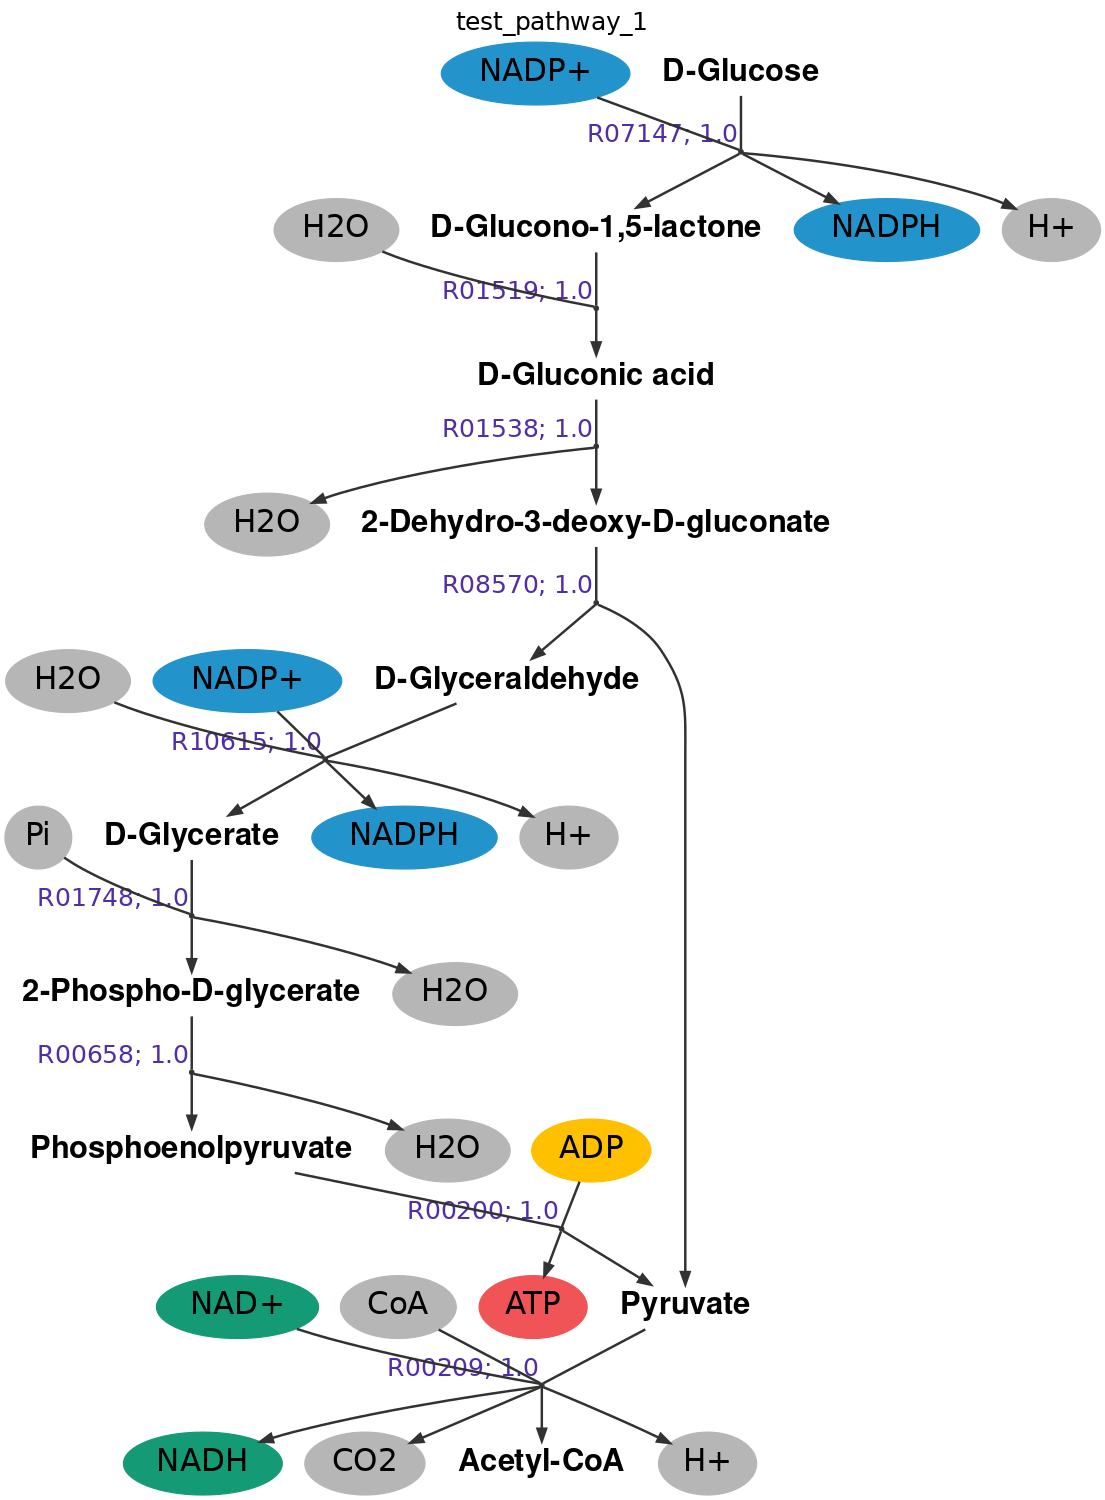

In [4]:
test_paths = pd.read_json(r'./result/temp_pathways.json')

test_path1 = Pathway(name='test_pathway_1',
                    reaction_ids=list(test_paths[1]['pathway'].keys()),
                    fluxes=list(test_paths[1]['pathway'].values()))

# Create a png image
figure_filename = 'test_pathway_1'
figure_ext = "png"

g = draw_pathway(
    test_path1, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=test_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)

# Explorar path de piruvato a acetil CoA sin loops

In [4]:
test = optstoic.OptStoic(database=db3,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=custom_flux_constraints,
                    add_loopless_constraints=False,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

lp_problem, pathways = test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=2)

2021-02-10 18:34:39 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic EnzymeLoad...
2021-02-10 18:34:39 optstoic.OptStoic INFO     Formulating problem...
2021-02-10 18:34:40 optstoic.OptStoic INFO     Adding custom constraints...
2021-02-10 18:34:40 optstoic.OptStoic INFO     Solving problem...
2021-02-10 18:34:40 optstoic.OptStoic INFO     Iteration 1
2021-02-10 18:37:37 optstoic.OptStoic INFO     This iteration solved in 176.277 seconds.
2021-02-10 18:37:37 optstoic.OptStoic INFO     Writing result to output file...


In [8]:
paths = pd.read_json(r'./result/temp_pathways.json')

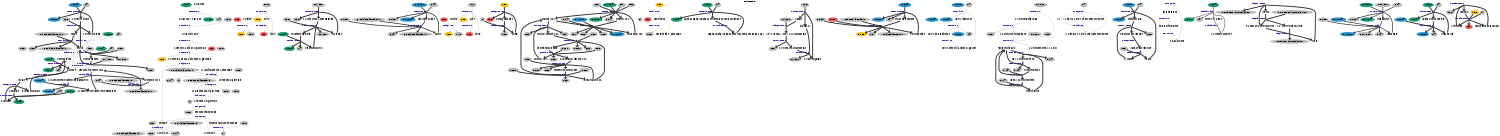

In [11]:
pathway1 = Pathway(name='result_pathway',
                    reaction_ids=list(paths[1]['pathway'].keys()),
                    fluxes=list(paths[1]['pathway'].values()))

# Create a png image
figure_filename = 'result_pathway'
figure_ext = "png"

g = draw_pathway(
    pathway1, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=pathway1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)

# Explorar path de piruvato a acetil CoA con loops

In [4]:
test = optstoic.OptStoic(database=db3,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=custom_flux_constraints,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

lp_problem, pathways = test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=2)

2021-02-10 21:18:42 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic EnzymeLoad...
2021-02-10 21:18:42 optstoic.OptStoic INFO     Formulating problem...
2021-02-10 21:18:43 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-02-10 21:18:43 optstoic.OptStoic INFO     Adding custom constraints...
2021-02-10 21:18:43 optstoic.OptStoic INFO     Solving problem...
2021-02-10 21:18:43 optstoic.OptStoic INFO     Iteration 1
2021-02-10 22:18:44 optstoic.OptStoic INFO     This iteration solved in 3601.075 seconds.


In [5]:
pathways

{}

# Test optstoic normal (caso gluc->pyr)

In [3]:
test_lp, test_paths = optstoic.test_optstoic()

2021-01-29 10:32:01 optstoicpy.script.optstoic.main INFO     Test generalized optstoic
2021-01-29 10:32:01 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-01-29 10:32:01 core.Database DEBUG    Reading S matrix from JSON...
2021-01-29 10:32:07 core.Database DEBUG    Reading reaction type file...
2021-01-29 10:32:07 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-01-29 10:32:07 core.Database INFO     Validating database
2021-01-29 10:32:07 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08505 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R07882 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R07885 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08859 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R01000 removed from the database.
2021-

2021-01-29 10:32:07 core.Database DEBUG    Reaction R02587 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R00723 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R10351 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R05443 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08319 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R05447 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R00129 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R05448 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R04758 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R04756 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R09252 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R0

2021-01-29 10:32:07 core.Database DEBUG    Reaction R03577 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R03576 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08080 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08081 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08082 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08083 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R07509 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R07058 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08087 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R08088 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R07057 removed from the database.
2021-01-29 10:32:07 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R03329 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09908 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07264 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07267 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07260 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07263 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07262 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07269 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07268 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01732 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R03395 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R03231 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09630 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09632 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R04868 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R04714 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R04715 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R04716 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09633 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R04711 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R04713 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01562 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R1

2021-01-29 10:32:08 core.Database DEBUG    Reaction R03827 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R03823 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R03820 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02994 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02995 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02998 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02999 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R10858 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02132 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02666 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02667 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R05855 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05856 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05857 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05858 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R00827 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05676 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05677 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05672 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05673 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09771 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09770 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R00048 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09074 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R10606 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R10605 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R10609 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R10608 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05335 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05442 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05441 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05331 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05330 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R08002 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R08003 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R08005 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R08006 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R08007 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R04247 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07416 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R06366 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R03782 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R03780 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R03781 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R03881 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R03880 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05766 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05764 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05765 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05762 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05763 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05760 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05761 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05769 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R10346 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R1

2021-01-29 10:32:08 core.Database DEBUG    Reaction R06449 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R06119 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02356 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02354 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02355 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02358 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02359 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01460 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01463 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R10921 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09537 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R05171 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05170 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09498 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R00989 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R00983 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R00984 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01583 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01586 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01587 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01584 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R01585 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R10560 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R09642 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05729 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05722 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05720 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05721 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R05727 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R10940 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02970 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02974 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R02975 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:08 core.Database DEBUG    Reaction R08434 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R08439 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07289 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07281 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07280 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07287 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07869 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07868 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07867 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07866 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R07865 removed from the database.
2021-01-29 10:32:08 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R06879 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08616 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06878 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07132 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R01091 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R01099 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03943 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03945 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05397 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05394 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05392 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R08353 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07658 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07659 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08356 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08357 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07122 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07652 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03728 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09275 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03725 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03726 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R05215 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03816 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R04265 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R04266 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03812 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10956 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09173 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09172 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09171 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09170 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09177 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R03680 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03686 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03685 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03689 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10270 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08819 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08818 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08817 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08816 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07375 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08814 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R07100 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03094 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03095 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03092 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03090 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07513 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08330 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03098 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08623 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08336 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08337 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R09591 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R04784 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09595 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10012 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10013 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10010 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09596 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R04565 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06387 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06386 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07366 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R07330 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07337 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07884 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07887 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07886 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07889 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07888 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07339 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08858 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06684 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06685 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R10201 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10200 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10207 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05599 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05598 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05592 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06866 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10736 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03562 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03563 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03560 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R05431 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09314 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05438 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05439 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10102 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10103 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09649 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R09648 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10416 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10417 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10414 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R1

2021-01-29 10:32:09 core.Database DEBUG    Reaction R08545 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08547 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08546 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R02633 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R02632 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06399 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06392 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06393 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06390 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06391 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06394 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R06820 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06821 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R11114 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R11115 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R11116 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R11117 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R11113 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R11118 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R11119 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03831 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R03834 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R10457 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10454 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07981 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R00563 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R00562 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R10099 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07454 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07728 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07729 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R08919 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R07720 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:09 core.Database DEBUG    Reaction R05322 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05323 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05321 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05357 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05459 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05328 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05356 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R06980 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R05355 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R04581 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R04580 removed from the database.
2021-01-29 10:32:09 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R04876 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08312 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04870 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R01689 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R01683 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R01686 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07979 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07978 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07977 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R03268 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R03261 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R05826 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R03097 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R00814 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R00810 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04153 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04150 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04151 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04154 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04158 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R03091 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R03899 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R04172 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08951 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09789 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09781 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09782 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09783 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09785 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05775 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05776 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05771 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05778 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R1

2021-01-29 10:32:10 core.Database DEBUG    Reaction R03421 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04346 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04344 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04438 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08448 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08449 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08199 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08192 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08190 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08191 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08196 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R07996 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07995 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07993 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07992 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07990 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08304 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07449 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R03284 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R03283 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08658 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07440 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R06476 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R06475 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R06474 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07870 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07871 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07872 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07873 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07874 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07875 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07876 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07877 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R03971 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R03970 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09687 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R10148 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R10140 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R10141 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R10142 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04387 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04383 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04382 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R04388 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R06357 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R06606 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R06355 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07489 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07488 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07484 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07487 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07481 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07483 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09566 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09567 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R09465 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05083 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05087 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05086 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09464 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R02271 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R02272 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R10533 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R10536 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R10539 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05266 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R04618 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R01205 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R01203 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R01202 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09399 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09398 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09392 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09391 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09390 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09397 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09396 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R08636 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08634 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R08631 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R07110 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R06572 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R06573 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R02408 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R00664 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R00666 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R00660 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R00668 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:10 core.Database DEBUG    Reaction R02232 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R02237 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05223 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05222 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05220 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05225 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09216 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09217 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05229 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R05228 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R09212 removed from the database.
2021-01-29 10:32:10 core.Database DEBUG    Reaction R0

2021-01-29 10:32:11 core.Database DEBUG    Reaction R09688 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R08036 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R07501 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R05564 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R05565 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R05566 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R05567 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R05560 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R05561 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R05562 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R05563 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R1

2021-01-29 10:32:11 core.Database DEBUG    Reaction R04515 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R10322 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R10895 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R09341 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R08255 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R10898 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R10899 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R09342 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R10435 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R08254 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R09343 removed from the database.
2021-01-29 10:32:11 core.Database DEBUG    Reaction R1

2021-01-29 10:32:13 core.Database DEBUG    Reaction R00303 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00322 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00488 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00522 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R02817 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00487 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R01573 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R06515 has been updated from Forward irreversible to Forwar

2021-01-29 10:32:13 core.Database ERROR    Reaction R00830 not in database!
2021-01-29 10:32:13 core.Database DEBUG    Reaction R01200 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R07302 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00575 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database ERROR    Reaction R00918 not in database!
2021-01-29 10:32:13 core.Database DEBUG    Reaction R09805 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R04780 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00473 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00130 has been updated from Forwa

2021-01-29 10:32:13 core.Database DEBUG    Reaction R00519 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R06974 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R06973 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R01980 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00299 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R01902 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R09279 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:32:13 core.Database DEBUG    Reaction R00458 has been updated from Forward irreversible to Forwar

In [4]:
test_paths[1].reaction_ids

['EX_adp',
 'EX_atp',
 'EX_glc',
 'EX_h2o',
 'EX_hplus',
 'EX_nadp',
 'EX_nadph',
 'EX_phosphate',
 'EX_pyruvate',
 'R00200',
 'R00658',
 'R01519',
 'R01538',
 'R01748',
 'R07147',
 'R08570',
 'R10615']

In [5]:
test_paths[1].fluxes

[-1.0,
 1.0,
 -1.0,
 1.0,
 2.0,
 -2.0,
 2.0,
 -1.0,
 2.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0]

# Test glicólisis con E. coli core (glucosa -- > piruvato)

- glucosa -> glucosa-6pi <span style="color: green;">check</span>
- glucosa -> fructosa-6pi <span style="color: green;">check</span>
- glucosa -> fructosa-1,6-bipi <span style="color: green;">check</span>
- glucosa -> gliceraldehído-3pi + dihidroxiacetona pi <span style="color: green;">check</span>
- glucosa -> 2 gliceraldehido 3pi (análoga a la de arriba) <span style="color: green;">check</span>
- glucosa -> 2 1,3bifosfoglicerato <span style="color: green;">check</span>
- glucosa -> 3 fosfoglicerato <span style="color: green;">check</span>
- glucosa -> 2 fosfoglicerato <span style="color: green;">check</span>
- glucosa -> fosfoenolpiruvato  <span style="color: green;">check</span>
- glucosa -> piruvato <span style="color: green;">check</span>

In [2]:
user_defined_export_rxns_Sji={
    'EX_glc': {'C00031': -1.0},
    'EX_atp': {'C00002': -1.0},
    'EX_adp': {'C00008': -1.0},
    'EX_pyr':{ "C00022": -1.0},
    'EX_nad': {'C00003': -1.0},
    'EX_nadh': {'C00004': -1.0},
    'EX_hplus': {'C00080': -1.0},
    'EX_h2o': {'C00001': -1.0},
    'EX_phosphate': {'C00009': -1.0}
    }        

specific_bounds = {'EX_glc': {'LB': -1, 'UB': -1},
                   'EX_pyr': {'LB': 2, 'UB': 2},
                   'EX_atp':{'LB': 2, 'UB': 2},
                   'EX_adp': {'LB': -2, 'UB': -2},
                   'EX_nad': {'LB': -2, 'UB': -2},
                   'EX_nadh': {'LB': 2, 'UB': 2},
                   'EX_phosphate': {'LB': -2, 'UB': -2},
                   'EX_hplus': {'LB': 2, 'UB': 2},
                   'EX_h2o': {'LB': 1, 'UB': 2},
                   #'EX_nadp': {'LB': -2, 'UB': 0},
                   #'EX_nadph': {'LB': 0, 'UB': 2},
                  }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

2021-04-26 17:29:24 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-04-26 17:29:24 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-04-26 17:29:24 core.Database DEBUG    Reading S matrix from JSON...
2021-04-26 17:29:24 core.Database DEBUG    Reading reaction type file...
2021-04-26 17:29:24 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-04-26 17:29:24 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-04-26 17:29:24 core.Database INFO     Validating database
2021-04-26 17:29:24 core.Database INFO     Validating database
2021-04-26 17:29:24 core.Database ERROR    Reaction R01140 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00948 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R07641 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00943 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R09599 not in dat

2021-04-26 17:29:24 core.Database ERROR    Reaction R02563 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00910 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00911 not in database!
2021-04-26 17:29:24 core.Database DEBUG    Reaction R00086 has been updated from Forward irreversible to Forward irreversible.
2021-04-26 17:29:24 core.Database ERROR    Reaction R00706 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00705 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00856 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00855 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R01357 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R01526 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R01059 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R01523 not in database!
2021-04-26 17:29:24 core.Database DEB

2021-04-26 17:29:24 core.Database DEBUG    Reaction R00200 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-04-26 17:29:24 core.Database ERROR    Reaction R09286 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R02378 not in database!
2021-04-26 17:29:24 core.Database DEBUG    Reaction R00472 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-04-26 17:29:24 core.Database ERROR    Reaction R00724 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00430 not in database!
2021-04-26 17:29:24 core.Database ERROR    Reaction R00572 not in database!
2021-04-26 17:29:24 core.Database INFO     Validating database


### Test minflux 

In [19]:
glic_test = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=5,
                    pulp_solver=pulp_solver,
                    result_filepath='./result_glycolisis/',
                    M=1000)

glic_lp_problem, glic_pathways = glic_test.solve(outputfile='glic_minflux.json',
                                              max_iteration=glic_test.max_iteration)

In [20]:
glic_pathways

{1: <OptStoicPathway(id='1', numRxn='19', nATP='2.0')>,
 2: <OptStoicPathway(id='2', numRxn='22', nATP='2.0')>}

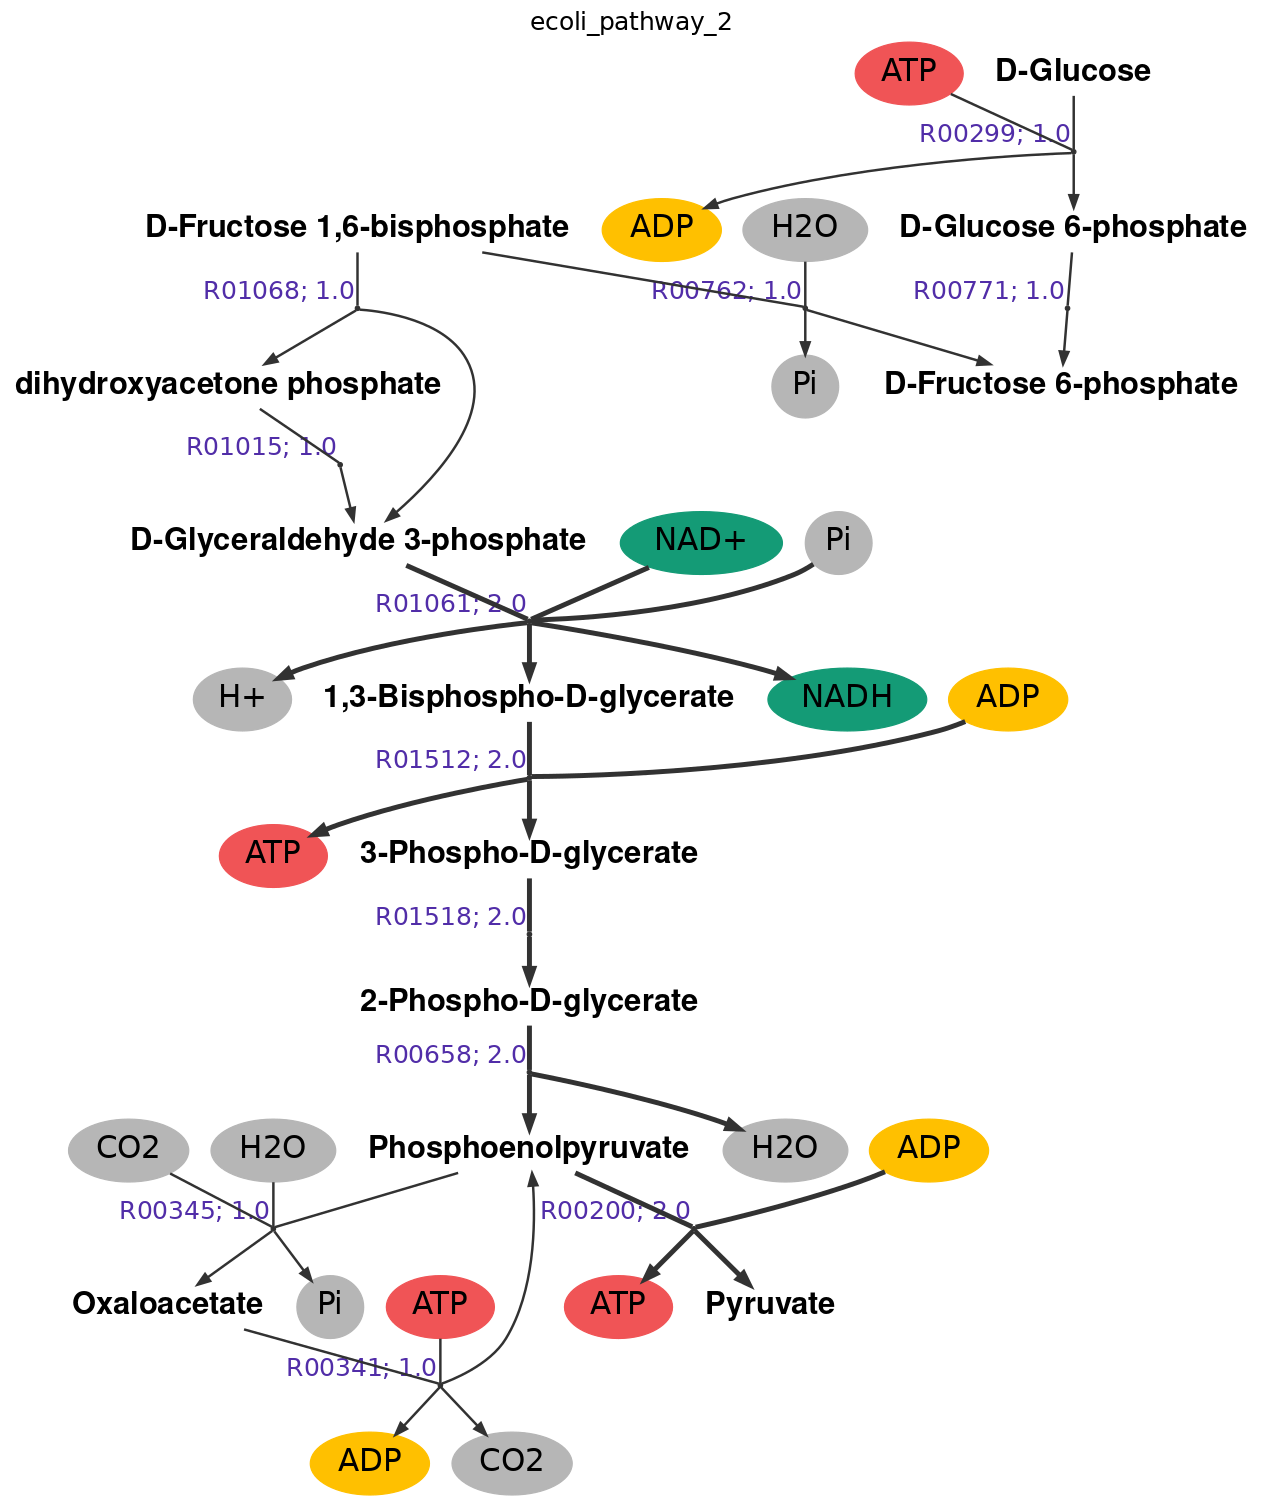

In [16]:
test_paths = pd.read_json(r'./result_glycolisis/glic_minflux.json')

test_path1 = Pathway(name='ecoli_pathway_2',
                    reaction_ids=list(test_paths[2]['pathway'].keys()),
                    fluxes=list(test_paths[2]['pathway'].values()))

# Create a png image
figure_filename = 'ecoli_pathway_2mf'
figure_ext = "png"

g = draw_pathway(
    test_path1, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=test_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)

### Test EnzymeLoad

In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=5,
                    pulp_solver=pulp_solver,
                    result_filepath='./result_glycolisis/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways, enzyme_loads = ecoli_test.solve(outputfile='glic_elm.json',
                                              max_iteration=ecoli_test.max_iteration)

2021-04-26 17:29:27 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic EnzymeLoad...
2021-04-26 17:29:27 optstoic.OptStoic INFO     Formulating problem...
2021-04-26 17:29:27 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-04-26 17:29:27 optstoic.OptStoic INFO     Solving problem...
2021-04-26 17:29:27 optstoic.OptStoic INFO     Iteration 1
2021-04-26 17:29:28 optstoic.OptStoic INFO     This iteration solved in 0.055 seconds.
2021-04-26 17:29:28 optstoic.OptStoic INFO     Writing result to output file...


In [4]:
ecoli_pathways

{1: <OptStoicPathway(id='1', numRxn='19', nATP='2.0')>,
 2: <OptStoicPathway(id='2', numRxn='22', nATP='2.0')>}

In [5]:
enzyme_loads

{'iteration_1': {'E_EX_adp': 0.0,
  'E_EX_atp': 0.0,
  'E_EX_glc': 0.0,
  'E_EX_h2o': 0.0,
  'E_EX_hplus': 0.0,
  'E_EX_nad': 0.0,
  'E_EX_nadh': 0.0,
  'E_EX_phosphate': 0.0,
  'E_EX_pyr': 0.0,
  'E_R00086': 0.0,
  'E_R00112': 0.0,
  'E_R00114': 7.35089072945172e-17,
  'E_R00127': 0.0,
  'E_R00199': 0.0,
  'E_R00200': 0.0,
  'E_R00209': 0.0,
  'E_R00212': 0.0,
  'E_R00214': 0.0,
  'E_R00216': 0.0,
  'E_R00228': 0.0,
  'E_R00230': 0.0,
  'E_R00248': 5.876375774871434e-17,
  'E_R00253': 0.0,
  'E_R00256': 0.0,
  'E_R00267': 0.0,
  'E_R00299': 0.011342367424025815,
  'E_R00315': 0.0,
  'E_R00341': 0.0,
  'E_R00342': 0.0,
  'E_R00345': 0.0,
  'E_R00351': 0.0,
  'E_R00405': 0.0,
  'E_R00472': 0.0,
  'E_R00479': 0.0,
  'E_R00658': 0.0014721707250267616,
  'E_R00704': 0.0,
  'E_R00754': 0.0,
  'E_R00756': 0.0018047897627044395,
  'E_R00762': 0.0,
  'E_R00771': 0.00014829825456114454,
  'E_R00835': 0.0,
  'E_R01015': 0.0,
  'E_R01056': 0.0,
  'E_R01061': 0.003146736898870191,
  'E_R01067': 0.

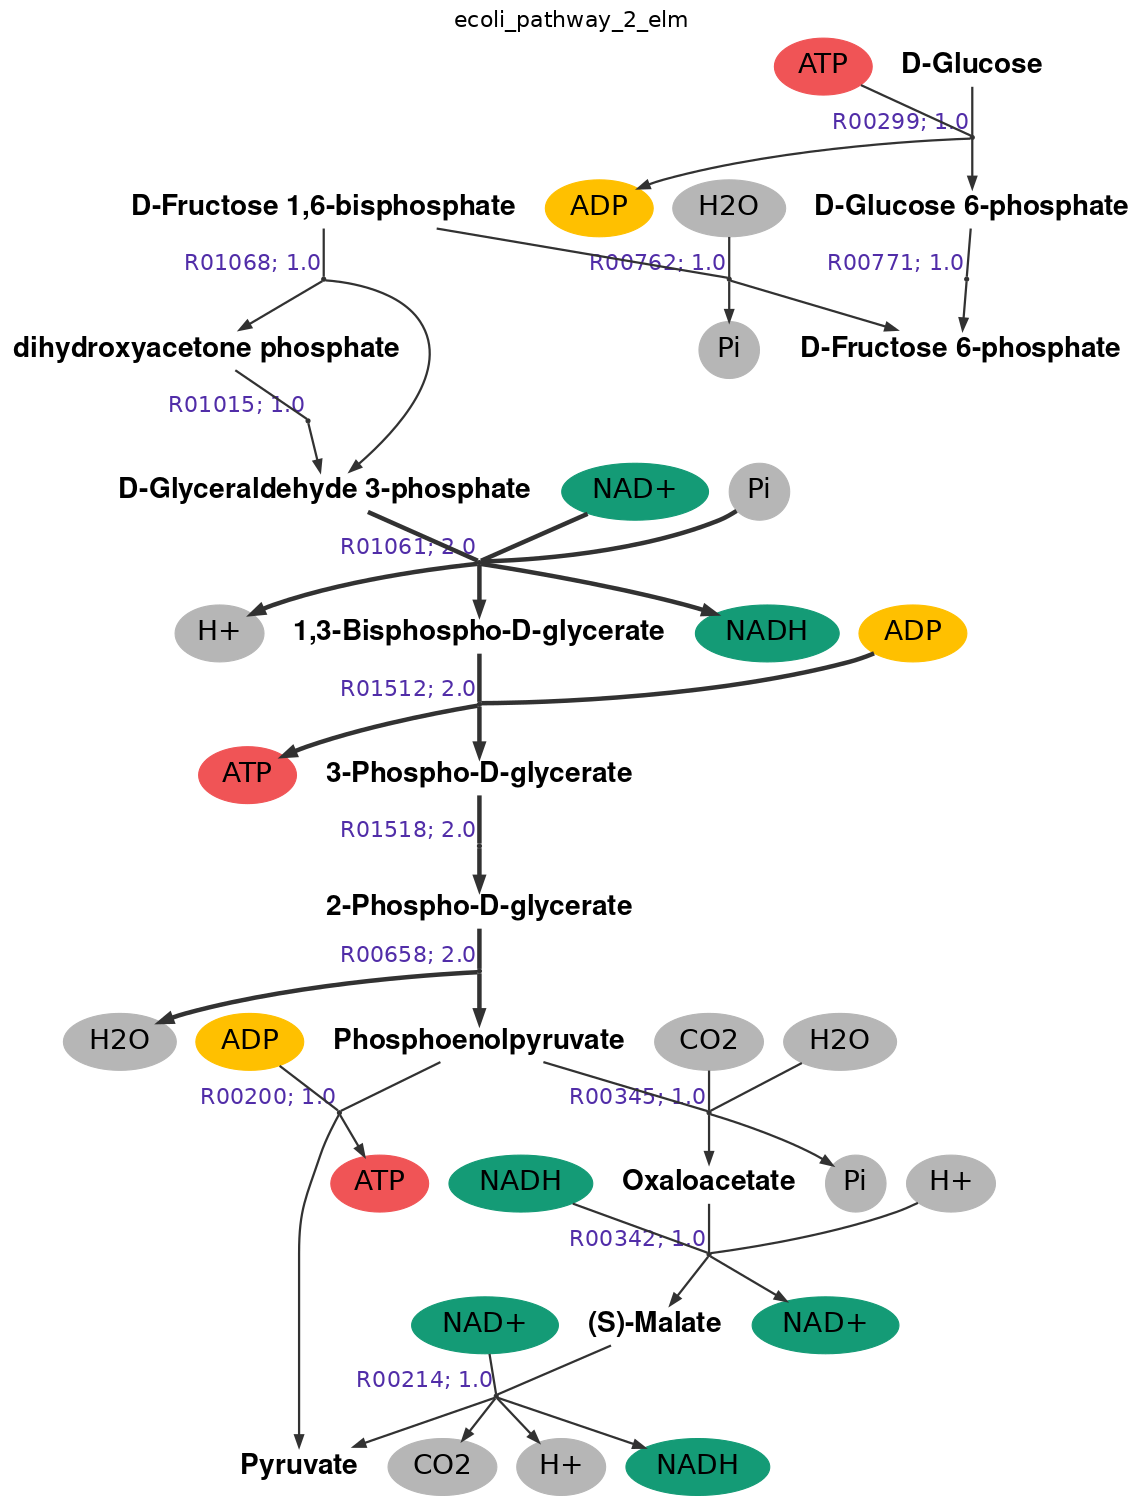

In [18]:
test_paths = pd.read_json(r'./result_glycolisis/glic_elm.json')

test_path2 = Pathway(name='ecoli_pathway_2_elm',
                    reaction_ids=list(test_paths[2]['pathway'].keys()),
                    fluxes=list(test_paths[2]['pathway'].values()))

# Create a png image
figure_filename = 'ecoli_pathway_2_elm'
figure_ext = "png"

g = draw_pathway(
    test_path2, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=test_path2.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)

# Caso de estudio g3p con e coli core

El objetivo de esta sección es evaluar cómo se comporta optstoic (minflux y enzymeload) en un caso que el metabolismo central tiene 2 o más caminos distintos a partir del mismo sustrato inicial y producto final:

**glucosa --> gliceraldehído 3 fosfato**

- parte 1 glicólisis
- ciclo pentosas fosfato 1: sedoheptulosa 7 fosfato + gliceraldehido 3 fosfato
- ciclo pentosas fosfato 2: fructosa 6 fosfato + gliceraldehido 3 fosfato

Camino paso por paso en ruta pentosas (saltándose glc -> g6p): 
- glucosa --> 6 fosfo-D 1,5 glucololactona <span style="color: green;">check</span>
- glucosa --> 6 fosfodgluconato <span style="color: green;">check</span>
- glucosa --> D ribulosa 5 fosfato <span style="color: green;">check</span>
- glucosa --> ribosa 5 fosfato <span style="color: green;">check</span>
- glucosa --> xilulosa 5 fosfato <span style="color: green;">check</span>
- glucosa --> sedoheptulosa 7 fosfato <span style="color: green;">check</span>
- glucosa --> eritrosa 4 fosfato <span style="color: green;">check</span>

## ru5p -> e4p + f6p

Inicio pentosas pi

In [11]:
user_defined_export_rxns_Sji={
    #'EX_glc': {'C00031': -1.0},
    #'EX_6pglc': {'C00345':-1.0},
    'EX_ru5p': {'C00199': -1.0},
    #'EX_xu5p': {'C00231': -1.0},
    #'EX_r5p': {'C00117': -1.0},
    'EX_e4p': {'C00279': -1.0},
    'EX_f6p': {'C00085': -1.0},
    #'EX_g3p': {'C00118': -1.0}
    #'EX_atp': {'C00002': -1.0},
    #'EX_adp': {'C00008': -1.0},
    #'EX_nadp': {'C00006': -1.0},
    #'EX_nadph': {'C00005': -1.0},
    #'EX_hplus': {'C00080': -1.0},
    #'EX_h2o': {'C00001': -1.0},
    #'EX_co2': {'C00011': -1.0}
    } 

specific_bounds = {#'EX_glc': {'LB': -2, 'UB': -2},
                   #'EX_6pglc': {'LB': -2, 'UB':-2},
                   'EX_ru5p':{'LB': -2, 'UB': -2},
                   #'EX_xu5p': {'LB': 1, 'UB': 1},
                   #'EX_r5p': {'LB': 1, 'UB': 1},
                   'EX_e4p': {'LB': 1, 'UB': 1},
                   'EX_f6p': {'LB': 1, 'UB': 1},
                   #'EX_g3p': {'LB': 1, 'UB': 1}
                   #'EX_atp': {'LB': -2, 'UB': 2},
                   #'EX_adp': {'LB': -2, 'UB': 2},
                   #'EX_nadp': {'LB': -1, 'UB': 1},
                   #'EX_nadph': {'LB': -1, 'UB': 1},
                   #'EX_hplus': {'LB': -2, 'UB': 3},
                   #'EX_h2o': {'LB': -1, 'UB': 1},
                   #'EX_co2': {'LB': -1, 'UB': 1}
                
                }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

### Minflux

In [12]:
g3p_case_study = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=5,
                    pulp_solver=pulp_solver,
                    result_filepath='./g3p_case_study/',
                    M=1000)

g3p_lp_problem, g3p_pathways = g3p_case_study.solve(outputfile='minflux_sol.json',
                                              max_iteration=g3p_case_study.max_iteration)

In [13]:
g3p_pathways

{1: <OptStoicPathway(id='1', numRxn='7', nATP='None')>}

#### Gráficos: 

path1: vía glicólisis

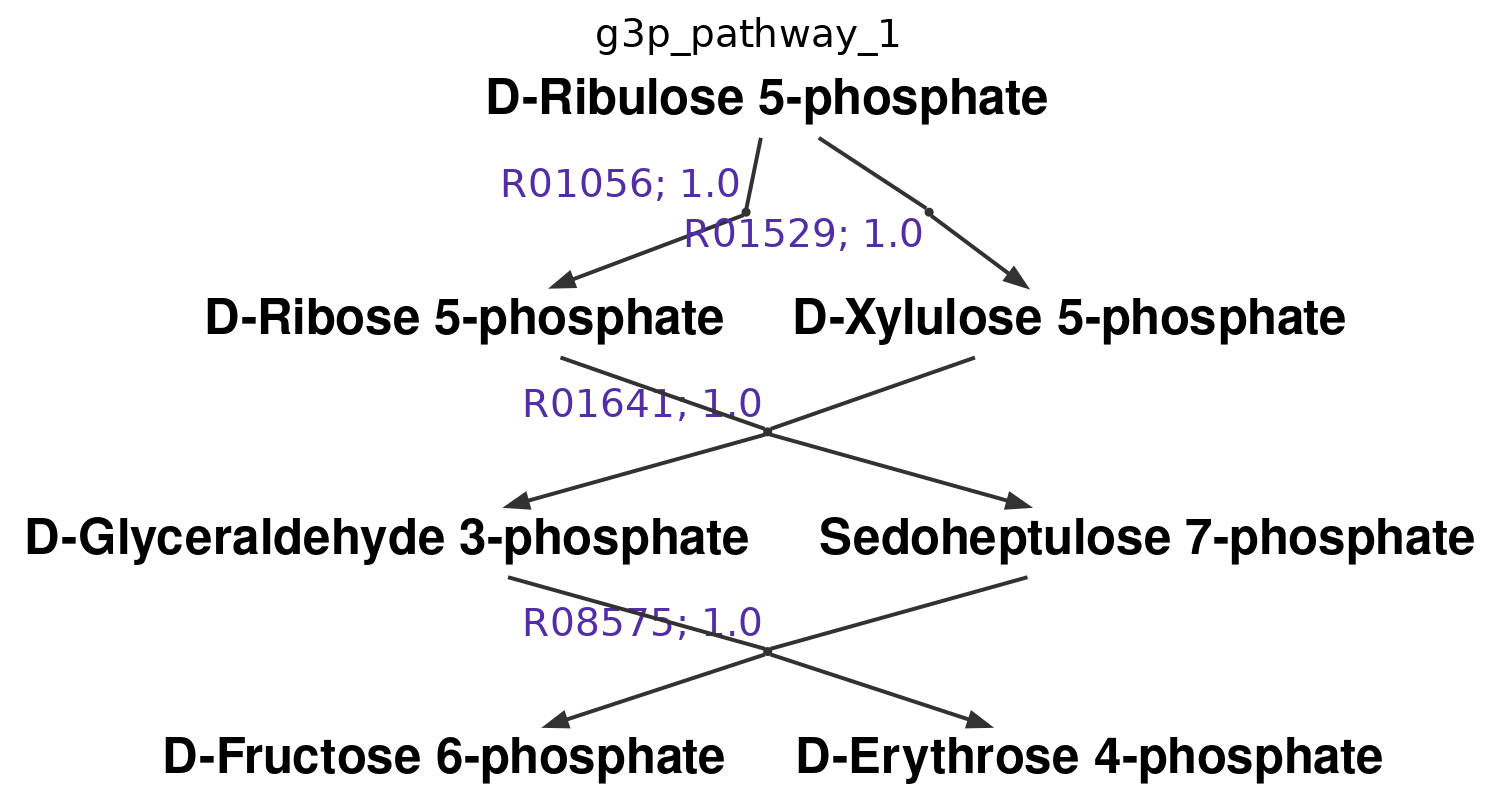

In [14]:
g3p_paths = pd.read_json(r'./g3p_case_study/minflux_sol.json')

g3p_path1 = Pathway(name='g3p_pathway_1',
                    reaction_ids=list(g3p_paths[1]['pathway'].keys()),
                    fluxes=list(g3p_paths[1]['pathway'].values()))

# Create a png image
figure_filename1 = 'g3p_pathway_1'
figure_ext1 = "png"

g = draw_pathway(
    g3p_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=g3p_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

### Enzyme Load

In [15]:
g3p_case_study_elm = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=6,
                    pulp_solver=pulp_solver,
                    result_filepath='./g3p_case_study/',
                    M=1000)

g3p_lp_problem, g3p_pathways = g3p_case_study.solve(outputfile='enzymeload_sol.json',
                                              max_iteration=g3p_case_study_elm.max_iteration)

In [16]:
g3p_pathways

{1: <OptStoicPathway(id='1', numRxn='7', nATP='None')>}

## glc -> ru5p

In [31]:
user_defined_export_rxns_Sji={
    'EX_glc': {'C00031': -1.0},
    #'EX_6pgc': {'C00345':-1.0},
    'EX_ru5p': {'C00199': -1.0},
    #'EX_xu5p': {'C00231': -1.0},
    #'EX_r5p': {'C00117': -1.0},
    #'EX_e4p': {'C00279': -1.0},
    #'EX_f6p': {'C00085': -1.0},
    #'EX_g3p': {'C00118': -1.0}
    'EX_atp': {'C00002': -1.0},
    'EX_adp': {'C00008': -1.0},
    'EX_nadp': {'C00006': -1.0},
    'EX_nadph': {'C00005': -1.0},
    'EX_hplus': {'C00080': -1.0},
    'EX_h2o': {'C00001': -1.0},
    'EX_co2': {'C00011': -1.0}
    } 

specific_bounds = {'EX_glc': {'LB': -1, 'UB': -1},
                   #'EX_6pgc': {'LB': -1, 'UB': -1},
                   'EX_ru5p':{'LB': 1, 'UB': 1},
                   #'EX_xu5p': {'LB': 1, 'UB': 1},
                   #'EX_r5p': {'LB': 1, 'UB': 1},
                   #'EX_e4p': {'LB': 1, 'UB': 1},
                   #'EX_f6p': {'LB': 1, 'UB': 1},
                   #'EX_g3p': {'LB': 1, 'UB': 1}
                   'EX_atp': {'LB': -2, 'UB': 2},
                   'EX_adp': {'LB': -2, 'UB': 2},
                   'EX_nadp': {'LB': -2, 'UB': -2},
                   'EX_nadph': {'LB': 2, 'UB': 2},
                   'EX_hplus': {'LB': 2, 'UB': 3},
                   'EX_h2o': {'LB': -1, 'UB': -1},
                   'EX_co2': {'LB': 1, 'UB': 1}
                
                }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

In [32]:
g3p_case_study = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=5,
                    pulp_solver=pulp_solver,
                    result_filepath='./g3p_case_study/',
                    M=1000)

g3p_lp_problem, g3p_pathways = g3p_case_study.solve(outputfile='minflux_sol.json',
                                              max_iteration=g3p_case_study.max_iteration)

In [33]:
g3p_pathways

{1: <OptStoicPathway(id='1', numRxn='13', nATP='-1.0')>}

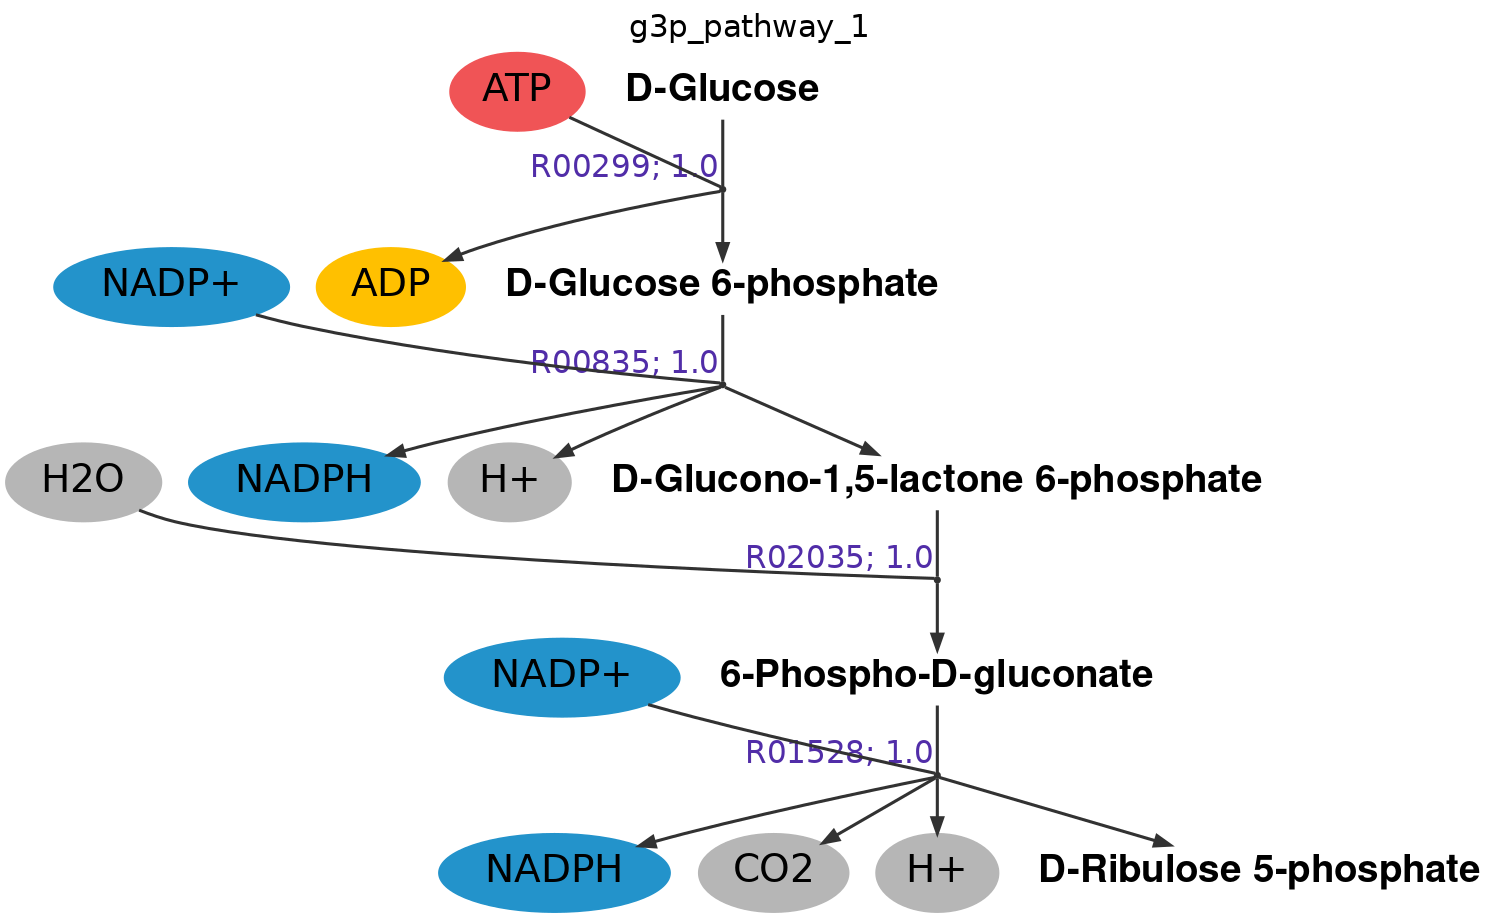

In [34]:
g3p_paths = pd.read_json(r'./g3p_case_study/minflux_sol.json')

g3p_path1 = Pathway(name='g3p_pathway_1',
                    reaction_ids=list(g3p_paths[1]['pathway'].keys()),
                    fluxes=list(g3p_paths[1]['pathway'].values()))

# Create a png image
figure_filename1 = 'g3p_pathway_1'
figure_ext1 = "png"

g = draw_pathway(
    g3p_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=g3p_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

## WORK IN PROGRESS

In [79]:
user_defined_export_rxns_Sji={
    'EX_glc': {'C00031': -1.0},
    #'EX_g6p': {'C00092': -1.0},
    #'EX_6pgl': {'C01236': -1.0},
    #'EX_6pgc': {'C00345':-1.0},
    #'EX_ru5p': {'C00199': -1.0},
    #'EX_xu5p': {'C00231': -1.0},
    #'EX_r5p': {'C00117': -1.0},
    #'EX_e4p': {'C00279': -1.0},
    #'EX_f6p': {'C00085': -1.0},
    'EX_g3p': {'C00118': -1.0},
    'EX_s7p': {'C05382': -1.0},
    'EX_atp': {'C00002': -1.0},
    'EX_adp': {'C00008': -1.0},
    'EX_nadp': {'C00006': -1.0},
    'EX_nadph': {'C00005': -1.0},
    'EX_hplus': {'C00080': -1.0},
    'EX_h2o': {'C00001': -1.0},
    'EX_co2': {'C00011': -1.0}
    } 

specific_bounds = {'EX_glc': {'LB': -2, 'UB': -1},
                   #'EX_g6p': {'LB': -2, 'UB': -2},
                   #'EX_6pgl': {'LB': -2, 'UB': -2},
                   #'EX_6pgc': {'LB': -2, 'UB': -2},
                   #'EX_ru5p':{'LB': 1, 'UB': 1},
                   #'EX_xu5p': {'LB': 1, 'UB': 1},
                   #'EX_r5p': {'LB': 1, 'UB': 1},
                   #'EX_e4p': {'LB': 1, 'UB': 1},
                   #'EX_f6p': {'LB': 1, 'UB': 1},
                   'EX_g3p': {'LB': 1, 'UB': 2},
                   'EX_s7p':{'LB': 0, 'UB': 1},
                   'EX_atp': {'LB': -4, 'UB': 4},
                   'EX_adp': {'LB': -4, 'UB': 4},
                   'EX_nadp': {'LB': -4, 'UB': 4},
                   'EX_nadph': {'LB': -4, 'UB': 4},
                   'EX_hplus': {'LB': -7, 'UB': 7},
                   'EX_h2o': {'LB': -2, 'UB': 2},
                   'EX_co2': {'LB': -2, 'UB': 2}
                
                }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

In [80]:
g3p_case_study = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=5,
                    pulp_solver=pulp_solver,
                    result_filepath='./g3p_case_study/',
                    M=1000)

g3p_lp_problem, g3p_pathways = g3p_case_study.solve(outputfile='minflux_sol.json',
                                              max_iteration=g3p_case_study.max_iteration)

In [81]:
g3p_pathways

{1: <OptStoicPathway(id='1', numRxn='9', nATP='-2.0')>,
 2: <OptStoicPathway(id='2', numRxn='17', nATP='-2.0')>}

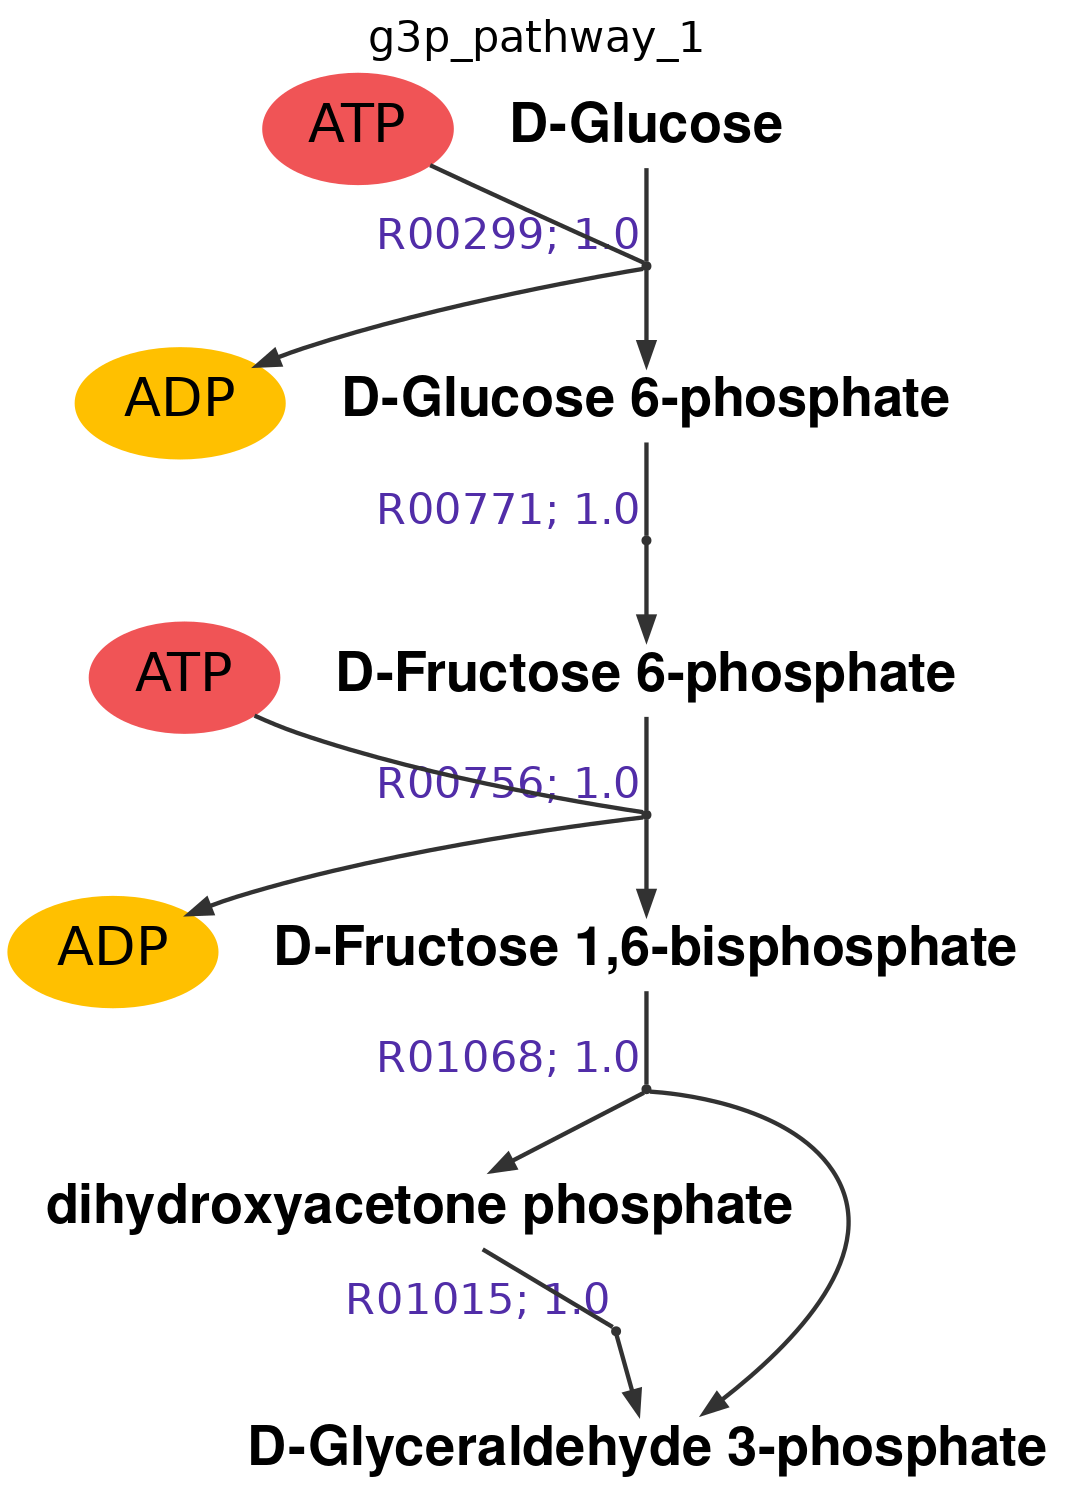

In [82]:
g3p_paths = pd.read_json(r'./g3p_case_study/minflux_sol.json')

g3p_path1 = Pathway(name='g3p_pathway_1',
                    reaction_ids=list(g3p_paths[1]['pathway'].keys()),
                    fluxes=list(g3p_paths[1]['pathway'].values()))

# Create a png image
figure_filename1 = 'g3p_pathway_1'
figure_ext1 = "png"

g = draw_pathway(
    g3p_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=g3p_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

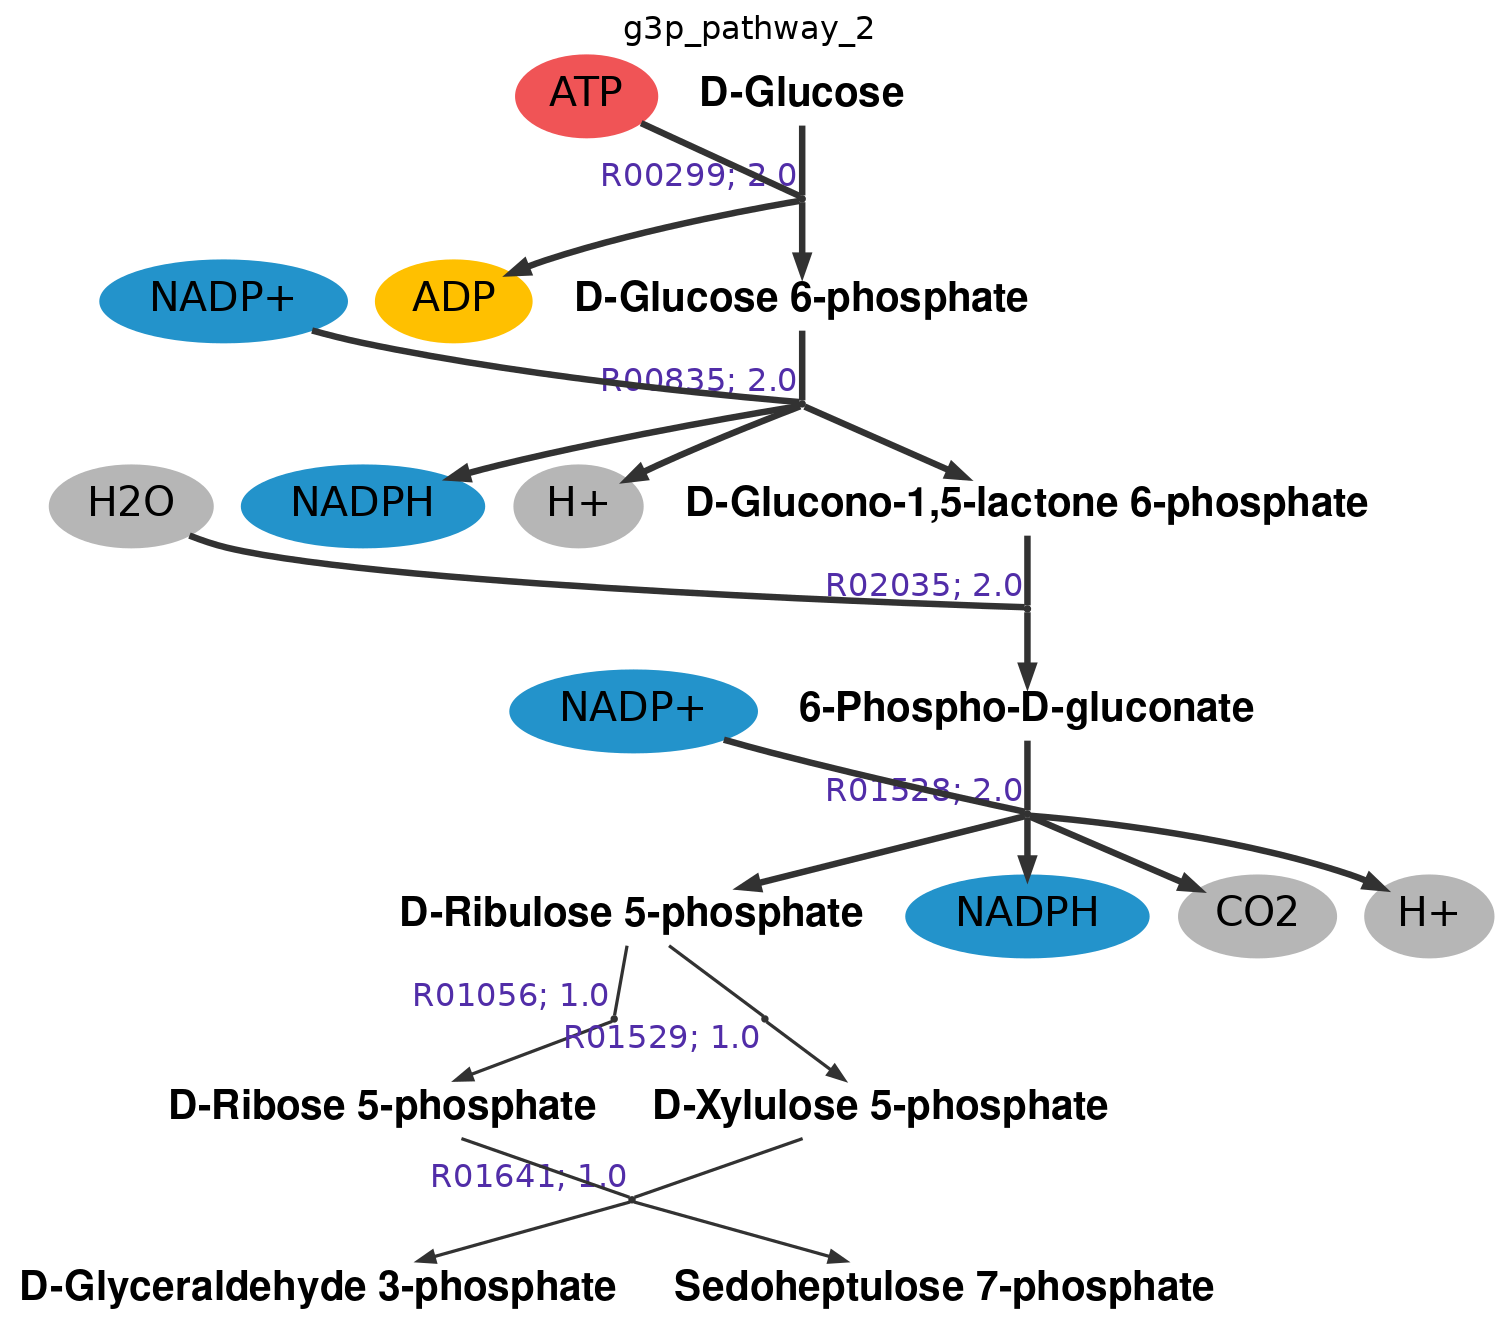

In [84]:
g3p_path2 = Pathway(name='g3p_pathway_2',
                    reaction_ids=list(g3p_paths[2]['pathway'].keys()),
                    fluxes=list(g3p_paths[2]['pathway'].values()))

# Create a png image
figure_filename2 = 'g3p_pathway_2'
figure_ext1 = "png"

g = draw_pathway(
    g3p_path2, 
    imageFileName=figure_filename2, 
    imageFormat=figure_ext1, 
    graphTitle=g3p_path2.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename2 + "." + figure_ext1)

### EnzymeLoad

In [86]:
g3p_case_study = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=5,
                    pulp_solver=pulp_solver,
                    result_filepath='./g3p_case_study/',
                    M=1000)

g3p_lp_problem, g3p_pathways, enzyme_loads = g3p_case_study.solve(outputfile='enzymeload_sol.json',
                                              max_iteration=g3p_case_study.max_iteration)

In [87]:
g3p_pathways

{1: <OptStoicPathway(id='1', numRxn='9', nATP='-2.0')>,
 2: <OptStoicPathway(id='2', numRxn='17', nATP='-2.0')>}

In [90]:
enzyme_loads

{'iteration_1': {'E_EX_adp': 0.0,
  'E_EX_atp': 0.0,
  'E_EX_co2': 0.0,
  'E_EX_g3p': 0.0,
  'E_EX_glc': 0.0,
  'E_EX_h2o': 0.0,
  'E_EX_hplus': 0.0,
  'E_EX_nadp': 0.0,
  'E_EX_nadph': 0.0,
  'E_EX_s7p': 0.0,
  'E_R00086': 0.0,
  'E_R00112': 0.0,
  'E_R00114': 7.35089072945172e-17,
  'E_R00127': 0.0,
  'E_R00199': 0.0,
  'E_R00200': 0.0,
  'E_R00209': 0.0,
  'E_R00212': 0.0,
  'E_R00214': 0.0,
  'E_R00216': 0.0,
  'E_R00228': 0.0,
  'E_R00230': 0.0,
  'E_R00248': 5.876375774871434e-17,
  'E_R00253': 0.0,
  'E_R00256': 0.0,
  'E_R00267': 0.0,
  'E_R00299': 0.011342367424025815,
  'E_R00315': 0.0,
  'E_R00341': 0.0,
  'E_R00342': 0.0,
  'E_R00345': 0.0,
  'E_R00351': 0.0,
  'E_R00405': 0.0,
  'E_R00472': 0.0,
  'E_R00479': 0.0,
  'E_R00658': 0.0,
  'E_R00704': 0.0,
  'E_R00754': 0.0,
  'E_R00756': 0.0018047897627044395,
  'E_R00762': 0.0,
  'E_R00771': 0.00014829825456114457,
  'E_R00835': 6.92903995513916e-07,
  'E_R01015': 0.0,
  'E_R01056': 0.0,
  'E_R01061': 0.0,
  'E_R01067': 2.747

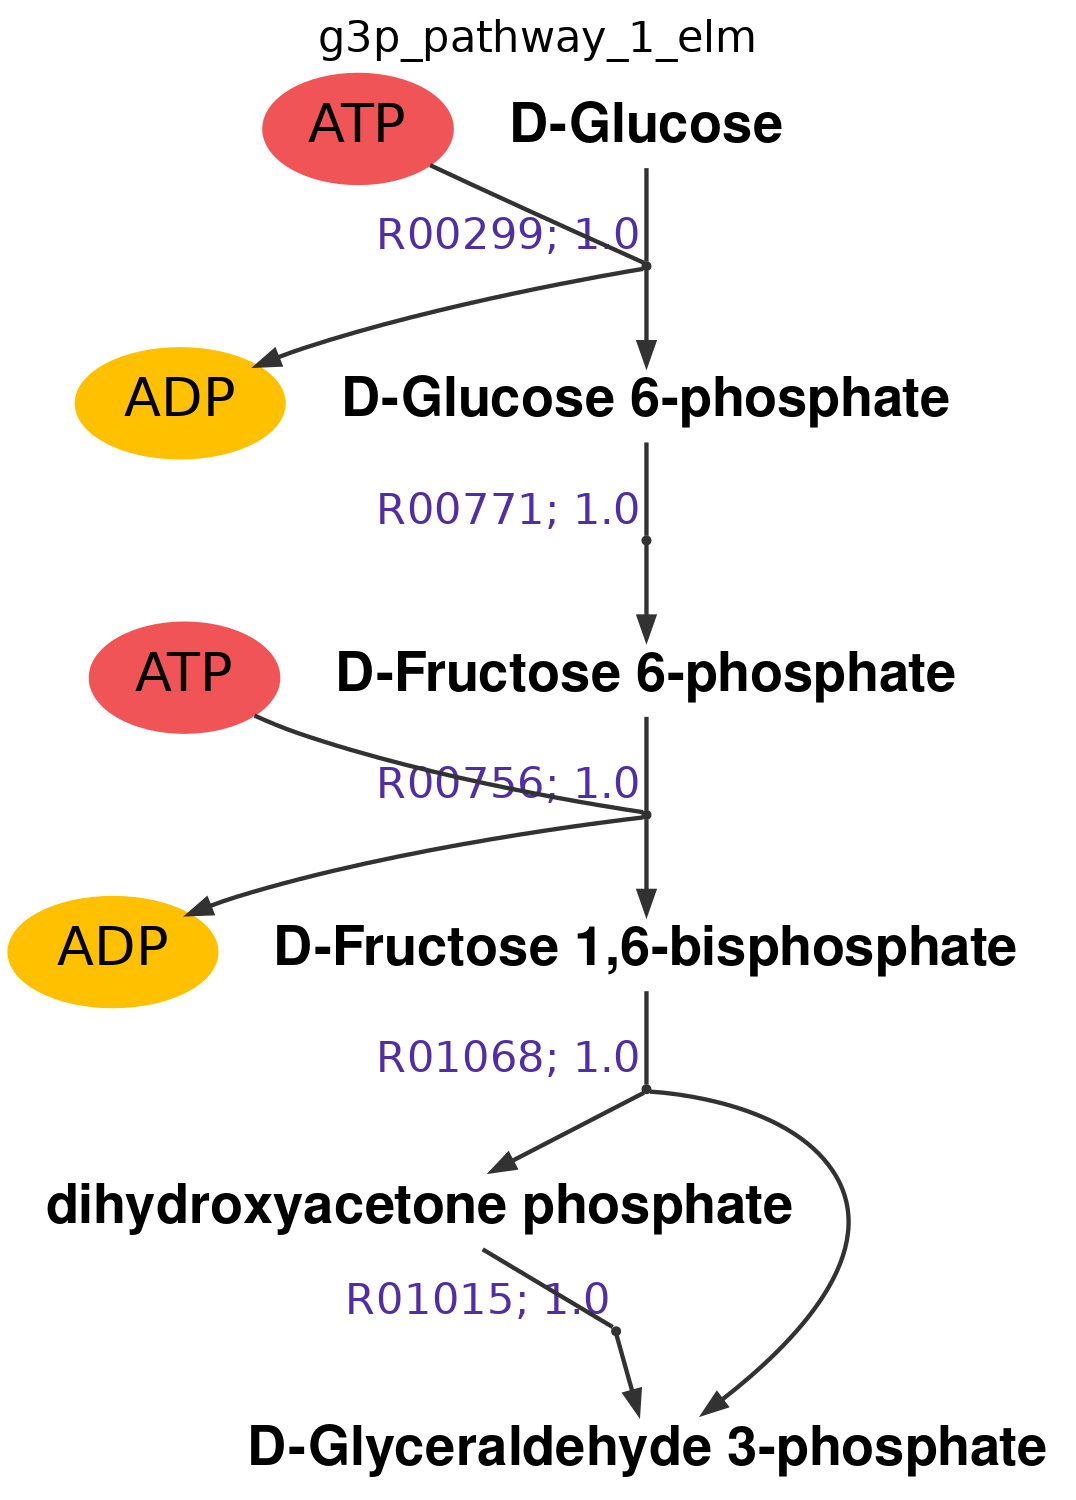

In [88]:
g3p_paths = pd.read_json(r'./g3p_case_study/enzymeload_sol.json')

g3p_path1 = Pathway(name='g3p_pathway_1_elm',
                    reaction_ids=list(g3p_paths[1]['pathway'].keys()),
                    fluxes=list(g3p_paths[1]['pathway'].values()))

# Create a png image
figure_filename1 = 'g3p_pathway_1_elm'
figure_ext1 = "png"

g = draw_pathway(
    g3p_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=g3p_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

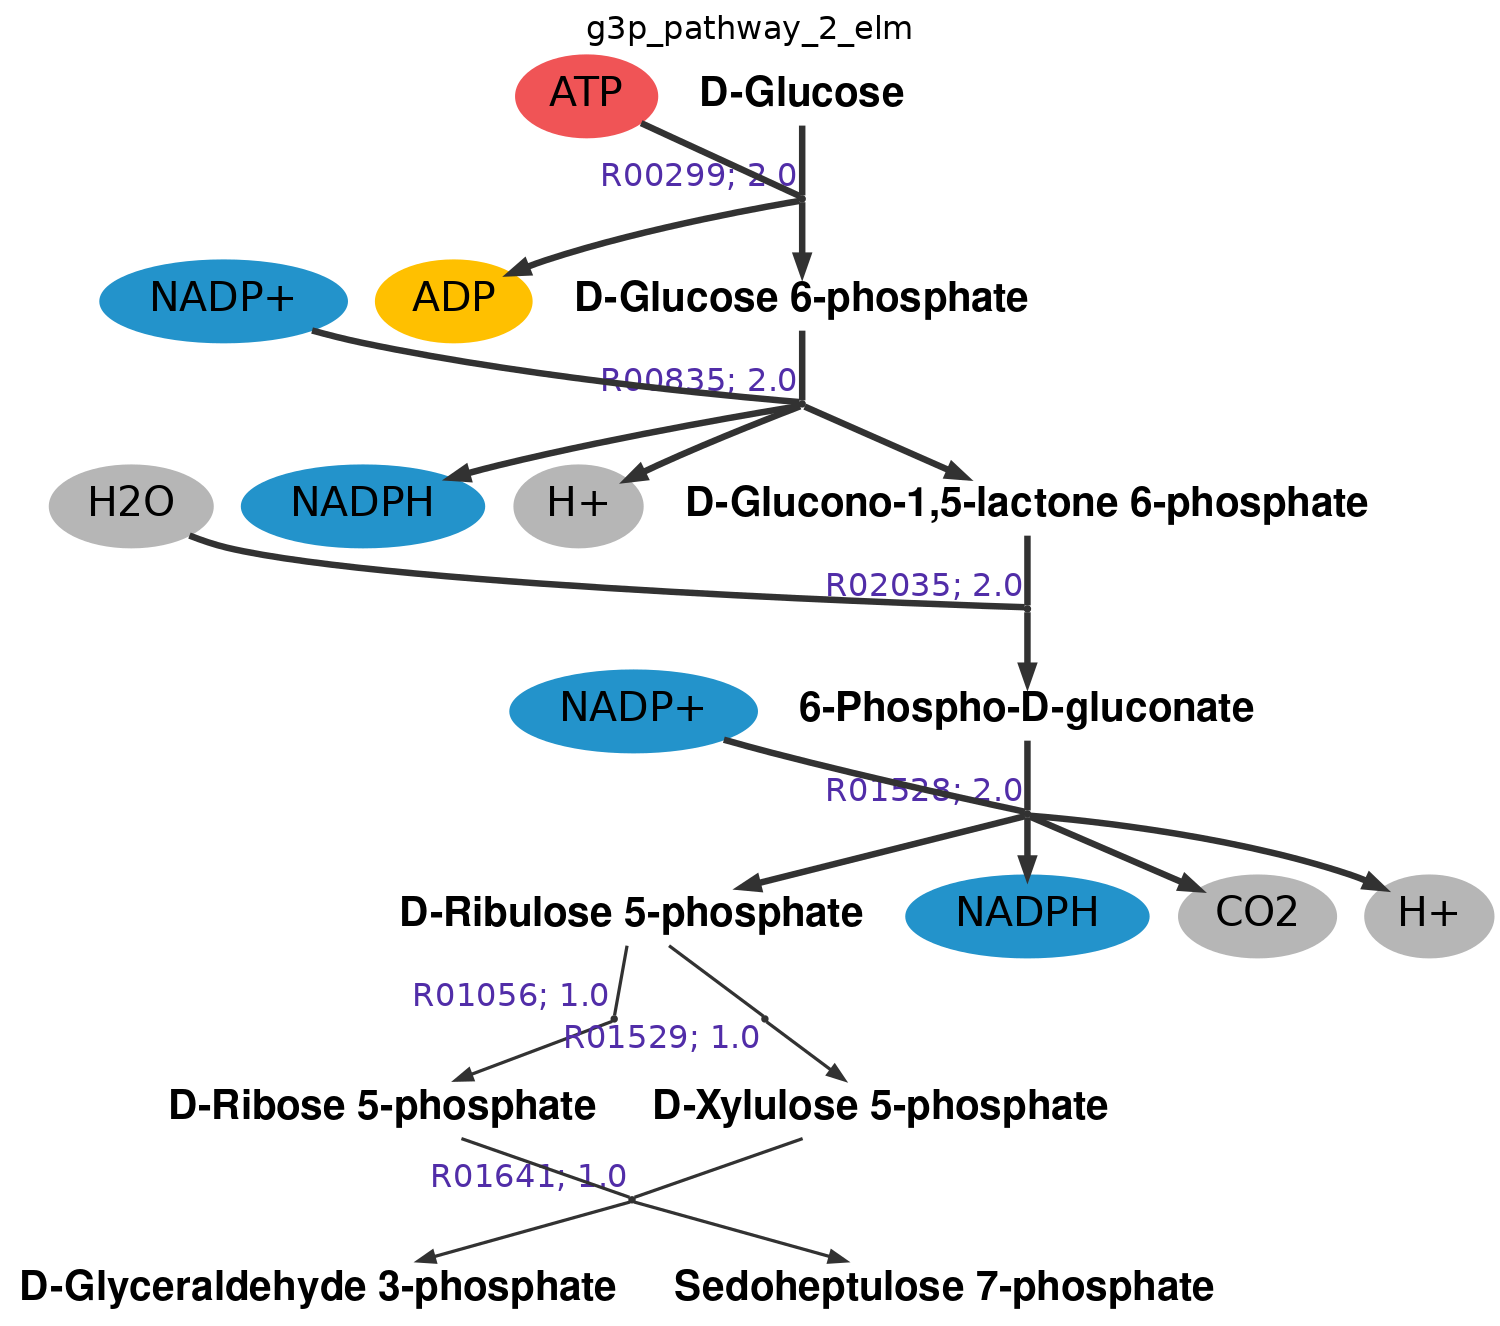

In [89]:
g3p_path2 = Pathway(name='g3p_pathway_2_elm',
                    reaction_ids=list(g3p_paths[2]['pathway'].keys()),
                    fluxes=list(g3p_paths[2]['pathway'].values()))

# Create a png image
figure_filename2 = 'g3p_pathway_2_elm'
figure_ext1 = "png"

g = draw_pathway(
    g3p_path2, 
    imageFileName=figure_filename2, 
    imageFormat=figure_ext1, 
    graphTitle=g3p_path2.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename2 + "." + figure_ext1)

# Caso de estudio piruvato a partir de 3 fuentes distintas

Producción de piruvato a partir de distintas fuentes: 
- glucosa (C00031)
    - 1 camino:
    - 1glucosa + 2ADP + 2Pi + 2NAD+ ---> 2PYR + 2ATP + 2NADH + 2H+ + 2H2O  

este caso ya está probado más arriba :)

- malato (C00149)
     - 2 caminos:
     - 1mal + 1NAD+ ---> 1NADH + 1CO2 + 1PYR + 1H+ (R00214)
     - 1mal + 1NADP+ ---> 1NADPH + 1CO2 + 1PYR + 1H+ (R00216)
     
probado más abajo :)

- lactato (C00256):
     - 1 camino (1 reacción)
     - 1lac + 1NAD+ <---> 1PYR + 1NADH + 1H+
     
probado más abajo :)

## malato --> piruvato (con nadh o nadph)

In [2]:
user_defined_export_rxns_Sji={
    #'EX_glc': {'C00031': -1.0},
    'EX_mal': {'C00149': -1.0},
    #'EX_lac': {'C00256': -1.0},
    'EX_pyr': {'C00022': -1.0},
    #'EX_atp': {'C00002': -1.0},
    #'EX_adp': {'C00008': -1.0},
    'EX_nad': {'C00003': -1.0},
    'EX_nadh': {'C00004': -1.0},
    'EX_nadph': {'C00005': -1.0},
    'EX_nadp': {'C00006': -1.0},
    'EX_hplus': {'C00080': -1.0},
    #'EX_h2o': {'C00001': -1.0},
    'EX_co2': {'C00011': -1.0}
    } 

specific_bounds = {#'EX_glc': {'LB': -1, 'UB': -1},
                   'EX_mal': {'LB': -1, 'UB': -1},
                   #'EX_lac':{'LB': -1, 'UB': -1},
                   'EX_pyr': {'LB': 1, 'UB': 1},
                   'EX_nad': {'LB': -1, 'UB': 1},
                   'EX_nadh': {'LB': -1, 'UB': 1},
                   #'EX_atp': {'LB': -2, 'UB': 2},
                   #'EX_adp': {'LB': -2, 'UB': 2},
                   'EX_nadp': {'LB': -1, 'UB': 1},
                   'EX_nadph': {'LB': -1, 'UB': 1},
                   'EX_hplus': {'LB': 1, 'UB': 1},
                   #'EX_h2o': {'LB': -2, 'UB': -2},
                   'EX_co2': {'LB': 1, 'UB': 1}
                
                }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

2021-04-22 09:59:24 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-04-22 09:59:24 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-04-22 09:59:24 core.Database DEBUG    Reading S matrix from JSON...
2021-04-22 09:59:24 core.Database DEBUG    Reading reaction type file...
2021-04-22 09:59:24 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-04-22 09:59:24 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-04-22 09:59:24 core.Database INFO     Validating database
2021-04-22 09:59:24 core.Database INFO     Validating database
2021-04-22 09:59:24 core.Database ERROR    Reaction R01140 not in database!
2021-04-22 09:59:24 core.Database ERROR    Reaction R00948 not in database!
2021-04-22 09:59:24 core.Database ERROR    Reaction R07641 not in database!
2021-04-22 09:59:24 core.Database ERROR    Reaction R00943 not in database!
2021-04-22 09:59:24 core.Database ERROR    Reaction R09599 not in dat

2021-04-22 09:59:25 core.Database ERROR    Reaction R02563 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R00910 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R00911 not in database!
2021-04-22 09:59:25 core.Database DEBUG    Reaction R00086 has been updated from Forward irreversible to Forward irreversible.
2021-04-22 09:59:25 core.Database ERROR    Reaction R00706 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R00705 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R00856 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R00855 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R01357 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R01526 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R01059 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R01523 not in database!
2021-04-22 09:59:25 core.Database DEB

2021-04-22 09:59:25 core.Database DEBUG    Reaction R00200 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-04-22 09:59:25 core.Database ERROR    Reaction R09286 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R02378 not in database!
2021-04-22 09:59:25 core.Database DEBUG    Reaction R00472 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-04-22 09:59:25 core.Database ERROR    Reaction R00724 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R00430 not in database!
2021-04-22 09:59:25 core.Database ERROR    Reaction R00572 not in database!
2021-04-22 09:59:25 core.Database INFO     Validating database


### MinFlux

In [3]:
pyr_case_study = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=4,
                    pulp_solver=pulp_solver,
                    result_filepath='./pyr_case_study/malate/',
                    M=1000)

pyr_lp_problem, pyr_pathways = pyr_case_study.solve(outputfile='minflux_sol.json',
                                              max_iteration=pyr_case_study.max_iteration)

2021-04-22 09:59:27 optstoic.OptStoic WARNING  A folder ./pyr_case_study/malate/ is created!
2021-04-22 09:59:27 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-04-22 09:59:27 optstoic.OptStoic INFO     Formulating problem...
2021-04-22 09:59:27 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-04-22 09:59:27 optstoic.OptStoic INFO     Solving problem...
2021-04-22 09:59:27 optstoic.OptStoic INFO     Iteration 1
2021-04-22 09:59:27 optstoic.OptStoic INFO     This iteration solved in 0.095 seconds.
2021-04-22 09:59:27 optstoic.OptStoic INFO     Writing result to output file...


In [10]:
pyr_pathways

{1: <OptStoicPathway(id='1', numRxn='7', nATP='None')>,
 2: <OptStoicPathway(id='2', numRxn='7', nATP='None')>,
 3: <OptStoicPathway(id='3', numRxn='9', nATP='None')>}

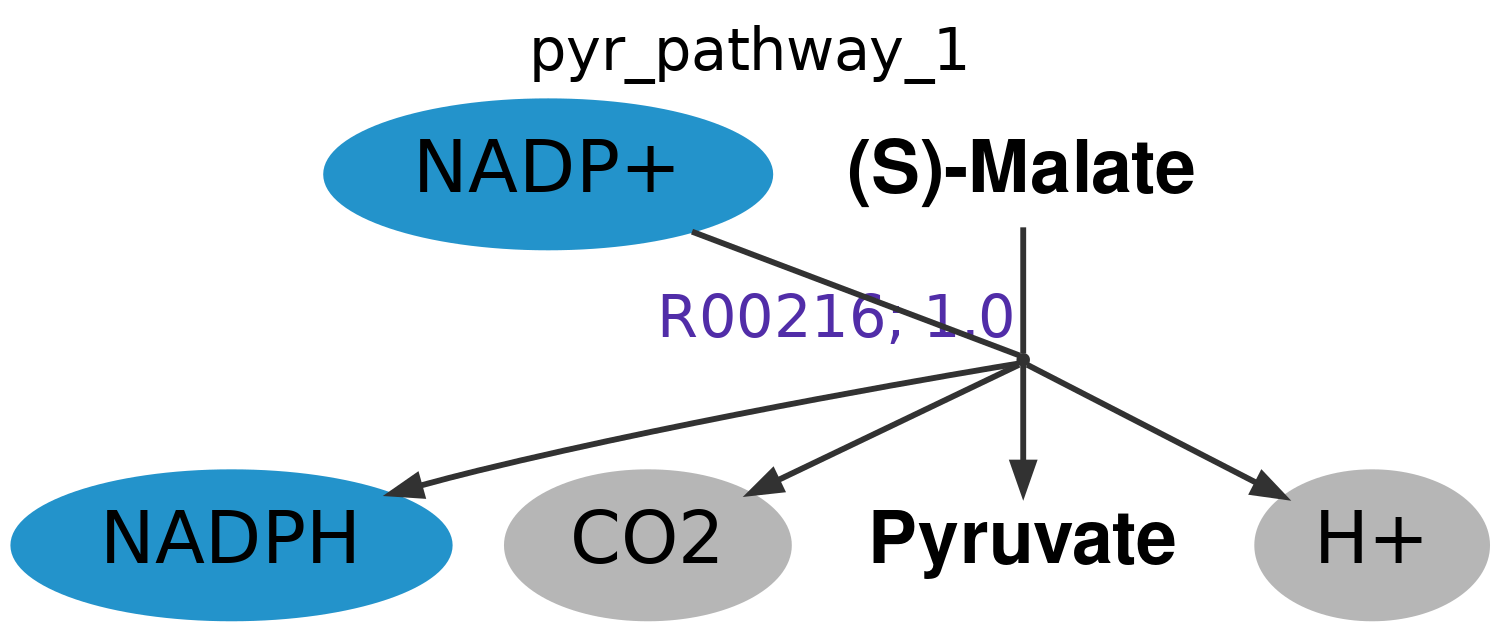

In [6]:
pyr_paths = pd.read_json(r'./pyr_case_study/malate/minflux_sol.json')

pyr_path1 = Pathway(name='pyr_pathway_1',
                    reaction_ids=list(pyr_paths[1]['pathway'].keys()),
                    fluxes=list(pyr_paths[1]['pathway'].values()))

# Create a png image
figure_filename1 = 'pyr_pathway_1'
figure_ext1 = "png"

g = draw_pathway(
    pyr_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

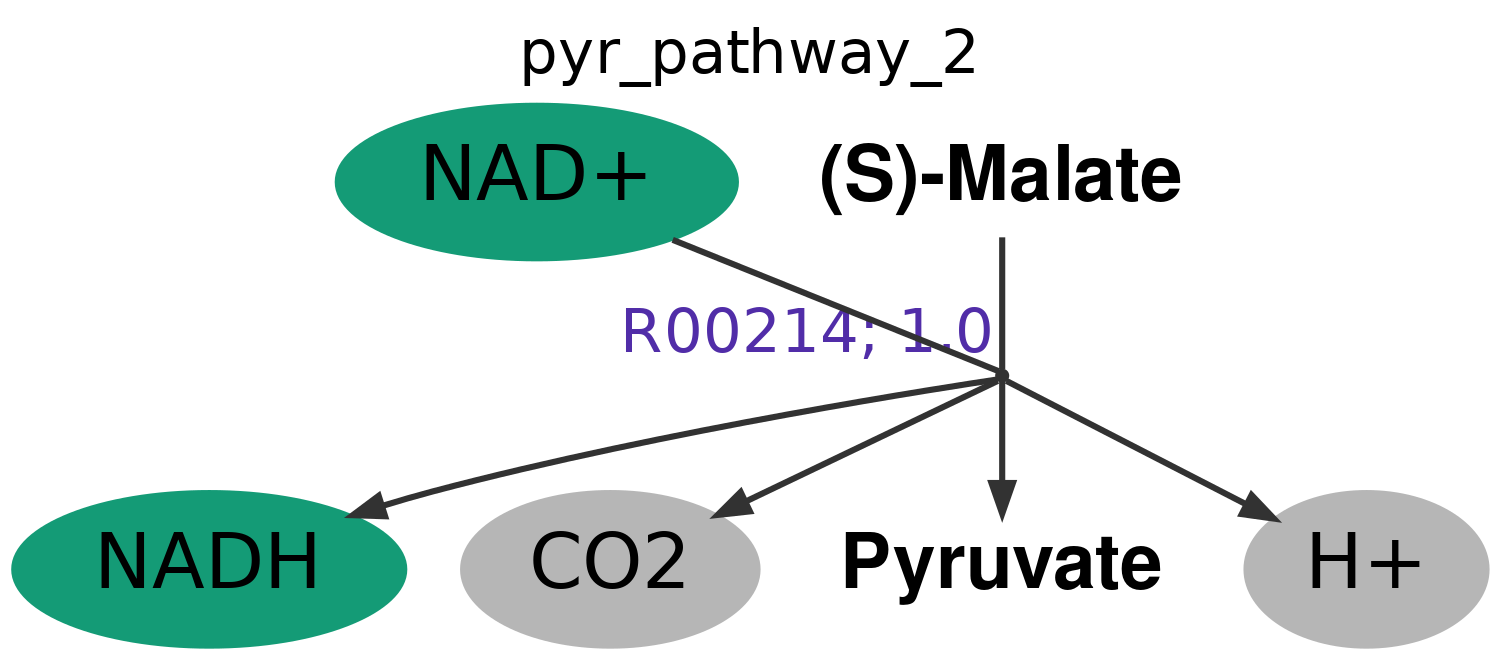

In [11]:
pyr_path2 = Pathway(name='pyr_pathway_2',
                    reaction_ids=list(pyr_paths[2]['pathway'].keys()),
                    fluxes=list(pyr_paths[2]['pathway'].values()))

# Create a png image
figure_filename2 = 'pyr_pathway_2'
figure_ext2 = "png"

g = draw_pathway(
    pyr_path2, 
    imageFileName=figure_filename2, 
    imageFormat=figure_ext2, 
    graphTitle=pyr_path2.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename2 + "." + figure_ext2)

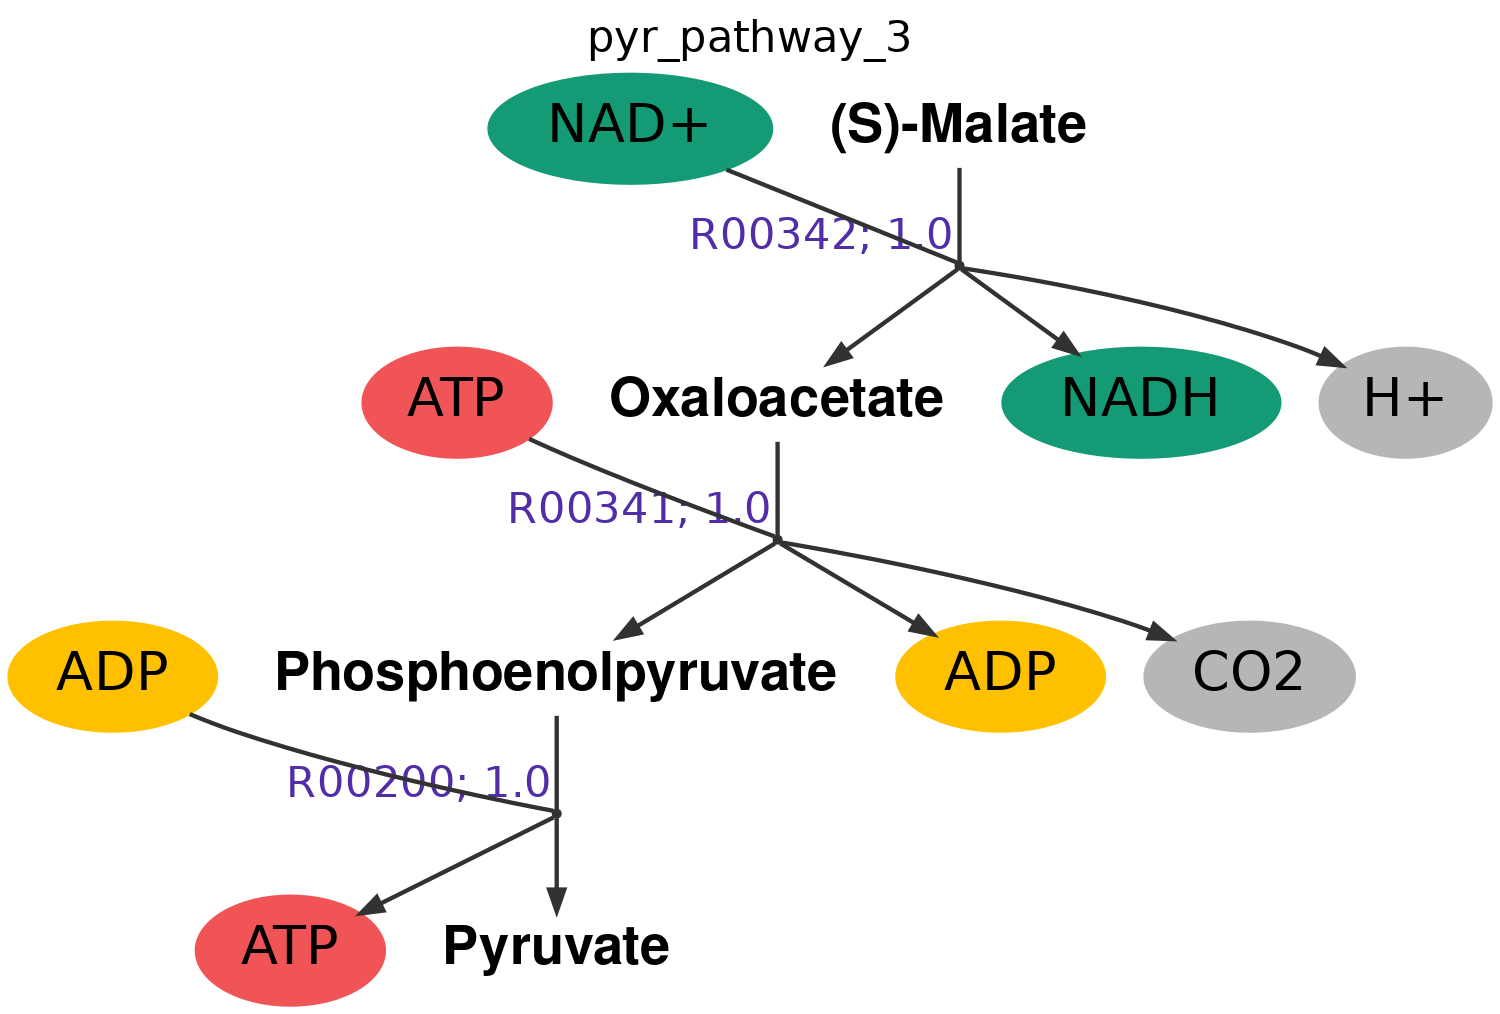

In [12]:
pyr_path3 = Pathway(name='pyr_pathway_3',
                    reaction_ids=list(pyr_paths[3]['pathway'].keys()),
                    fluxes=list(pyr_paths[3]['pathway'].values()))

# Create a png image
figure_filename3 = 'pyr_pathway_3'
figure_ext3 = "png"

g = draw_pathway(
    pyr_path3, 
    imageFileName=figure_filename3, 
    imageFormat=figure_ext3, 
    graphTitle=pyr_path3.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename3 + "." + figure_ext3)

## lactato --> piruvato

In [13]:
user_defined_export_rxns_Sji={
    'EX_lac': {'C00256': -1.0},
    'EX_pyr': {'C00022': -1.0},
    'EX_nad': {'C00003': -1.0},
    'EX_nadh': {'C00004': -1.0},
    'EX_hplus': {'C00080': -1.0}
    } 

specific_bounds = {
                   'EX_lac':{'LB': -1, 'UB': -1},
                   'EX_pyr': {'LB': 1, 'UB': 1},
                   'EX_nad': {'LB': -1, 'UB': -1},
                   'EX_nadh': {'LB': 1, 'UB': 1},
                   
                   'EX_hplus': {'LB': 1, 'UB': 1}
                }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

### MinFlux

In [14]:
pyr_case_study = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=4,
                    pulp_solver=pulp_solver,
                    result_filepath='./pyr_case_study/lactate/',
                    M=1000)

pyr_lp_problem, pyr_pathways = pyr_case_study.solve(outputfile='minflux_sol.json',
                                              max_iteration=pyr_case_study.max_iteration)

In [15]:
pyr_pathways

{1: <OptStoicPathway(id='1', numRxn='6', nATP='None')>}

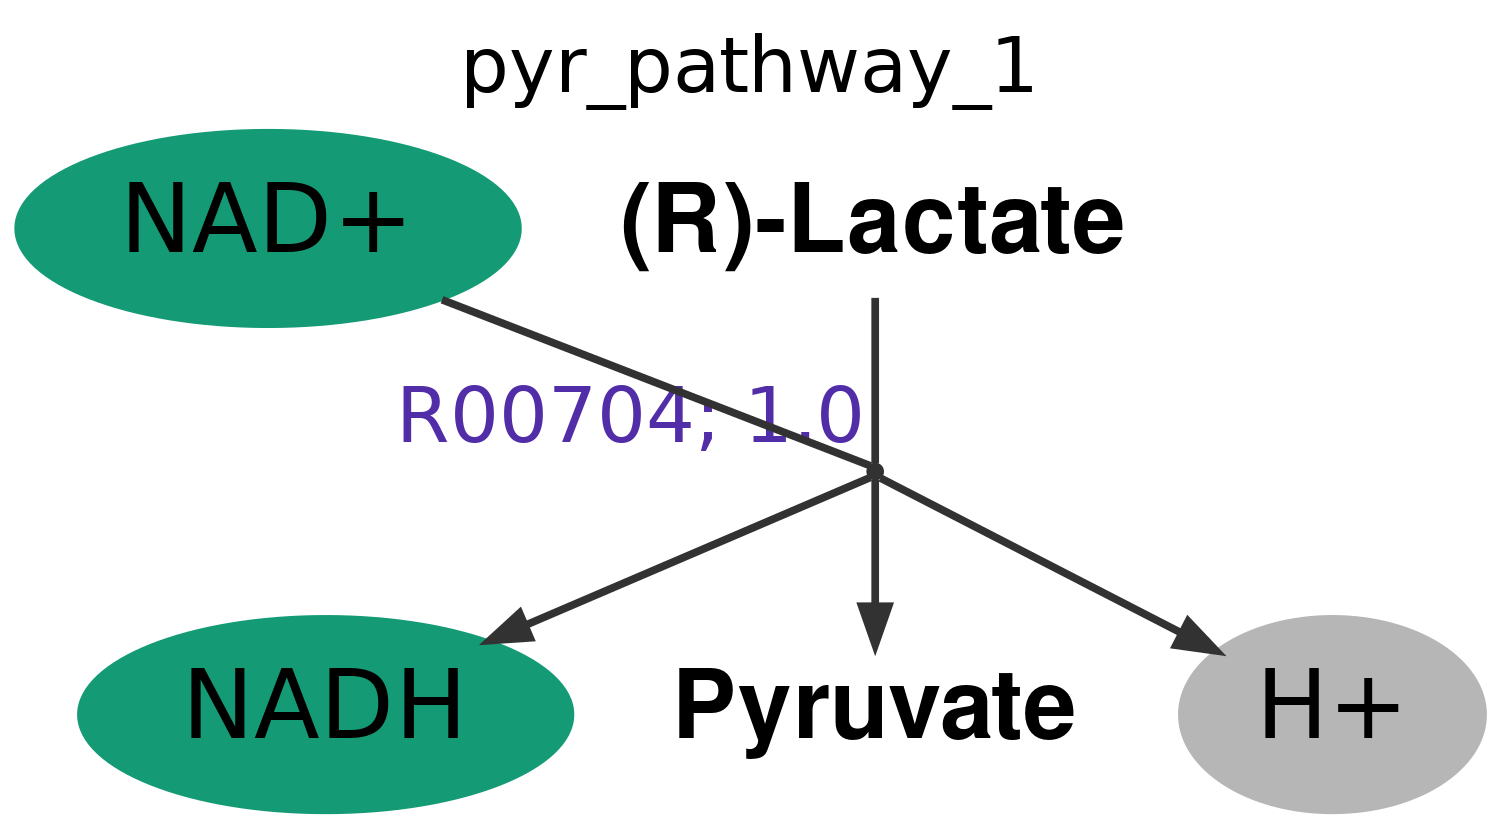

In [16]:
pyr_paths = pd.read_json(r'./pyr_case_study/lactate/minflux_sol.json')

pyr_path1 = Pathway(name='pyr_pathway_1',
                    reaction_ids=list(pyr_paths[1]['pathway'].keys()),
                    fluxes=list(pyr_paths[1]['pathway'].values()))

# Create a png image
figure_filename1 = 'pyr_pathway_1'
figure_ext1 = "png"

g = draw_pathway(
    pyr_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

## All in one!

In [6]:
user_defined_export_rxns_Sji={
    'EX_glc': {'C00031': -1.0},
    'EX_mal': {'C00149': -1.0},
    'EX_lac': {'C00256': -1.0},
    'EX_pyr': {'C00022': -1.0},
    'EX_atp': {'C00002': -1.0},
    'EX_adp': {'C00008': -1.0},
    'EX_nad': {'C00003': -1.0},
    'EX_nadh': {'C00004': -1.0},
    'EX_nadph': {'C00005': -1.0},
    'EX_nadp': {'C00006': -1.0},
    'EX_hplus': {'C00080': -1.0},
    'EX_h2o': {'C00001': -1.0},
    'EX_phosphate': {'C00009': -1.0},
    'EX_co2': {'C00011': -1.0}
    } 

specific_bounds = {'EX_glc': {'LB': -1, 'UB': 0},
                   'EX_mal': {'LB': -1, 'UB': 0},
                   'EX_lac':{'LB': -1, 'UB': 0},
                   'EX_pyr': {'LB': 1, 'UB': 2},
                   'EX_nad': {'LB': -2, 'UB': 0},
                   'EX_nadh': {'LB': 0, 'UB': 2},
                   'EX_atp': {'LB': 0, 'UB': 2},
                   'EX_adp': {'LB': -2, 'UB': 0},
                   'EX_nadp': {'LB': -1, 'UB': 0},
                   'EX_nadph': {'LB': 0, 'UB': 1},
                   'EX_hplus': {'LB': 1, 'UB': 2},
                   'EX_h2o': {'LB': 0, 'UB': 1},
                   'EX_phosphate': {'LB': 0, 'UB': 2},
                   'EX_co2': {'LB': 0, 'UB': 1}
                
                }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

### MinFlux

In [3]:
pyr_case_study = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=6,
                    pulp_solver=pulp_solver,
                    result_filepath='./pyr_case_study/',
                    M=1000)

pyr_lp_problem, pyr_pathways = pyr_case_study.solve(outputfile='minflux_sol.json',
                                              max_iteration=pyr_case_study.max_iteration)

2021-04-26 16:39:56 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-04-26 16:39:56 optstoic.OptStoic INFO     Formulating problem...
2021-04-26 16:39:56 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-04-26 16:39:56 optstoic.OptStoic INFO     Solving problem...
2021-04-26 16:39:56 optstoic.OptStoic INFO     Iteration 1
2021-04-26 16:39:56 optstoic.OptStoic INFO     This iteration solved in 0.048 seconds.
2021-04-26 16:39:56 optstoic.OptStoic INFO     Writing result to output file...


In [4]:
pyr_pathways

{1: <OptStoicPathway(id='1', numRxn='9', nATP='None')>,
 2: <OptStoicPathway(id='2', numRxn='11', nATP='None')>,
 3: <OptStoicPathway(id='3', numRxn='11', nATP='None')>,
 4: <OptStoicPathway(id='4', numRxn='17', nATP='None')>}

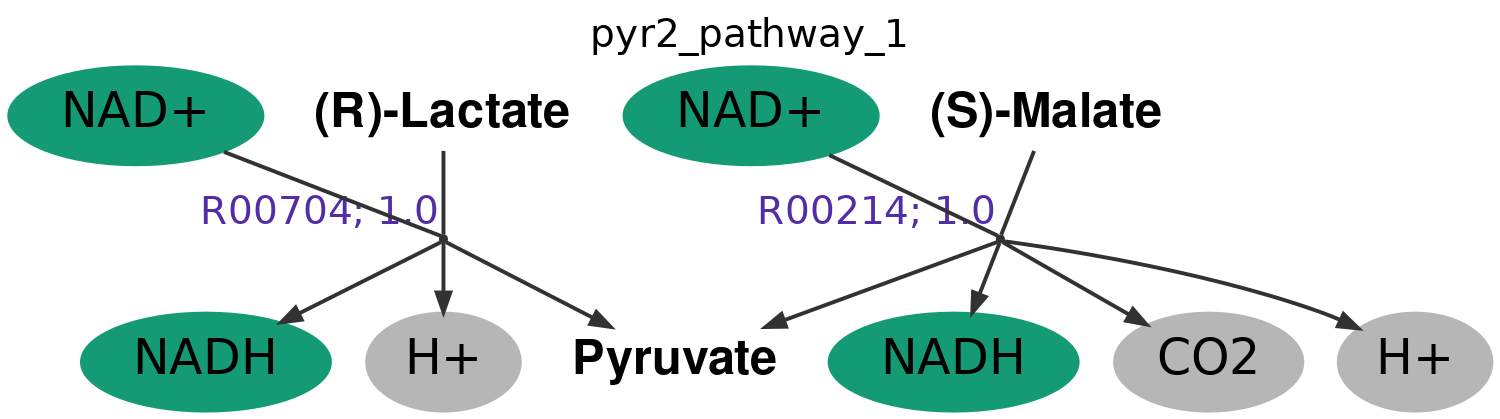

In [6]:
pyr_paths = pd.read_json(r'./pyr_case_study/minflux_sol.json')

pyr_path1 = Pathway(name='pyr2_pathway_1',
                    reaction_ids=list(pyr_paths[1]['pathway'].keys()),
                    fluxes=list(pyr_paths[1]['pathway'].values()))

# Create a png image
figure_filename1 = 'pyr2_pathway_1'
figure_ext1 = "png"

g = draw_pathway(
    pyr_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

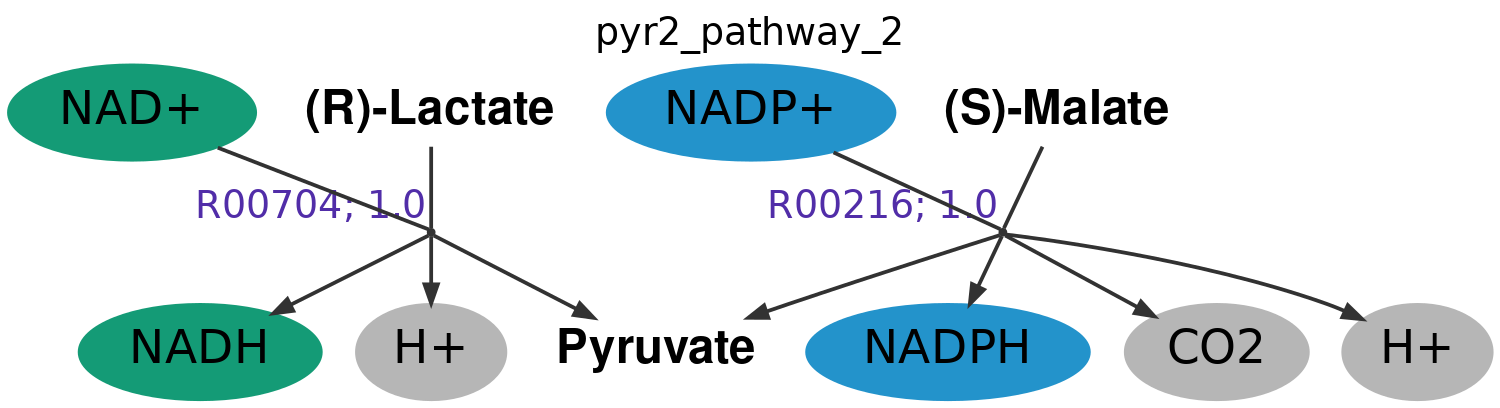

In [7]:
pyr_path2 = Pathway(name='pyr2_pathway_2',
                    reaction_ids=list(pyr_paths[2]['pathway'].keys()),
                    fluxes=list(pyr_paths[2]['pathway'].values()))

# Create a png image
figure_filename2 = 'pyr2_pathway_2'

g = draw_pathway(
    pyr_path2, 
    imageFileName=figure_filename2, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path2.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename2 + "." + figure_ext1)

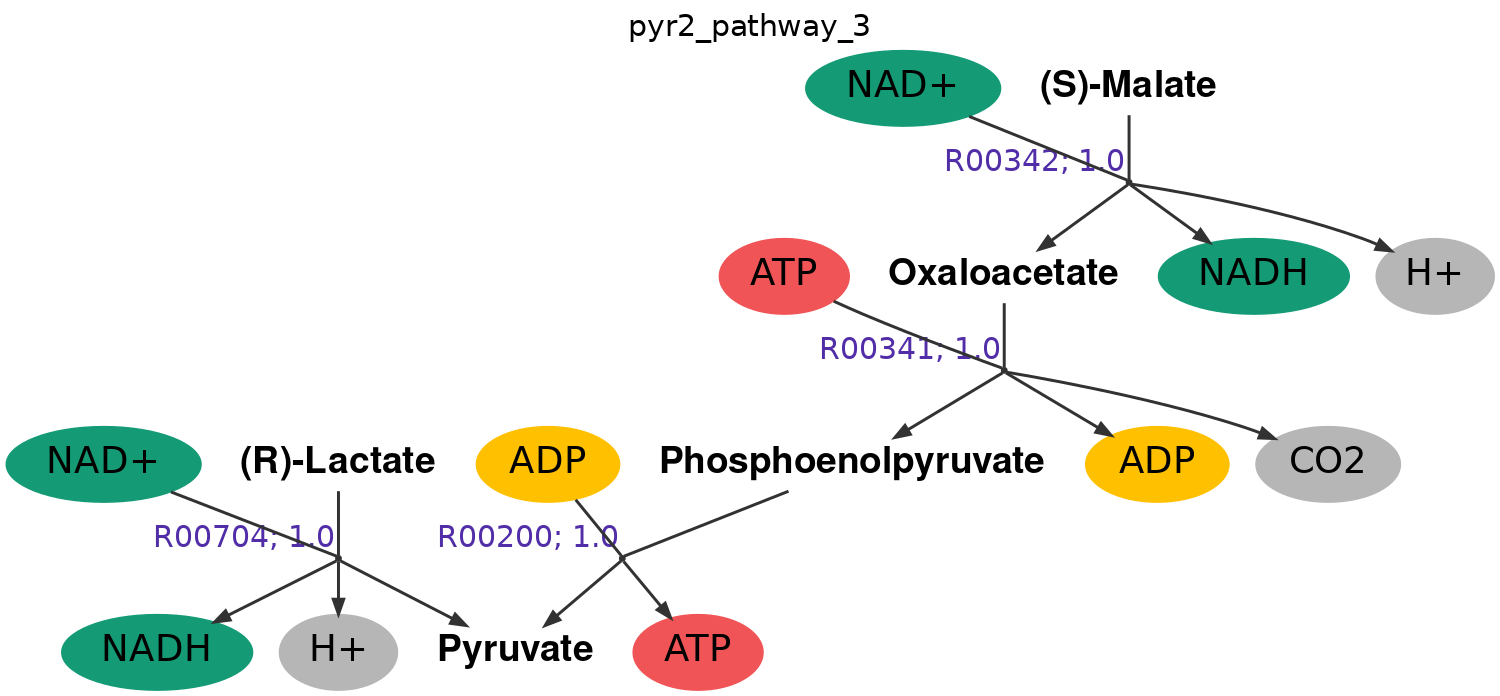

In [9]:
pyr_path3 = Pathway(name='pyr2_pathway_3',
                    reaction_ids=list(pyr_paths[3]['pathway'].keys()),
                    fluxes=list(pyr_paths[3]['pathway'].values()))

# Create a png image
figure_filename3 = 'pyr2_pathway_3'

g = draw_pathway(
    pyr_path3, 
    imageFileName=figure_filename3, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path3.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename3 + "." + figure_ext1)

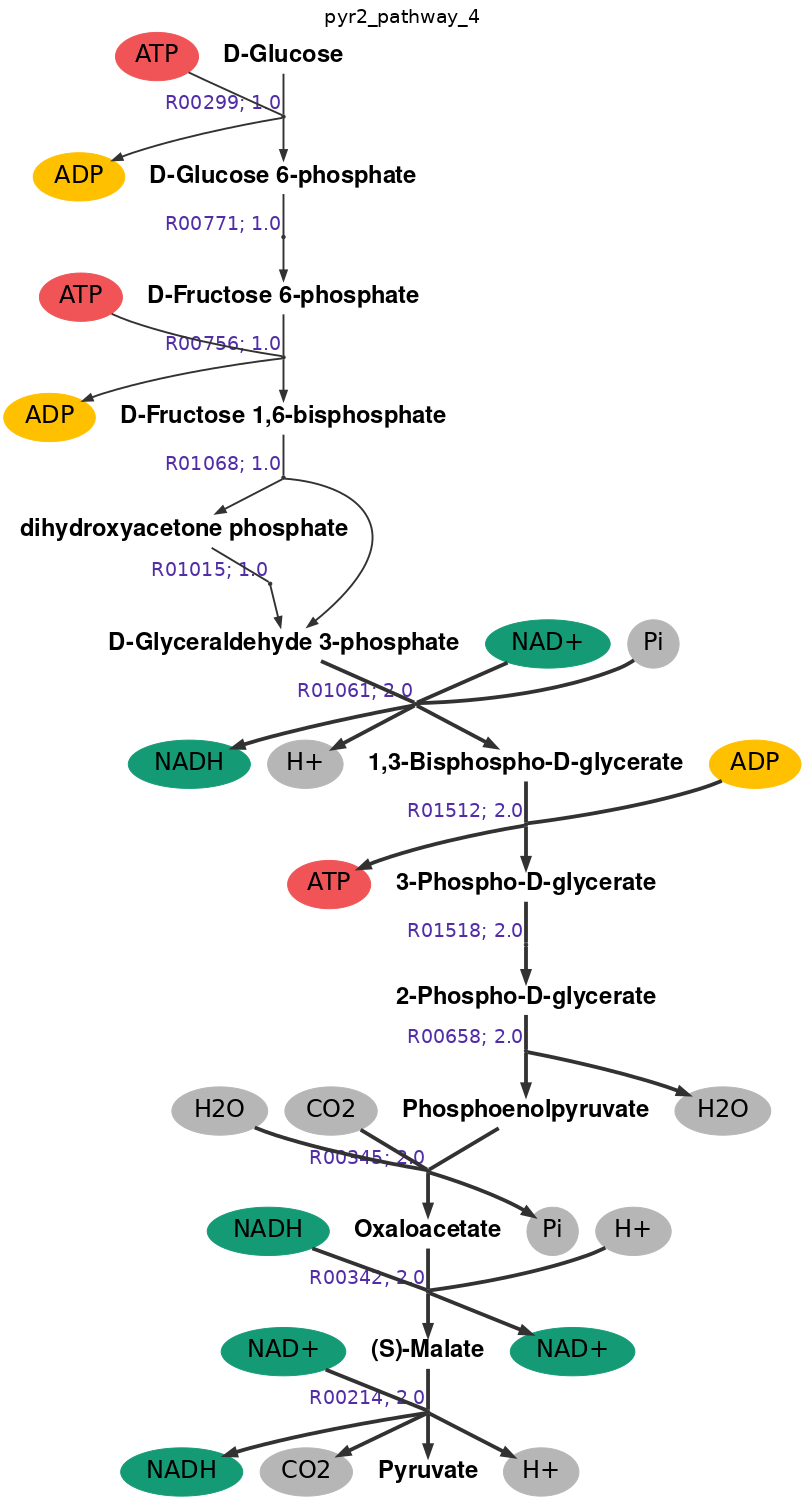

In [10]:
pyr_path4 = Pathway(name='pyr2_pathway_4',
                    reaction_ids=list(pyr_paths[4]['pathway'].keys()),
                    fluxes=list(pyr_paths[4]['pathway'].values()))

# Create a png image
figure_filename4 = 'pyr2_pathway_4'

g = draw_pathway(
    pyr_path4, 
    imageFileName=figure_filename4, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path4.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename4 + "." + figure_ext1)

### EnzymeLoad

In [7]:
pyr_case_study = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=6,
                    pulp_solver=pulp_solver,
                    result_filepath='./pyr_case_study/',
                    M=1000)

pyr_lp_problem, pyr_pathways, enzyme_loads = pyr_case_study.solve(outputfile='enzymeload_sol.json',
                                              max_iteration=pyr_case_study.max_iteration)

In [10]:
pyr_pathways

{1: <OptStoicPathway(id='1', numRxn='9', nATP='None')>,
 2: <OptStoicPathway(id='2', numRxn='6', nATP='None')>,
 3: <OptStoicPathway(id='3', numRxn='7', nATP='None')>,
 4: <OptStoicPathway(id='4', numRxn='7', nATP='None')>}

In [9]:
enzyme_loads

{'iteration_1': {'E_EX_adp': 0.0,
  'E_EX_atp': 0.0,
  'E_EX_co2': 0.0,
  'E_EX_glc': 0.0,
  'E_EX_h2o': 0.0,
  'E_EX_hplus': 0.0,
  'E_EX_lac': 0.0,
  'E_EX_mal': 0.0,
  'E_EX_nad': 0.0,
  'E_EX_nadh': 0.0,
  'E_EX_nadp': 0.0,
  'E_EX_nadph': 0.0,
  'E_EX_phosphate': 0.0,
  'E_EX_pyr': 0.0,
  'E_R00086': 0.0,
  'E_R00112': 0.0,
  'E_R00114': 0.0,
  'E_R00127': 0.0,
  'E_R00199': 0.0,
  'E_R00200': 0.0,
  'E_R00209': 0.0,
  'E_R00212': 0.0,
  'E_R00214': 0.0,
  'E_R00216': 0.0,
  'E_R00228': 0.0,
  'E_R00230': 0.0,
  'E_R00248': 0.0,
  'E_R00253': 0.0,
  'E_R00256': 0.0,
  'E_R00267': 0.0,
  'E_R00299': 0.0,
  'E_R00315': 0.0,
  'E_R00341': 0.0008099961548291026,
  'E_R00342': 0.0002588685313404281,
  'E_R00345': 0.0,
  'E_R00351': 0.0,
  'E_R00405': 0.0,
  'E_R00472': 0.0,
  'E_R00479': 0.0,
  'E_R00658': 0.0,
  'E_R00704': 0.0,
  'E_R00754': 0.0,
  'E_R00756': 0.0,
  'E_R00762': 0.0,
  'E_R00771': 0.0,
  'E_R00835': 0.0,
  'E_R01015': 0.0,
  'E_R01056': 0.0,
  'E_R01061': 0.0,
  'E_R

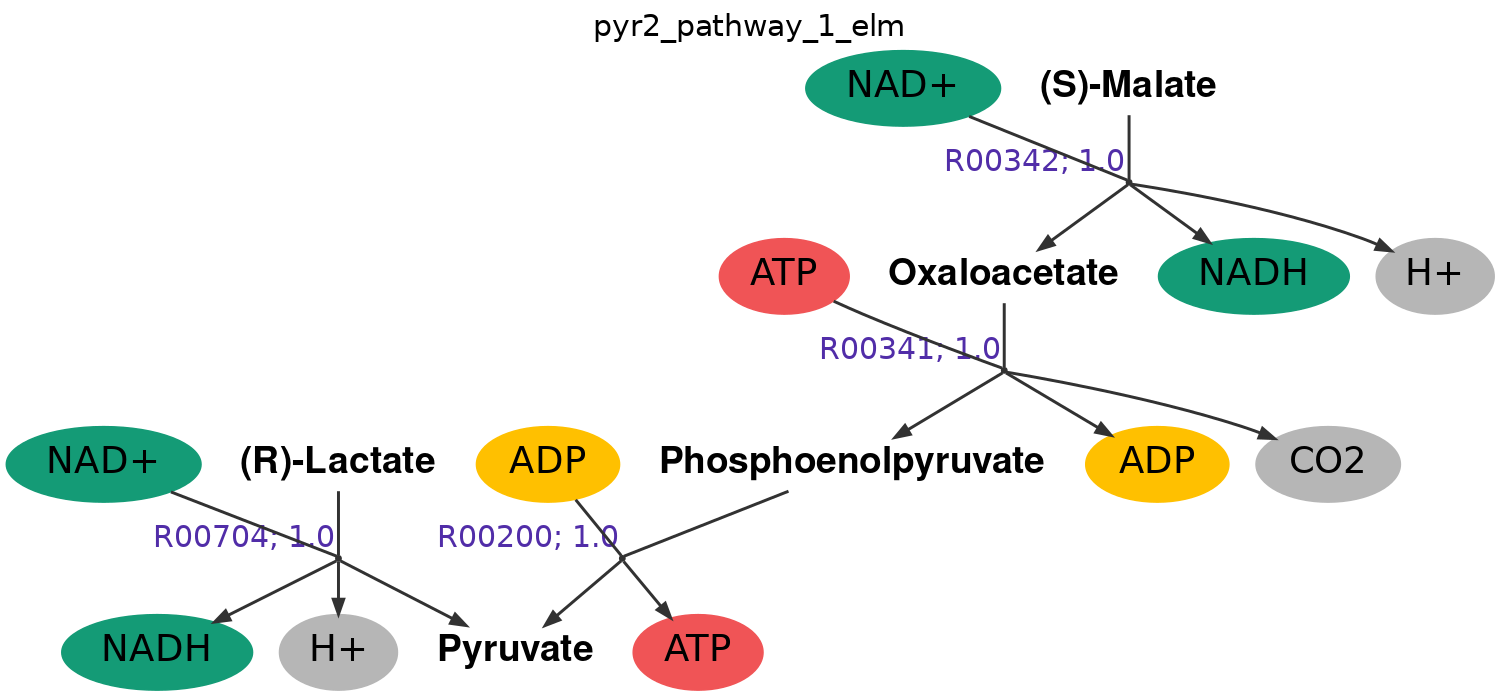

In [5]:
pyr_paths = pd.read_json(r'./pyr_case_study/enzymeload_sol.json')

pyr_path1 = Pathway(name='pyr2_pathway_1_elm',
                    reaction_ids=list(pyr_paths[1]['pathway'].keys()),
                    fluxes=list(pyr_paths[1]['pathway'].values()))

# Create a png image
figure_filename1 = 'pyr2_pathway_1_elm'
figure_ext1 = "png"

g = draw_pathway(
    pyr_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

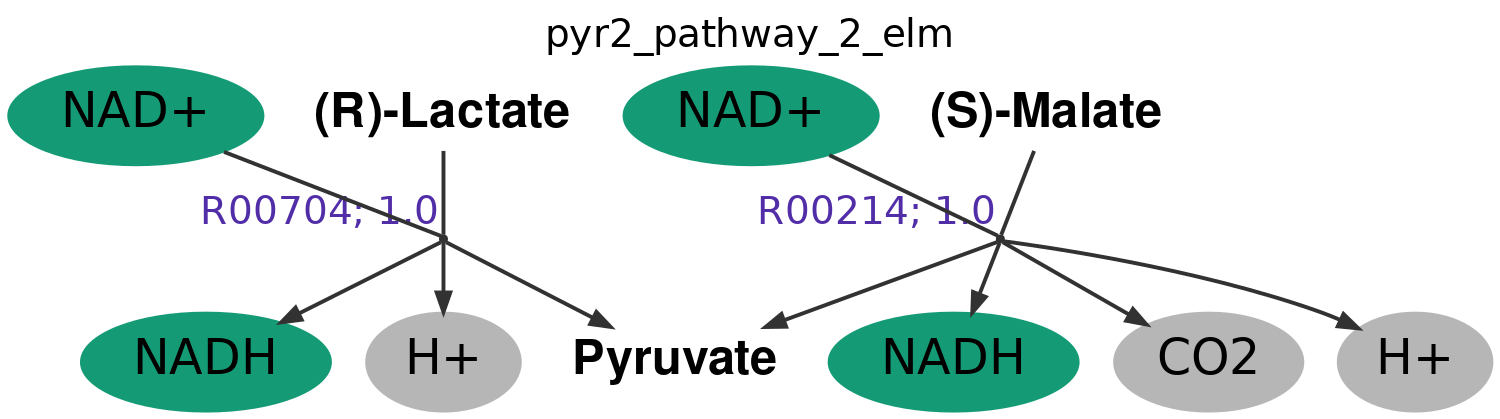

In [6]:
pyr_path2 = Pathway(name='pyr2_pathway_2_elm',
                    reaction_ids=list(pyr_paths[2]['pathway'].keys()),
                    fluxes=list(pyr_paths[2]['pathway'].values()))

# Create a png image
figure_filename2 = 'pyr2_pathway_2_elm'
figure_ext1 = "png"

g = draw_pathway(
    pyr_path2, 
    imageFileName=figure_filename2, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path2.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename2 + "." + figure_ext1)

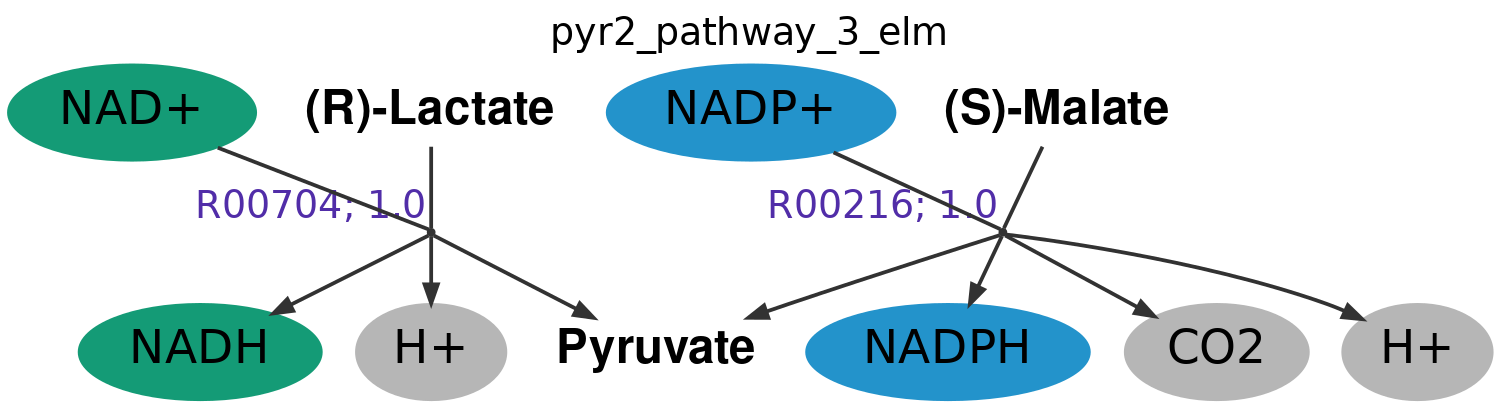

In [7]:
pyr_path3 = Pathway(name='pyr2_pathway_3_elm',
                    reaction_ids=list(pyr_paths[3]['pathway'].keys()),
                    fluxes=list(pyr_paths[3]['pathway'].values()))

# Create a png image
figure_filename3 = 'pyr2_pathway_3_elm'
figure_ext1 = "png"

g = draw_pathway(
    pyr_path3, 
    imageFileName=figure_filename3, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path3.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename3 + "." + figure_ext1)

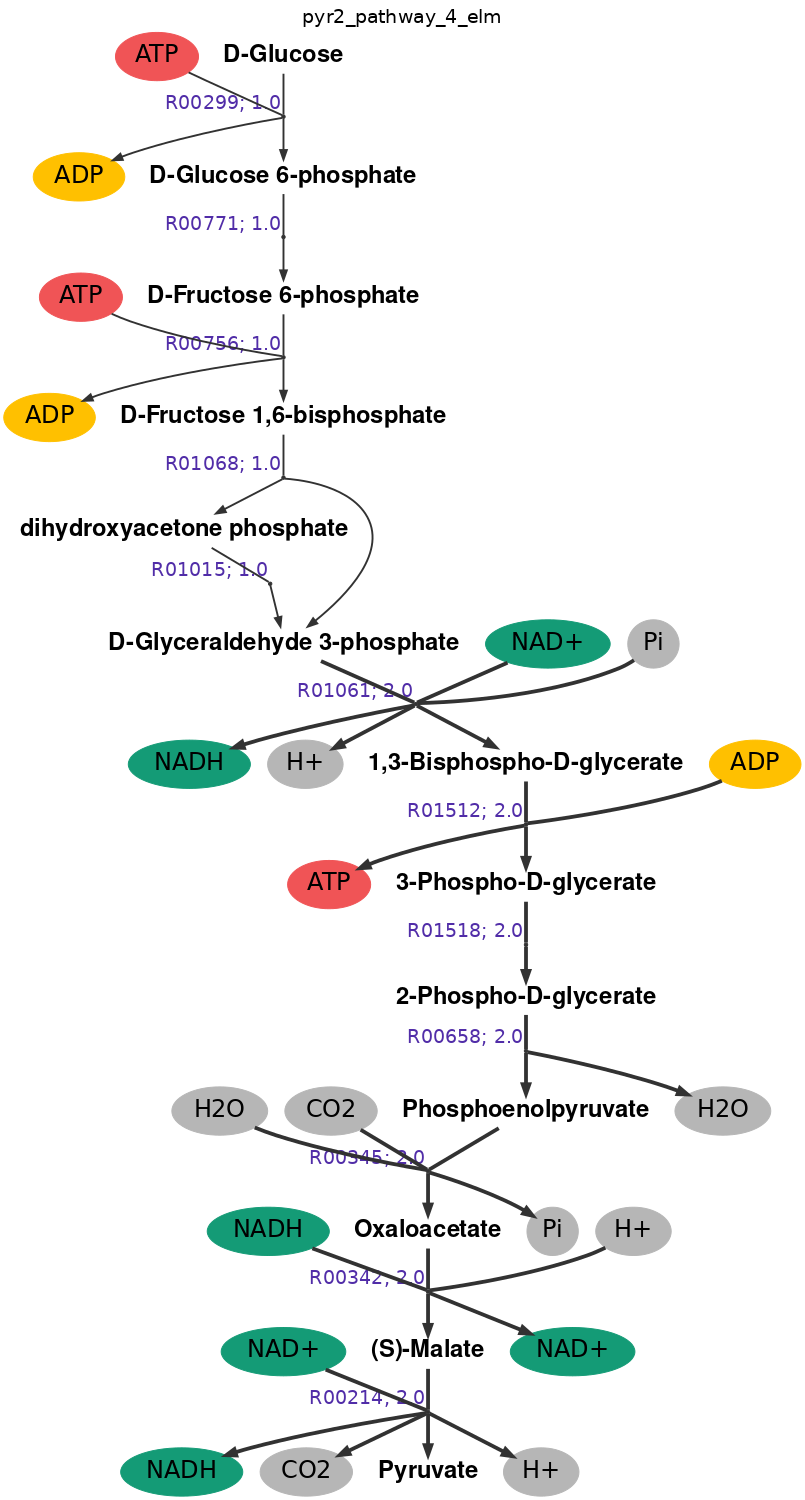

In [8]:
pyr_path4 = Pathway(name='pyr2_pathway_4_elm',
                    reaction_ids=list(pyr_paths[4]['pathway'].keys()),
                    fluxes=list(pyr_paths[4]['pathway'].values()))

# Create a png image
figure_filename4 = 'pyr2_pathway_4_elm'
figure_ext1 = "png"

g = draw_pathway(
    pyr_path4, 
    imageFileName=figure_filename4, 
    imageFormat=figure_ext1, 
    graphTitle=pyr_path4.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename4 + "." + figure_ext1)

# Probar caso de estudio g3p en universal db

In [2]:
user_defined_export_rxns_Sji={
    'EX_glc': {'C00031': -1.0},
    'EX_g3p': {'C00118':-1.0},
    'EX_atp': {'C00002': -1.0},
    'EX_adp': {'C00008': -1.0},
    'EX_nadp': {'C00006': -1.0},
    'EX_nadph': {'C00005': -1.0},
    'EX_hplus': {'C00080': -1.0},
    'EX_h2o': {'C00001': -1.0},
    'EX_co2': {'C00011': -1.0}
    #'EX_phosphate': {'C00009': -1.0}
    } 

specific_bounds = {'EX_glc': {'LB': -1, 'UB': -1},
                   'EX_g3p': {'LB': 1, 'UB': 2},
                   'EX_atp':{'LB': -1, 'UB': 1},
                   'EX_adp': {'LB': -1, 'UB': 1},
                   'EX_nadp': {'LB': -2, 'UB': 2},
                   'EX_nadph': {'LB': -2, 'UB': 2},
                   'EX_hplus': {'LB': -2, 'UB': 2},
                   'EX_h2o': {'LB': -1, 'UB': 1},
                   'EX_co2': {'LB': -1, 'UB': 1}
                
                }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db3 =load_db_v3(user_defined_export_rxns_Sji)

2021-04-13 11:04:53 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-04-13 11:04:53 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-04-13 11:04:53 core.Database DEBUG    Reading S matrix from JSON...
2021-04-13 11:05:01 core.Database DEBUG    Reading reaction type file...
2021-04-13 11:05:01 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-04-13 11:05:01 core.Database INFO     Validating database
2021-04-13 11:05:01 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-04-13 11:05:01 core.Database DEBUG    Reaction R08505 removed from the database.
2021-04-13 11:05:01 core.Database DEBUG    Reaction R07882 removed from the database.
2021-04-13 11:05:01 core.Database DEBUG    Reaction R07885 removed from the database.
2021-04-13 11:05:01 core.Database DEBUG    Reaction R08859 removed from the database.
2021-04-13 11:05:01 core.Database DEBUG    Reaction R01000 removed from the database.
2021-0

2021-04-13 11:05:02 core.Database DEBUG    Reaction R02587 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R00723 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R10351 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05443 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08319 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05447 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R00129 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05448 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04758 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04756 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R09252 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R0

2021-04-13 11:05:02 core.Database DEBUG    Reaction R03577 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R03576 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08080 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08081 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08082 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08083 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07509 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07058 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08087 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08088 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07057 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R0

2021-04-13 11:05:02 core.Database DEBUG    Reaction R03329 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R09908 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07264 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07267 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07260 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07263 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07262 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07269 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07268 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R01732 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R03395 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R0

2021-04-13 11:05:02 core.Database DEBUG    Reaction R03231 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R09630 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R09632 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04868 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04714 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04715 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04716 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R09633 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04711 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04713 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R01562 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R1

2021-04-13 11:05:02 core.Database DEBUG    Reaction R03827 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R03823 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R03820 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R02994 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R02995 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R02998 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R02999 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R10858 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R02132 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R02666 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R02667 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R0

2021-04-13 11:05:02 core.Database DEBUG    Reaction R05855 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05856 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05857 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05858 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R00827 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05676 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05677 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05672 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05673 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R09771 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R09770 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R0

2021-04-13 11:05:02 core.Database DEBUG    Reaction R00048 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R09074 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R10606 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R10605 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R10609 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R10608 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05335 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05442 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05441 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05331 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R05330 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R0

2021-04-13 11:05:02 core.Database DEBUG    Reaction R08002 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08003 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08005 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08006 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R08007 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R04247 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R07416 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R06366 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R03782 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R03780 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R03781 removed from the database.
2021-04-13 11:05:02 core.Database DEBUG    Reaction R0

2021-04-13 11:05:03 core.Database DEBUG    Reaction R03881 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03880 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05766 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05764 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05765 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05762 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05763 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05760 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05761 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05769 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R10346 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R1

2021-04-13 11:05:03 core.Database DEBUG    Reaction R06449 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R06119 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R02356 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R02354 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R02355 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R02358 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R02359 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01460 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01463 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R10921 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09537 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R0

2021-04-13 11:05:03 core.Database DEBUG    Reaction R05171 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05170 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09498 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R00989 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R00983 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R00984 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01583 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01586 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01587 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01584 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01585 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R0

2021-04-13 11:05:03 core.Database DEBUG    Reaction R10560 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09642 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05729 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05722 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05720 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05721 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05727 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R10940 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R02970 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R02974 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R02975 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R0

2021-04-13 11:05:03 core.Database DEBUG    Reaction R08434 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08439 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07289 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07281 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07280 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07287 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07869 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07868 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07867 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07866 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07865 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R0

2021-04-13 11:05:03 core.Database DEBUG    Reaction R06879 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08616 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R06878 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07132 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01091 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R01099 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03943 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03945 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05397 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05394 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R05392 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R0

2021-04-13 11:05:03 core.Database DEBUG    Reaction R08353 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07658 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07659 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08356 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08357 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07122 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07652 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03728 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09275 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03725 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03726 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R0

2021-04-13 11:05:03 core.Database DEBUG    Reaction R05215 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03816 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R04265 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R04266 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03812 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R10956 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09173 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09172 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09171 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09170 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R09177 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R0

2021-04-13 11:05:03 core.Database DEBUG    Reaction R03680 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03686 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03685 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R03689 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R10270 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08819 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08818 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08817 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08816 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R07375 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R08814 removed from the database.
2021-04-13 11:05:03 core.Database DEBUG    Reaction R0

2021-04-13 11:05:04 core.Database DEBUG    Reaction R07100 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03094 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03095 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03092 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03090 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07513 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R08330 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03098 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R08623 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R08336 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R08337 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R0

2021-04-13 11:05:04 core.Database DEBUG    Reaction R09591 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R04784 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R09595 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10012 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10013 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10010 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R09596 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R04565 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06387 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06386 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07366 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R0

2021-04-13 11:05:04 core.Database DEBUG    Reaction R07330 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07337 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07884 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07887 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07886 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07889 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07888 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R07339 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R08858 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06684 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06685 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R0

2021-04-13 11:05:04 core.Database DEBUG    Reaction R10201 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10200 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10207 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R05599 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R05598 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R05592 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06866 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10736 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03562 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03563 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03560 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R0

2021-04-13 11:05:04 core.Database DEBUG    Reaction R05431 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R09314 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R05438 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R05439 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10102 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10103 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R09649 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R09648 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10416 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10417 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R10414 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R1

2021-04-13 11:05:04 core.Database DEBUG    Reaction R08545 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R08547 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R08546 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R02633 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R02632 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06399 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06392 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06393 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06390 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06391 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06394 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R0

2021-04-13 11:05:04 core.Database DEBUG    Reaction R06820 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R06821 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R11114 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R11115 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R11116 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R11117 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R11113 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R11118 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R11119 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03831 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R03834 removed from the database.
2021-04-13 11:05:04 core.Database DEBUG    Reaction R0

2021-04-13 11:05:05 core.Database DEBUG    Reaction R10457 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R10454 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07981 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R00563 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R00562 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R10099 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07454 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07728 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07729 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08919 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07720 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R0

2021-04-13 11:05:05 core.Database DEBUG    Reaction R05322 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05323 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05321 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05357 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05459 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05328 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05356 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R06980 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05355 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04581 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04580 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R0

2021-04-13 11:05:05 core.Database DEBUG    Reaction R04876 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08312 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04870 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R01689 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R01683 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R01686 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07979 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07978 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07977 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R03268 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R03261 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R0

2021-04-13 11:05:05 core.Database DEBUG    Reaction R05826 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R03097 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R00814 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R00810 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04153 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04150 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04151 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04154 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04158 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R03091 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R03899 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R0

2021-04-13 11:05:05 core.Database DEBUG    Reaction R04172 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08951 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R09789 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R09781 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R09782 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R09783 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R09785 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05775 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05776 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05771 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R05778 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R1

2021-04-13 11:05:05 core.Database DEBUG    Reaction R03421 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04346 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04344 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R04438 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08448 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08449 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08199 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08192 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08190 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08191 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08196 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R0

2021-04-13 11:05:05 core.Database DEBUG    Reaction R07996 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07995 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07993 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07992 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07990 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08304 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07449 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R03284 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R03283 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R08658 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R07440 removed from the database.
2021-04-13 11:05:05 core.Database DEBUG    Reaction R0

2021-04-13 11:05:06 core.Database DEBUG    Reaction R06476 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R06475 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R06474 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07870 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07871 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07872 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07873 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07874 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07875 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07876 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07877 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R0

2021-04-13 11:05:06 core.Database DEBUG    Reaction R03971 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R03970 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09687 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10148 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10140 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10141 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10142 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R04387 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R04383 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R04382 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R04388 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R0

2021-04-13 11:05:06 core.Database DEBUG    Reaction R06357 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R06606 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R06355 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07489 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07488 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07484 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07487 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07481 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07483 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09566 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09567 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R0

2021-04-13 11:05:06 core.Database DEBUG    Reaction R09465 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05083 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05087 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05086 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09464 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R02271 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R02272 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10533 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10536 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10539 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05266 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R0

2021-04-13 11:05:06 core.Database DEBUG    Reaction R04618 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R01205 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R01203 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R01202 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09399 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09398 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09392 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09391 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09390 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09397 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09396 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R0

2021-04-13 11:05:06 core.Database DEBUG    Reaction R08636 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R08634 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R08631 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07110 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R06572 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R06573 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R02408 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R00664 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R00666 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R00660 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R00668 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R0

2021-04-13 11:05:06 core.Database DEBUG    Reaction R02232 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R02237 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05223 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05222 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05220 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05225 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09216 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09217 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05229 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05228 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09212 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R0

2021-04-13 11:05:06 core.Database DEBUG    Reaction R09688 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R08036 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R07501 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05564 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05565 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05566 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05567 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05560 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05561 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05562 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R05563 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R1

2021-04-13 11:05:06 core.Database DEBUG    Reaction R04515 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10322 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10895 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09341 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R08255 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10898 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10899 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09342 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R10435 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R08254 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R09343 removed from the database.
2021-04-13 11:05:06 core.Database DEBUG    Reaction R1

2021-04-13 11:05:10 core.Database DEBUG    Reaction R00303 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00322 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00488 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00522 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R02817 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00487 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R01573 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R06515 has been updated from Forward irreversible to Forwar

2021-04-13 11:05:10 core.Database ERROR    Reaction R00830 not in database!
2021-04-13 11:05:10 core.Database DEBUG    Reaction R01200 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R07302 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00575 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database ERROR    Reaction R00918 not in database!
2021-04-13 11:05:10 core.Database DEBUG    Reaction R09805 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R04780 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00473 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00130 has been updated from Forwa

2021-04-13 11:05:10 core.Database DEBUG    Reaction R00519 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R06974 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R06973 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R01980 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00299 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R01902 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R09279 has been updated from Forward irreversible to Forward irreversible.
2021-04-13 11:05:10 core.Database DEBUG    Reaction R00458 has been updated from Forward irreversible to Forwar

In [3]:
# minflux
g3p_case_study = optstoic.OptStoic(database=db3,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=6,
                    pulp_solver=pulp_solver,
                    result_filepath='./g3p_case_study/',
                    M=1000)

g3p_lp_problem, g3p_pathways_opts = g3p_case_study.solve(outputfile='minflux_sol_optstoic_db.json',
                                              max_iteration=g3p_case_study.max_iteration)

2021-04-13 11:05:19 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-04-13 11:05:19 optstoic.OptStoic INFO     Formulating problem...
2021-04-13 11:05:20 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-04-13 11:05:20 optstoic.OptStoic INFO     Solving problem...
2021-04-13 11:05:20 optstoic.OptStoic INFO     Iteration 1
2021-04-13 11:05:23 optstoic.OptStoic INFO     This iteration solved in 3.209 seconds.
2021-04-13 11:05:23 optstoic.OptStoic INFO     Writing result to output file...


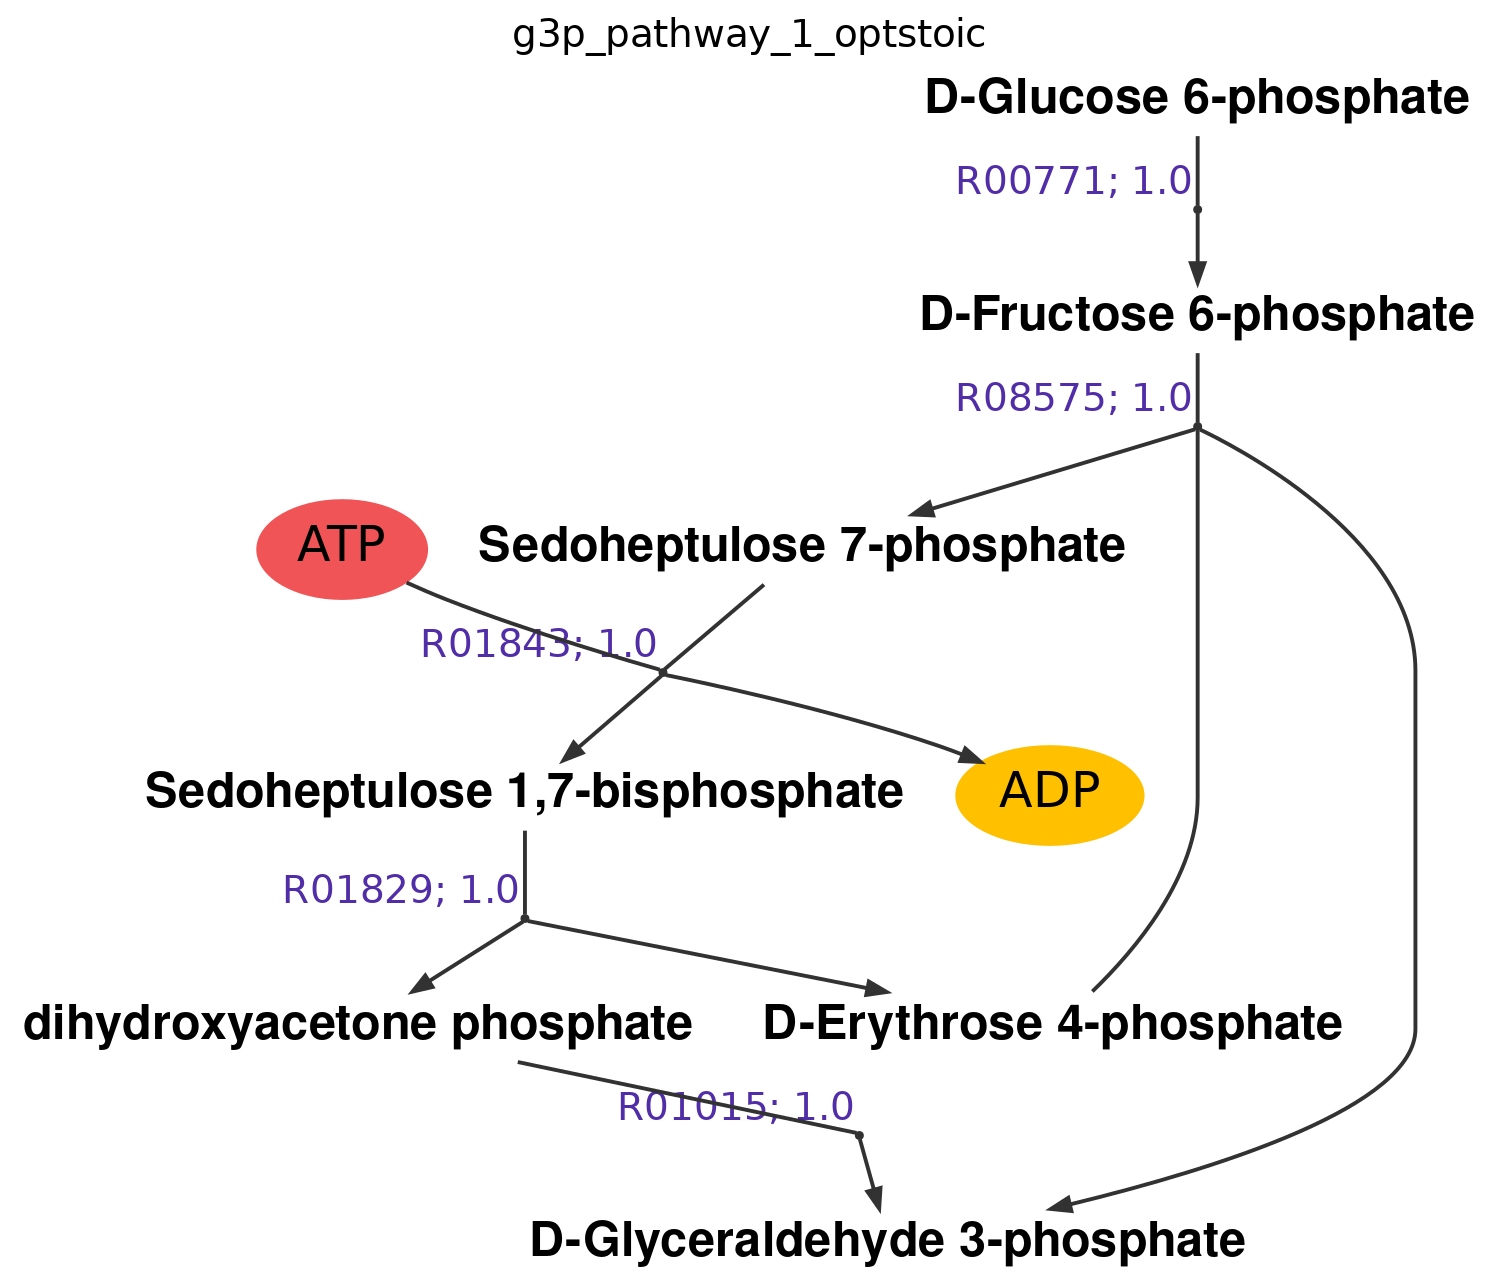

In [17]:
g3p_paths = pd.read_json(r'./g3p_case_study/minflux_sol_optstoic_db.json')

g3p_path1 = Pathway(name='g3p_pathway_1_optstoic',
                    reaction_ids=list(g3p_paths[2]['pathway'].keys()),
                    fluxes=list(g3p_paths[2]['pathway'].values()))

# Create a png image
figure_filename1 = 'g3p_pathway_1_optstoic'
figure_ext1 = "png"

g = draw_pathway(
    g3p_path1, 
    imageFileName=figure_filename1, 
    imageFormat=figure_ext1, 
    graphTitle=g3p_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename1 + "." + figure_ext1)

In [ ]:
#enzymeload
g3p_case_study_elm = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=6,
                    pulp_solver=pulp_solver,
                    result_filepath='./g3p_case_study/',
                    M=1000)

g3p_lp_problem, g3p_pathways, enzyme_loads = g3p_case_study.solve(outputfile='enzymeload_sol_optstoic_db.json',
                                              max_iteration=g3p_case_study_elm.max_iteration)

# Probar con ecolicore (F6P-> F1,6P)

1 rxn, con gasto de ATP

funciona solo si cambio la db (duh)

**edit: las reacciones que yo incorporé en el e coli core como análogas a la PFK están mal el verdadero id de esta reacción en kegg es R00756, ahora si funciona :)**

In [2]:
user_defined_export_rxns_Sji={
            'EX_f6p': {'C00085': -1.0},
            'EX_f1-6p':{'C00354' : -1.0},
            'EX_adp': {'C00008': -1.0},
            'EX_atp': {'C00002': -1.0}
        }

# 3. Create a specific_bounds dictionary for the upper and lower bound to the exchange flux.

specific_bounds = {'EX_f6p': {'LB': -1, 'UB': -1},
                       'EX_f1-6p': {'LB': 1, 'UB': 1},
                       'EX_adp': {'LB': 1, 'UB': 1},
                       'EX_atp': {'LB': -1, 'UB': -1}}

# 4. Setup your custom constraints for the pathway.
#v('EX_nadph') + v('EX_nadh') = 2;
#v('EX_nadp') + v('EX_nad') = -2;
#v('EX_nadh') + v('EX_nad') = 0;
#v('EX_nadph') + v('EX_nadp') = 0;
# can be written as:
custom_flux_constraints = [{'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},{'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},{'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},{'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

2021-03-31 17:24:36 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-03-31 17:24:36 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-03-31 17:24:36 core.Database DEBUG    Reading S matrix from JSON...
2021-03-31 17:24:36 core.Database DEBUG    Reading reaction type file...
2021-03-31 17:24:36 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-03-31 17:24:36 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-03-31 17:24:36 core.Database INFO     Validating database
2021-03-31 17:24:36 core.Database INFO     Validating database
2021-03-31 17:24:36 core.Database ERROR    Reaction R01140 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00948 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R07641 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00943 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R09599 not in dat

2021-03-31 17:24:36 core.Database ERROR    Reaction R02563 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00910 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00911 not in database!
2021-03-31 17:24:36 core.Database DEBUG    Reaction R00086 has been updated from Forward irreversible to Forward irreversible.
2021-03-31 17:24:36 core.Database ERROR    Reaction R00706 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00705 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00856 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00855 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R01357 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R01526 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R01059 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R01523 not in database!
2021-03-31 17:24:36 core.Database DEB

2021-03-31 17:24:36 core.Database DEBUG    Reaction R00200 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-03-31 17:24:36 core.Database ERROR    Reaction R09286 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R02378 not in database!
2021-03-31 17:24:36 core.Database DEBUG    Reaction R00472 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-03-31 17:24:36 core.Database ERROR    Reaction R00724 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00430 not in database!
2021-03-31 17:24:36 core.Database ERROR    Reaction R00572 not in database!
2021-03-31 17:24:36 core.Database INFO     Validating database


In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

2021-03-31 17:24:37 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-03-31 17:24:37 optstoic.OptStoic INFO     Formulating problem...
2021-03-31 17:24:37 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-31 17:24:37 optstoic.OptStoic INFO     Solving problem...
2021-03-31 17:24:37 optstoic.OptStoic INFO     Iteration 1
2021-03-31 17:24:37 optstoic.OptStoic INFO     This iteration solved in 0.049 seconds.
2021-03-31 17:24:37 optstoic.OptStoic INFO     Writing result to output file...


In [6]:
ecoli_pathways[2].reaction_ids

['EX_adp', 'EX_atp', 'EX_f1-6p', 'EX_f6p', 'R00341', 'R00345', 'R00762']

# Probar con ecolicore (G6P -> F6P) 

1 reacción, sin gasto de ATP o cofactores

FUNCIONAAAAAAAAAAAAAAAAAA

In [2]:
user_defined_export_rxns_Sji={
            'EX_g6p':{'C00092' : -1.0},
            'EX_f6p': {'C00085': -1.0}
        }

# 3. Create a specific_bounds dictionary for the upper and lower bound to the exchange flux.

specific_bounds = {'EX_f6p': {'LB': 1, 'UB': 1},
                   'EX_g6p': {'LB':-1, 'UB': -1}}
                       

# 4. Setup your custom constraints for the pathway.
#v('EX_nadph') + v('EX_nadh') = 2;
#v('EX_nadp') + v('EX_nad') = -2;
#v('EX_nadh') + v('EX_nad') = 0;
#v('EX_nadph') + v('EX_nadp') = 0;
# can be written as:
custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

2021-03-12 12:24:15 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-03-12 12:24:15 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-03-12 12:24:15 core.Database DEBUG    Reading S matrix from JSON...
2021-03-12 12:24:15 core.Database DEBUG    Reading reaction type file...
2021-03-12 12:24:15 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-03-12 12:24:15 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-03-12 12:24:15 core.Database INFO     Validating database
2021-03-12 12:24:15 core.Database INFO     Validating database
2021-03-12 12:24:15 core.Database ERROR    Reaction R01140 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00948 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R07641 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00943 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R09599 not in dat

2021-03-12 12:24:15 core.Database ERROR    Reaction R02563 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00910 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00911 not in database!
2021-03-12 12:24:15 core.Database DEBUG    Reaction R00086 has been updated from Forward irreversible to Forward irreversible.
2021-03-12 12:24:15 core.Database ERROR    Reaction R00706 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00705 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00856 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00855 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R01357 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R01526 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R01059 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R01523 not in database!
2021-03-12 12:24:15 core.Database DEB

2021-03-12 12:24:15 core.Database ERROR    Reaction R09286 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R02378 not in database!
2021-03-12 12:24:15 core.Database DEBUG    Reaction R00472 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-03-12 12:24:15 core.Database ERROR    Reaction R00724 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00430 not in database!
2021-03-12 12:24:15 core.Database ERROR    Reaction R00572 not in database!
2021-03-12 12:24:15 core.Database INFO     Validating database


### Test MinFlux

In [ ]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

### Test EnzymeLoad

In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

2021-03-12 12:24:16 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic EnzymeLoad...
2021-03-12 12:24:16 optstoic.OptStoic INFO     Formulating problem...
2021-03-12 12:24:16 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-12 12:24:16 optstoic.OptStoic INFO     Solving problem...
2021-03-12 12:24:16 optstoic.OptStoic INFO     Iteration 1
2021-03-12 12:24:17 optstoic.OptStoic INFO     This iteration solved in 0.066 seconds.
2021-03-12 12:24:17 optstoic.OptStoic INFO     Writing result to output file...


# Probar ecolicore (PGM/R01518)

3 fosfo glicerato -> 2 fosfoglicerato

glicólisis, sin ATP/NADH, etc

FUNCIONAAAAAA 

In [2]:
user_defined_export_rxns_Sji={
            'EX_3pg':{'C00197' : -1.0},
            'EX_2pg': {'C00631': -1.0}
        }

# 3. Create a specific_bounds dictionary for the upper and lower bound to the exchange flux.

specific_bounds = {'EX_3pg': {'LB': -1, 'UB': -1},
                   'EX_2pg': {'LB':1, 'UB': 1}}
                       

# 4. Setup your custom constraints for the pathway.
#v('EX_nadph') + v('EX_nadh') = 2;
#v('EX_nadp') + v('EX_nad') = -2;
#v('EX_nadh') + v('EX_nad') = 0;
#v('EX_nadph') + v('EX_nadp') = 0;
# can be written as:
custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

2021-03-12 15:55:08 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-03-12 15:55:08 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-03-12 15:55:08 core.Database DEBUG    Reading S matrix from JSON...
2021-03-12 15:55:09 core.Database DEBUG    Reading reaction type file...
2021-03-12 15:55:09 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-03-12 15:55:09 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-03-12 15:55:09 core.Database INFO     Validating database
2021-03-12 15:55:09 core.Database INFO     Validating database
2021-03-12 15:55:09 core.Database ERROR    Reaction R01140 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00948 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R07641 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00943 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R09599 not in dat

2021-03-12 15:55:09 core.Database ERROR    Reaction R02563 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00910 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00911 not in database!
2021-03-12 15:55:09 core.Database DEBUG    Reaction R00086 has been updated from Forward irreversible to Forward irreversible.
2021-03-12 15:55:09 core.Database ERROR    Reaction R00706 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00705 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00856 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00855 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R01357 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R01526 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R01059 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R01523 not in database!
2021-03-12 15:55:09 core.Database DEB

2021-03-12 15:55:09 core.Database ERROR    Reaction R09286 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R02378 not in database!
2021-03-12 15:55:09 core.Database DEBUG    Reaction R00472 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-03-12 15:55:09 core.Database ERROR    Reaction R00724 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00430 not in database!
2021-03-12 15:55:09 core.Database ERROR    Reaction R00572 not in database!
2021-03-12 15:55:09 core.Database INFO     Validating database


### Test Minflux

In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

2021-03-12 15:55:10 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-03-12 15:55:10 optstoic.OptStoic INFO     Formulating problem...
2021-03-12 15:55:10 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-12 15:55:10 optstoic.OptStoic INFO     Solving problem...
2021-03-12 15:55:10 optstoic.OptStoic INFO     Iteration 1
2021-03-12 15:55:11 optstoic.OptStoic INFO     This iteration solved in 0.101 seconds.
2021-03-12 15:55:11 optstoic.OptStoic INFO     Writing result to output file...


### Test EnzymeLoad

In [4]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

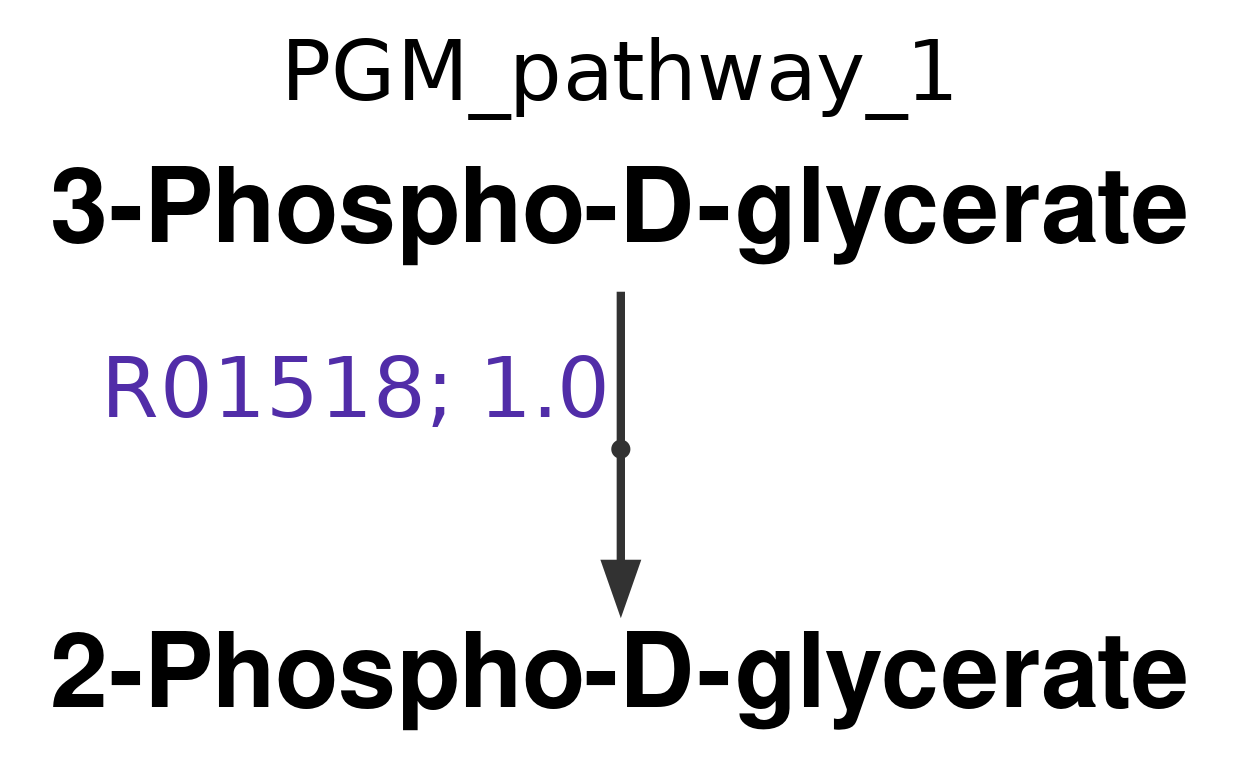

In [6]:
PGM_paths = pd.read_json(r'./result/temp_pathways.json')

PGM_path1 = Pathway(name='PGM_pathway_1',
                    reaction_ids=list(PGM_paths[1]['pathway'].keys()),
                    fluxes=list(PGM_paths[1]['pathway'].values()))

# Create a png image
figure_filename = 'PGM_pathway_1'
figure_ext = "png"

g = draw_pathway(
    PGM_path1, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=PGM_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)

# Probar ecolicore (PGM + ENO/ R01518 + R00658)

3 fosfo glicerato -> 2 fosfoglicerato -> fosfoenolpiruvato + agua

glicólisis, sin ATP/NADH, etc, 2 reacciones 3 metabolitos

minflux funciona solo si lo pongo en sentido contrario (A <- B <- C)

enzymeLoad funciona en ambos sentidos 

In [2]:
user_defined_export_rxns_Sji={
            'EX_3pg':{'C00197' : -1.0},
            'EX_pep': {'C00074': -1.0},
            'EX_h2o': {'C00001': -1.0}
        }

# 3. Create a specific_bounds dictionary for the upper and lower bound to the exchange flux.

specific_bounds = {'EX_3pg': {'LB': -1, 'UB': -1},
                   'EX_pep': {'LB':1, 'UB': 1},
                   'EX_h2o': {'LB':1, 'UB': 1}
                  }
                       

# 4. Setup your custom constraints for the pathway.
#v('EX_nadph') + v('EX_nadh') = 2;
#v('EX_nadp') + v('EX_nad') = -2;
#v('EX_nadh') + v('EX_nad') = 0;
#v('EX_nadph') + v('EX_nadp') = 0;
# can be written as:
custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

2021-03-12 16:18:54 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-03-12 16:18:54 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-03-12 16:18:54 core.Database DEBUG    Reading S matrix from JSON...
2021-03-12 16:18:54 core.Database DEBUG    Reading reaction type file...
2021-03-12 16:18:54 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-03-12 16:18:54 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-03-12 16:18:54 core.Database INFO     Validating database
2021-03-12 16:18:54 core.Database INFO     Validating database
2021-03-12 16:18:54 core.Database ERROR    Reaction R01140 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00948 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R07641 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00943 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R09599 not in dat

2021-03-12 16:18:54 core.Database ERROR    Reaction R02563 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00910 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00911 not in database!
2021-03-12 16:18:54 core.Database DEBUG    Reaction R00086 has been updated from Forward irreversible to Forward irreversible.
2021-03-12 16:18:54 core.Database ERROR    Reaction R00706 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00705 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00856 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00855 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R01357 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R01526 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R01059 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R01523 not in database!
2021-03-12 16:18:54 core.Database DEB

2021-03-12 16:18:54 core.Database ERROR    Reaction R09286 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R02378 not in database!
2021-03-12 16:18:54 core.Database DEBUG    Reaction R00472 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-03-12 16:18:54 core.Database ERROR    Reaction R00724 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00430 not in database!
2021-03-12 16:18:54 core.Database ERROR    Reaction R00572 not in database!
2021-03-12 16:18:54 core.Database INFO     Validating database


### Test MinFlux

In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

2021-03-12 16:15:36 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-03-12 16:15:36 optstoic.OptStoic INFO     Formulating problem...
2021-03-12 16:15:36 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-12 16:15:36 optstoic.OptStoic INFO     Solving problem...
2021-03-12 16:15:36 optstoic.OptStoic INFO     Iteration 1
2021-03-12 16:15:36 optstoic.OptStoic INFO     This iteration solved in 0.100 seconds.
2021-03-12 16:15:36 optstoic.OptStoic INFO     Writing result to output file...


In [4]:
ecoli_pathways

{1: <OptStoicPathway(id='1', numRxn='5', nATP='None')>}

### Test EnzymeLoad

In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

2021-03-12 16:18:56 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic EnzymeLoad...
2021-03-12 16:18:56 optstoic.OptStoic INFO     Formulating problem...
2021-03-12 16:18:57 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-12 16:18:57 optstoic.OptStoic INFO     Solving problem...
2021-03-12 16:18:57 optstoic.OptStoic INFO     Iteration 1
2021-03-12 16:18:57 optstoic.OptStoic INFO     This iteration solved in 0.095 seconds.
2021-03-12 16:18:57 optstoic.OptStoic INFO     Writing result to output file...


In [4]:
ecoli_pathways

{1: <OptStoicPathway(id='1', numRxn='5', nATP='None')>,
 2: <OptStoicPathway(id='2', numRxn='5', nATP='None')>}

# Probar ecolicore (ACALD/R00228)

AcCoA + NADH + H+ -> NAD+ + CoA + Acald

rxn sin ATP con iones y transportador de electrones

FUNCIONAAAAA

In [2]:
user_defined_export_rxns_Sji={
            'EX_accoa':{'C00024' : -1.0},
            'EX_nadh': {'C00004': -1.0},
            'EX_hplus': {'C00080': -1.0},
            'EX_coa': {'C00010': -1.0},
            'EX_nad': {'C00003': -1.0},
            'EX_acald': {'C00084': -1.0}
        }

# 3. Create a specific_bounds dictionary for the upper and lower bound to the exchange flux.

specific_bounds = {'EX_accoa': {'LB': -1, 'UB': -1},
                   'EX_nadh': {'LB':-1, 'UB': -1},
                   'EX_hplus': {'LB':-1, 'UB': -1},
                   'EX_coa': {'LB': 1, 'UB': 1},
                   'EX_nad': {'LB':1, 'UB': 1},
                   'EX_acald': {'LB':1, 'UB': 1},
                  }
                       

# 4. Setup your custom constraints for the pathway.
#v('EX_nadph') + v('EX_nadh') = 2;
#v('EX_nadp') + v('EX_nad') = -2;
#v('EX_nadh') + v('EX_nad') = 0;
#v('EX_nadph') + v('EX_nadp') = 0;
# can be written as:
custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

2021-03-12 16:50:57 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-03-12 16:50:57 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-03-12 16:50:57 core.Database DEBUG    Reading S matrix from JSON...
2021-03-12 16:50:57 core.Database DEBUG    Reading reaction type file...
2021-03-12 16:50:57 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-03-12 16:50:57 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-03-12 16:50:57 core.Database INFO     Validating database
2021-03-12 16:50:57 core.Database INFO     Validating database
2021-03-12 16:50:57 core.Database ERROR    Reaction R01140 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00948 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R07641 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00943 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R09599 not in dat

2021-03-12 16:50:57 core.Database ERROR    Reaction R02563 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00910 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00911 not in database!
2021-03-12 16:50:57 core.Database DEBUG    Reaction R00086 has been updated from Forward irreversible to Forward irreversible.
2021-03-12 16:50:57 core.Database ERROR    Reaction R00706 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00705 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00856 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00855 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R01357 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R01526 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R01059 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R01523 not in database!
2021-03-12 16:50:57 core.Database DEB

2021-03-12 16:50:57 core.Database ERROR    Reaction R09286 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R02378 not in database!
2021-03-12 16:50:57 core.Database DEBUG    Reaction R00472 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-03-12 16:50:57 core.Database ERROR    Reaction R00724 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00430 not in database!
2021-03-12 16:50:57 core.Database ERROR    Reaction R00572 not in database!
2021-03-12 16:50:57 core.Database INFO     Validating database


### Test MinFlux

In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

2021-03-12 16:51:01 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-03-12 16:51:01 optstoic.OptStoic INFO     Formulating problem...
2021-03-12 16:51:01 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-12 16:51:01 optstoic.OptStoic INFO     Solving problem...
2021-03-12 16:51:01 optstoic.OptStoic INFO     Iteration 1
2021-03-12 16:51:02 optstoic.OptStoic INFO     This iteration solved in 0.105 seconds.
2021-03-12 16:51:02 optstoic.OptStoic INFO     Writing result to output file...


In [4]:
ecoli_pathways

{1: <OptStoicPathway(id='1', numRxn='7', nATP='None')>}

### Test EnzymeLoad

In [5]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

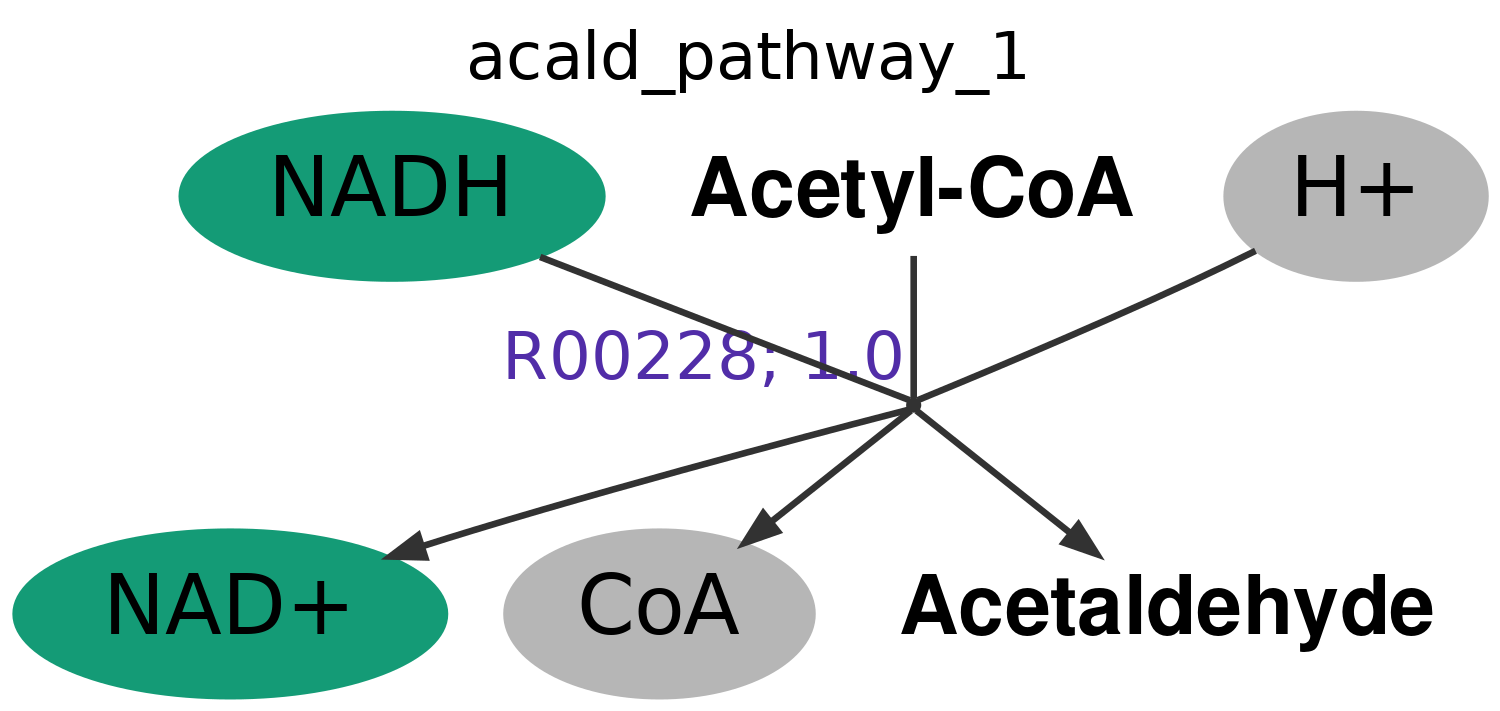

In [7]:
acald_paths = pd.read_json(r'./result/temp_pathways.json')

acald_path1 = Pathway(name='acald_pathway_1',
                    reaction_ids=list(acald_paths[1]['pathway'].keys()),
                    fluxes=list(acald_paths[1]['pathway'].values()))

# Create a png image
figure_filename = 'acald_pathway_1'
figure_ext = "png"

g = draw_pathway(
    acald_path1, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=acald_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)

# Probar ecolicore (SUCOAS/R00405)

succinato + CoA + ATP -> succinil-CoA + ADP + Pi  

FUNCIONAAAAAA

In [2]:
user_defined_export_rxns_Sji={
            'EX_atp': {'C00002': -1.0},
            'EX_coa': {'C00010': -1.0},
            'EX_succinate': {'C00042': -1.0},
            'EX_adp': {'C00008': -1.0},
            'EX_phosphate': {'C00009': -1.0},
            'EX_succinil-coa': {'C00091': -1.0}
            }

# 3. Create a specific_bounds dictionary for the upper and lower bound to the exchange flux.

specific_bounds = {'EX_atp': {'LB': -1, 'UB': -1},
                   'EX_coa': {'LB':-1, 'UB': -1},
                   'EX_succinate': {'LB': -1, 'UB': -1},
                   'EX_adp': {'LB':1, 'UB': 1},
                   'EX_phosphate': {'LB':1, 'UB': 1},
                   'EX_succinil-coa':{'LB':1, 'UB': 1}
                  }
                       

# 4. Setup your custom constraints for the pathway.
#v('EX_nadph') + v('EX_nadh') = 2;
#v('EX_nadp') + v('EX_nad') = -2;
#v('EX_nadh') + v('EX_nad') = 0;
#v('EX_nadph') + v('EX_nadp') = 0;
# can be written as:
custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': -10,
         'LB': 10},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': -10,
         'LB': 10}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_ecoli =load_db_v3_ecolicore(user_defined_export_rxns_Sji)

2021-03-12 16:55:29 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-03-12 16:55:29 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-03-12 16:55:29 core.Database DEBUG    Reading S matrix from JSON...
2021-03-12 16:55:29 core.Database DEBUG    Reading reaction type file...
2021-03-12 16:55:29 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-03-12 16:55:29 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-03-12 16:55:30 core.Database INFO     Validating database
2021-03-12 16:55:30 core.Database INFO     Validating database
2021-03-12 16:55:30 core.Database ERROR    Reaction R01140 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00948 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R07641 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00943 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R09599 not in dat

2021-03-12 16:55:30 core.Database ERROR    Reaction R02563 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00910 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00911 not in database!
2021-03-12 16:55:30 core.Database DEBUG    Reaction R00086 has been updated from Forward irreversible to Forward irreversible.
2021-03-12 16:55:30 core.Database ERROR    Reaction R00706 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00705 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00856 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00855 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R01357 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R01526 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R01059 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R01523 not in database!
2021-03-12 16:55:30 core.Database DEB

2021-03-12 16:55:30 core.Database ERROR    Reaction R09286 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R02378 not in database!
2021-03-12 16:55:30 core.Database DEBUG    Reaction R00472 has been updated from Reverse irreverisble to Reverse irreverisble.
2021-03-12 16:55:30 core.Database ERROR    Reaction R00724 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00430 not in database!
2021-03-12 16:55:30 core.Database ERROR    Reaction R00572 not in database!
2021-03-12 16:55:30 core.Database INFO     Validating database


### Test MinFlux

In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='MinFlux',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

2021-03-12 16:54:41 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic MinFlux...
2021-03-12 16:54:41 optstoic.OptStoic INFO     Formulating problem...
2021-03-12 16:54:41 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-12 16:54:41 optstoic.OptStoic INFO     Solving problem...
2021-03-12 16:54:41 optstoic.OptStoic INFO     Iteration 1
2021-03-12 16:54:41 optstoic.OptStoic INFO     This iteration solved in 0.082 seconds.
2021-03-12 16:54:41 optstoic.OptStoic INFO     Writing result to output file...


In [4]:
ecoli_pathways

{1: <OptStoicPathway(id='1', numRxn='7', nATP='-1.0')>}

### Test EnzymeLoad

In [3]:
ecoli_test = optstoic.OptStoic(database=db_ecoli,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

ecoli_lp_problem, ecoli_pathways = ecoli_test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=ecoli_test.max_iteration)

2021-03-12 16:55:34 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic EnzymeLoad...
2021-03-12 16:55:34 optstoic.OptStoic INFO     Formulating problem...
2021-03-12 16:55:35 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-03-12 16:55:35 optstoic.OptStoic INFO     Solving problem...
2021-03-12 16:55:35 optstoic.OptStoic INFO     Iteration 1
2021-03-12 16:55:35 optstoic.OptStoic INFO     This iteration solved in 0.085 seconds.
2021-03-12 16:55:35 optstoic.OptStoic INFO     Writing result to output file...


In [4]:
ecoli_pathways

{1: <OptStoicPathway(id='1', numRxn='7', nATP='-1.0')>,
 2: <OptStoicPathway(id='2', numRxn='7', nATP='-1.0')>}

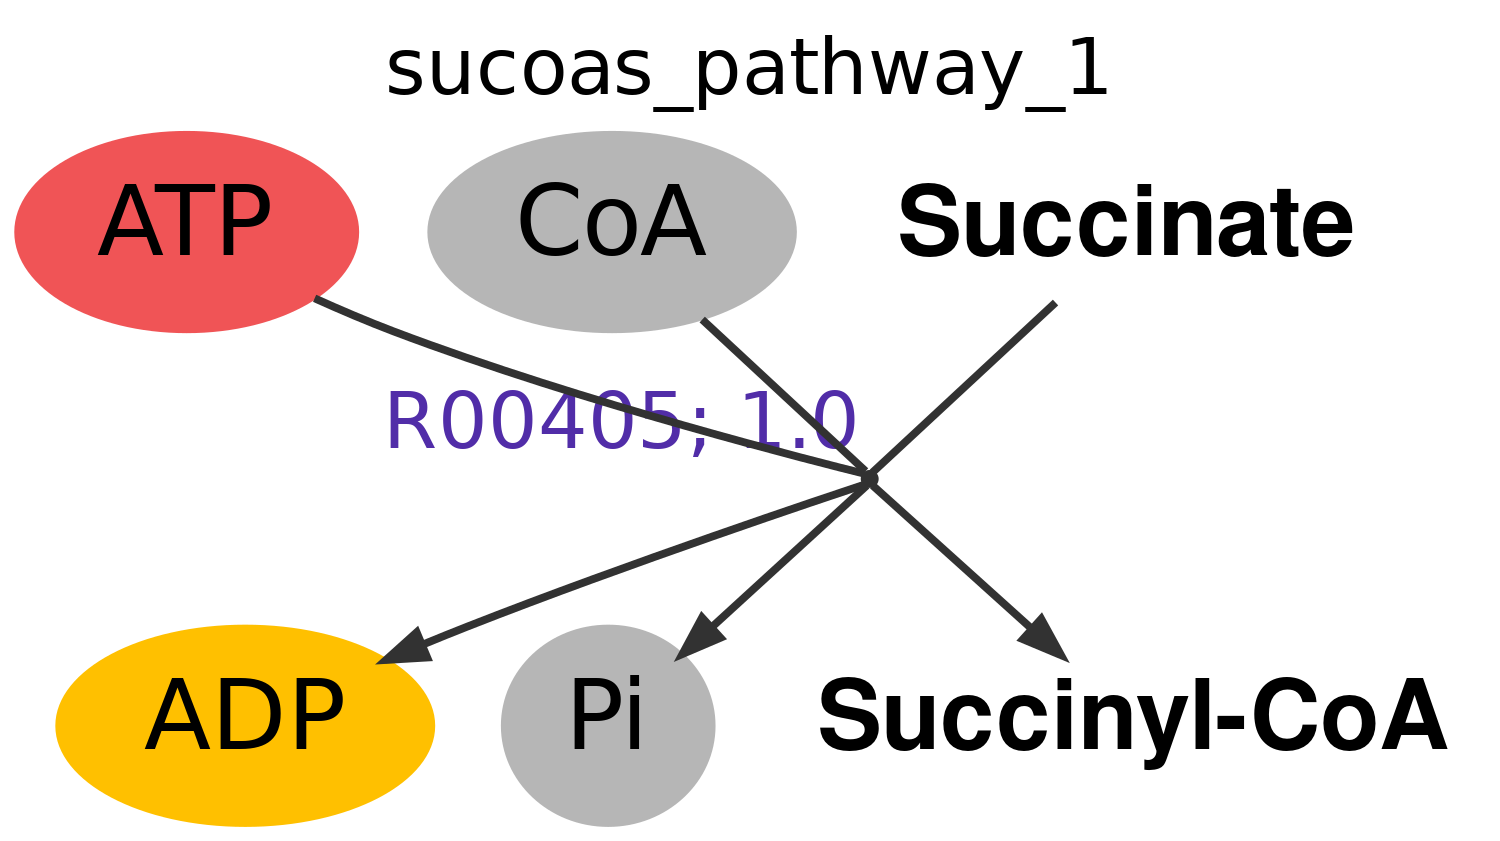

In [5]:
sucoas_paths = pd.read_json(r'./result/temp_pathways.json')

sucoas_path1 = Pathway(name='sucoas_pathway_1',
                    reaction_ids=list(sucoas_paths[1]['pathway'].keys()),
                    fluxes=list(sucoas_paths[1]['pathway'].values()))

# Create a png image
figure_filename = 'sucoas_pathway_1'
figure_ext = "png"

g = draw_pathway(
    sucoas_path1, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=sucoas_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)

# Toy model

In [2]:
user_defined_export_rxns_Sji={
            'EX_A': {'A': -1.0},
            'EX_F': {'F': -1.0}
            }

toy_model_specific_bounds = {'EX_A': {'LB': -1, 'UB': -1},
                             'EX_F': {'LB':1, 'UB': 1},
                              }

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db_toy_model =load_db_v3_toy_model(user_defined_export_rxns_Sji)

2021-04-05 12:44:29 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-04-05 12:44:29 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-04-05 12:44:29 core.Database DEBUG    Reading S matrix from JSON...
2021-04-05 12:44:29 core.Database DEBUG    Reading reaction type file...
2021-04-05 12:44:29 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-04-05 12:44:29 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-04-05 12:44:29 core.Database INFO     Validating database
2021-04-05 12:44:29 core.Database INFO     Validating database
2021-04-05 12:44:29 core.Database ERROR    Reaction R01140 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R00948 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R07641 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R00943 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R09599 not in dat

2021-04-05 12:44:29 core.Database ERROR    Reaction R00705 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R00856 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R00855 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R01357 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R01526 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R01059 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R01523 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R01528 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R00830 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R01200 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R07302 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R00575 not in database!
2021-04-05 12:44:29 core.Database ERROR    Reaction R00918 not in database!
2021-04-05 1

### Enzyme load

In [3]:
toy_model_test = optstoic.OptStoic(database=db_toy_model,
                    objective='EnzymeLoad',
                    specific_bounds=toy_model_specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result_toy/',
                    M=1000)

toy_model_lp_problem, toy_model_pathways, enzyme_loads= toy_model_test.solve(exclude_existing_solution=True,
                                                               outputfile = "toy_model_elm_result.json",
                                                               max_iteration=toy_model_test.max_iteration)

2021-04-05 12:44:31 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic EnzymeLoad...
2021-04-05 12:44:31 optstoic.OptStoic INFO     Formulating problem...
2021-04-05 12:44:31 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-04-05 12:44:31 optstoic.OptStoic INFO     Solving problem...
2021-04-05 12:44:31 optstoic.OptStoic INFO     Iteration 1
2021-04-05 12:44:31 optstoic.OptStoic INFO     This iteration solved in 0.038 seconds.
2021-04-05 12:44:31 optstoic.OptStoic INFO     Writing result to output file...


In [4]:
enzyme_loads

{'iteration_1': {'E_EX_A': 0.0,
  'E_EX_F': 0.0,
  'E_R1': 0.016666666666666666,
  'E_R2': 0.0,
  'E_R3': 0.008333333333333333,
  'E_R4': 0.0,
  'E_R5': 0.008333333333333333,
  'E_R6': 0.008333333333333333,
  'E_R7': 0.016666666666666666},
 'iteration_2': {'E_EX_A': 0.0,
  'E_EX_F': 0.0,
  'E_R1': 0.016666666666666666,
  'E_R2': 0.016666666666666666,
  'E_R3': 0.0,
  'E_R4': 0.016666666666666666,
  'E_R5': 0.0,
  'E_R6': 0.0,
  'E_R7': 0.016666666666666666}}

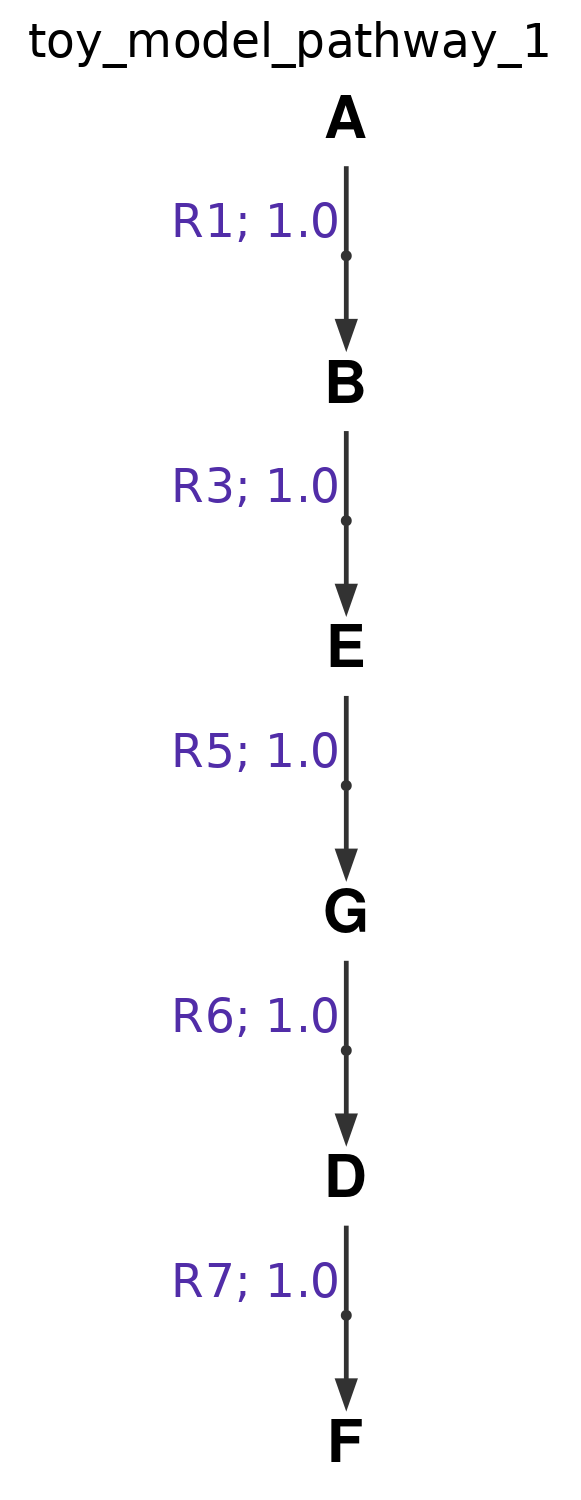

In [6]:
toy_model_paths = pd.read_json(r'./result_toy/toy_model_elm_result.json')

toy_model_path1 = Pathway(name='toy_model_pathway_1',
                    reaction_ids=list(toy_model_paths[1]['pathway'].keys()),
                    fluxes=list(toy_model_paths[1]['pathway'].values()))

# Create a png image
figure_filename = 'toy_model_pathway_1'
figure_ext = "png"

g = draw_pathway(
    toy_model_path1, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=toy_model_path1.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)

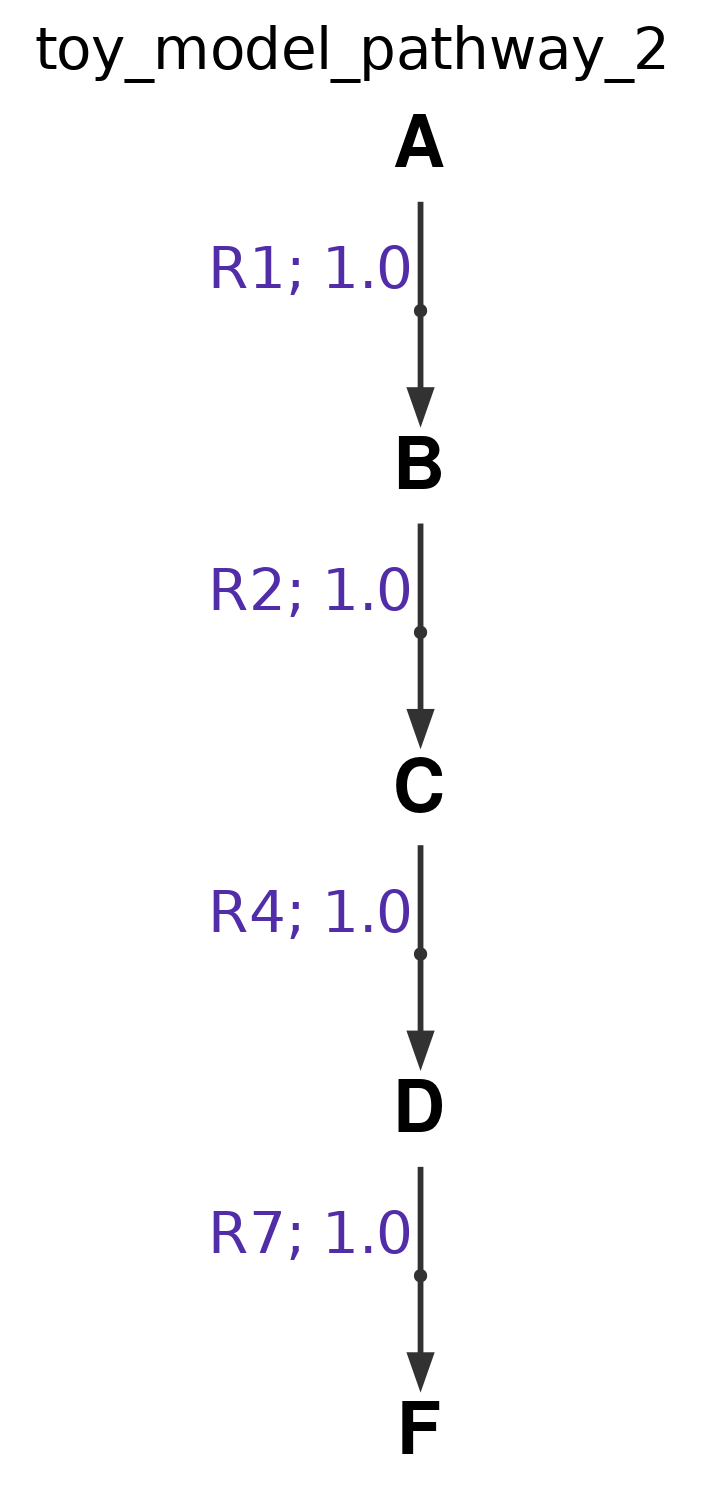

In [7]:
toy_model_path2 = Pathway(name='toy_model_pathway_2',
                    reaction_ids=list(toy_model_paths[2]['pathway'].keys()),
                    fluxes=list(toy_model_paths[2]['pathway'].values()))

# Create a png image
figure_filename2 = 'toy_model_pathway_2'

g = draw_pathway(
    toy_model_path2, 
    imageFileName=figure_filename2, 
    imageFormat=figure_ext, 
    graphTitle=toy_model_path2.name,
    cleanup=True, 
    darkBackgroundMode=False,
    width=5,
    height=5)

Image(figure_filename2 + "." + figure_ext)

### Minflux

In [8]:
toy_test = optstoic.OptStoic(database=db_toy_model,
                    objective='MinFlux',
                    specific_bounds=toy_model_specific_bounds,
                    custom_flux_constraints=None,
                    add_loopless_constraints=True,
                    max_iteration=3,
                    pulp_solver=pulp_solver,
                    result_filepath='./result_toy/',
                    M=1000)

toy_lp_problem, toy_pathways = toy_test.solve(outputfile='toy_model_minflux_result.json',
                                              max_iteration=toy_test.max_iteration)

In [9]:
toy_pathways[1].reaction_ids

['EX_A', 'EX_F', 'R1', 'R2', 'R4', 'R7']

In [10]:
toy_pathways[2].reaction_ids

['EX_A', 'EX_F', 'R1', 'R3', 'R5', 'R6', 'R7']

# Test optstoic-ELM (gluc -> pyr)

In [4]:
 user_defined_export_rxns_Sji_elm={
            'EX_glc': {'C00031': -1.0},
            'EX_nad': {'C00003': -1.0},
            'EX_adp': {'C00008': -1.0},
            'EX_phosphate': {'C00009': -1.0},
            'EX_pyruvate': {'C00022': -1.0},
            'EX_nadh': {'C00004': -1.0},
            'EX_atp': {'C00002': -1.0},
            'EX_h2o': {'C00001': -1.0},
            'EX_hplus': {'C00080': -1.0},
            'EX_nadp': {'C00006': -1.0},
            'EX_nadph': {'C00005': -1.0}
        }
custom_flux_constraints_elm = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': 2,
         'LB': 2},
        {'constraint_name': 'nadphcons2',
         'reactions': ['EX_nadp', 'EX_nad'],
         'UB': -2,
         'LB': -2},
        {'constraint_name': 'nadphcons3',
         'reactions': ['EX_nadh', 'EX_nad'],
         'UB': 0,
         'LB': 0},
        {'constraint_name': 'nadphcons4',
         'reactions': ['EX_nadph', 'EX_nadp'],
         'UB': 0,
         'LB': 0}]

specific_bounds_elm = {'EX_glc': {'LB': -1, 'UB': -1},
                   'EX_pyruvate': {'LB': 2, 'UB': 2},
                   'EX_nad': {'LB': -2, 'UB': 0},
                   'EX_nadh': {'LB': 0, 'UB': 2},
                   'EX_nadp': {'LB': -2, 'UB': 0},
                   'EX_nadph': {'LB': 0, 'UB': 2},
                   'EX_adp': {'LB': -1, 'UB': -1},
                   'EX_phosphate': {'LB': -1, 'UB': -1},
                   'EX_atp': {'LB': 1, 'UB': 1},
                   'EX_h2o': {'LB': 1, 'UB': 1},
                   'EX_hplus': {'LB': -10, 'UB': 10}}

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

db3_elm = load_db_v3(user_defined_export_rxns_Sji_elm)

2021-01-29 10:57:31 optstoic.load_pulp_solver WARNING  Pulp solver set to GUROBI_CMD.
2021-01-29 10:57:31 optstoicpy.core.database.load_db_v3 DEBUG    Reading blocked reactions file...
2021-01-29 10:57:31 core.Database DEBUG    Reading S matrix from JSON...
2021-01-29 10:57:38 core.Database DEBUG    Reading reaction type file...
2021-01-29 10:57:38 core.Database DEBUG    Reading Nint(loop, j) from JSON...
2021-01-29 10:57:38 core.Database INFO     Validating database
2021-01-29 10:57:38 core.Database WARNING  Removing blocked reactions to reduce model size!
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08505 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07882 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07885 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08859 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R01000 removed from the database.
2021-0

2021-01-29 10:57:38 core.Database DEBUG    Reaction R02587 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R00723 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R10351 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R05443 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08319 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R05447 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R00129 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R05448 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R04758 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R04756 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R09252 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R0

2021-01-29 10:57:38 core.Database DEBUG    Reaction R03577 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R03576 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08080 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08081 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08082 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08083 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07509 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07058 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08087 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R08088 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07057 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R0

2021-01-29 10:57:38 core.Database DEBUG    Reaction R03329 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R09908 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07264 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07267 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07260 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07263 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07262 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07269 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R07268 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R01732 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R03395 removed from the database.
2021-01-29 10:57:38 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R03231 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09630 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09632 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R04868 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R04714 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R04715 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R04716 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09633 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R04711 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R04713 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01562 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R1

2021-01-29 10:57:39 core.Database DEBUG    Reaction R03827 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03823 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03820 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02994 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02995 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02998 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02999 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R10858 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02132 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02666 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02667 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R05855 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05856 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05857 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05858 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R00827 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05676 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05677 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05672 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05673 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09771 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09770 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R00048 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09074 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R10606 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R10605 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R10609 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R10608 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05335 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05442 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05441 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05331 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05330 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R08002 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R08003 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R08005 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R08006 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R08007 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R04247 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07416 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R06366 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03782 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03780 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03781 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R03881 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03880 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05766 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05764 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05765 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05762 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05763 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05760 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05761 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05769 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R10346 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R1

2021-01-29 10:57:39 core.Database DEBUG    Reaction R06449 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R06119 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02356 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02354 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02355 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02358 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02359 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01460 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01463 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R10921 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09537 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R05171 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05170 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09498 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R00989 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R00983 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R00984 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01583 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01586 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01587 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01584 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01585 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R10560 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09642 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05729 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05722 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05720 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05721 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05727 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R10940 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02970 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02974 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R02975 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R08434 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R08439 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07289 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07281 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07280 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07287 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07869 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07868 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07867 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07866 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07865 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R06879 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R08616 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R06878 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07132 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01091 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R01099 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03943 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03945 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05397 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05394 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R05392 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:39 core.Database DEBUG    Reaction R08353 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07658 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07659 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R08356 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R08357 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07122 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R07652 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03728 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R09275 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03725 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R03726 removed from the database.
2021-01-29 10:57:39 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R05215 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03816 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R04265 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R04266 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03812 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10956 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09173 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09172 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09171 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09170 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09177 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R03680 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03686 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03685 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03689 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10270 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08819 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08818 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08817 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08816 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07375 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08814 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R07100 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03094 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03095 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03092 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03090 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07513 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08330 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03098 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08623 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08336 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08337 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R09591 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R04784 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09595 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10012 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10013 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10010 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09596 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R04565 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06387 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06386 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07366 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R07330 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07337 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07884 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07887 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07886 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07889 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07888 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07339 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08858 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06684 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06685 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R10201 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10200 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10207 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05599 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05598 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05592 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06866 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10736 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03562 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03563 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03560 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R05431 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09314 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05438 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05439 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10102 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10103 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09649 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R09648 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10416 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10417 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10414 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R1

2021-01-29 10:57:40 core.Database DEBUG    Reaction R08545 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08547 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08546 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R02633 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R02632 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06399 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06392 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06393 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06390 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06391 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06394 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R06820 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06821 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R11114 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R11115 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R11116 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R11117 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R11113 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R11118 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R11119 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03831 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R03834 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R10457 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10454 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07981 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R00563 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R00562 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R10099 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07454 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07728 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07729 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R08919 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R07720 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:40 core.Database DEBUG    Reaction R05322 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05323 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05321 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05357 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05459 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05328 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05356 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R06980 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R05355 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R04581 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R04580 removed from the database.
2021-01-29 10:57:40 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R04876 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08312 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04870 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R01689 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R01683 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R01686 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07979 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07978 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07977 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R03268 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R03261 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R05826 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R03097 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R00814 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R00810 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04153 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04150 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04151 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04154 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04158 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R03091 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R03899 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R04172 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08951 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09789 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09781 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09782 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09783 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09785 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05775 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05776 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05771 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05778 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R1

2021-01-29 10:57:41 core.Database DEBUG    Reaction R03421 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04346 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04344 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04438 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08448 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08449 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08199 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08192 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08190 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08191 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08196 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R07996 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07995 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07993 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07992 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07990 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08304 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07449 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R03284 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R03283 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08658 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07440 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R06476 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R06475 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R06474 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07870 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07871 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07872 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07873 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07874 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07875 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07876 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07877 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R03971 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R03970 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09687 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R10148 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R10140 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R10141 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R10142 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04387 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04383 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04382 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R04388 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R06357 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R06606 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R06355 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07489 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07488 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07484 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07487 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07481 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07483 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09566 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09567 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R09465 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05083 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05087 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05086 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09464 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R02271 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R02272 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R10533 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R10536 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R10539 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05266 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R04618 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R01205 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R01203 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R01202 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09399 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09398 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09392 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09391 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09390 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09397 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09396 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R08636 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08634 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R08631 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R07110 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R06572 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R06573 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R02408 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R00664 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R00666 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R00660 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R00668 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:41 core.Database DEBUG    Reaction R02232 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R02237 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05223 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05222 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05220 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05225 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09216 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09217 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05229 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R05228 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R09212 removed from the database.
2021-01-29 10:57:41 core.Database DEBUG    Reaction R0

2021-01-29 10:57:42 core.Database DEBUG    Reaction R09688 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R08036 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R07501 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R05564 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R05565 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R05566 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R05567 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R05560 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R05561 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R05562 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R05563 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R1

2021-01-29 10:57:42 core.Database DEBUG    Reaction R04515 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R10322 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R10895 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R09341 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R08255 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R10898 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R10899 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R09342 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R10435 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R08254 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R09343 removed from the database.
2021-01-29 10:57:42 core.Database DEBUG    Reaction R1

2021-01-29 10:57:44 core.Database DEBUG    Reaction R00303 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00322 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00488 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00522 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R02817 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00487 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R01573 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R06515 has been updated from Forward irreversible to Forwar

2021-01-29 10:57:44 core.Database ERROR    Reaction R00830 not in database!
2021-01-29 10:57:44 core.Database DEBUG    Reaction R01200 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R07302 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00575 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database ERROR    Reaction R00918 not in database!
2021-01-29 10:57:44 core.Database DEBUG    Reaction R09805 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R04780 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00473 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00130 has been updated from Forwa

2021-01-29 10:57:44 core.Database DEBUG    Reaction R00519 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R06974 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R06973 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R01980 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00299 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R01902 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R09279 has been updated from Forward irreversible to Forward irreversible.
2021-01-29 10:57:44 core.Database DEBUG    Reaction R00458 has been updated from Forward irreversible to Forwar

In [5]:
test = optstoic.OptStoic(database=db3_elm,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds_elm,
                    custom_flux_constraints=custom_flux_constraints_elm,
                    add_loopless_constraints=True,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

lp_problem, pathways = test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=2)

2021-01-29 10:57:46 optstoic.OptStoic INFO     Finding multiple pathways using Optstoic EnzymeLoad...
2021-01-29 10:57:46 optstoic.OptStoic INFO     Formulating problem...
2021-01-29 10:57:48 optstoic.OptStoic INFO     Loopless constraints are turned on.
2021-01-29 10:57:48 optstoic.OptStoic INFO     Adding custom constraints...
2021-01-29 10:57:48 optstoic.OptStoic INFO     Solving problem...
2021-01-29 10:57:48 optstoic.OptStoic INFO     Iteration 1


KeyboardInterrupt: 

# Explorar path de piruvato a acetil CoA SIN RESTRICCIONES TERMODINÁMICAS NI LOOPS 

(add_loopless_constraints = False)
Tratar de graficar los 2 paths obtenidos para ver diferencias

In [8]:
test = optstoic.OptStoic(database=db3,
                    objective='EnzymeLoad',
                    specific_bounds=specific_bounds,
                    custom_flux_constraints=custom_flux_constraints,
                    add_loopless_constraints=False,
                    max_iteration=2,
                    pulp_solver=pulp_solver,
                    result_filepath='./result/',
                    M=1000)

lp_problem, pathways = test.solve(outputfile='./result/my_test_optstoic.txt',
                                              max_iteration=2)

KeyboardInterrupt: 

In [ ]:
create_similarity_matrix(pathways)

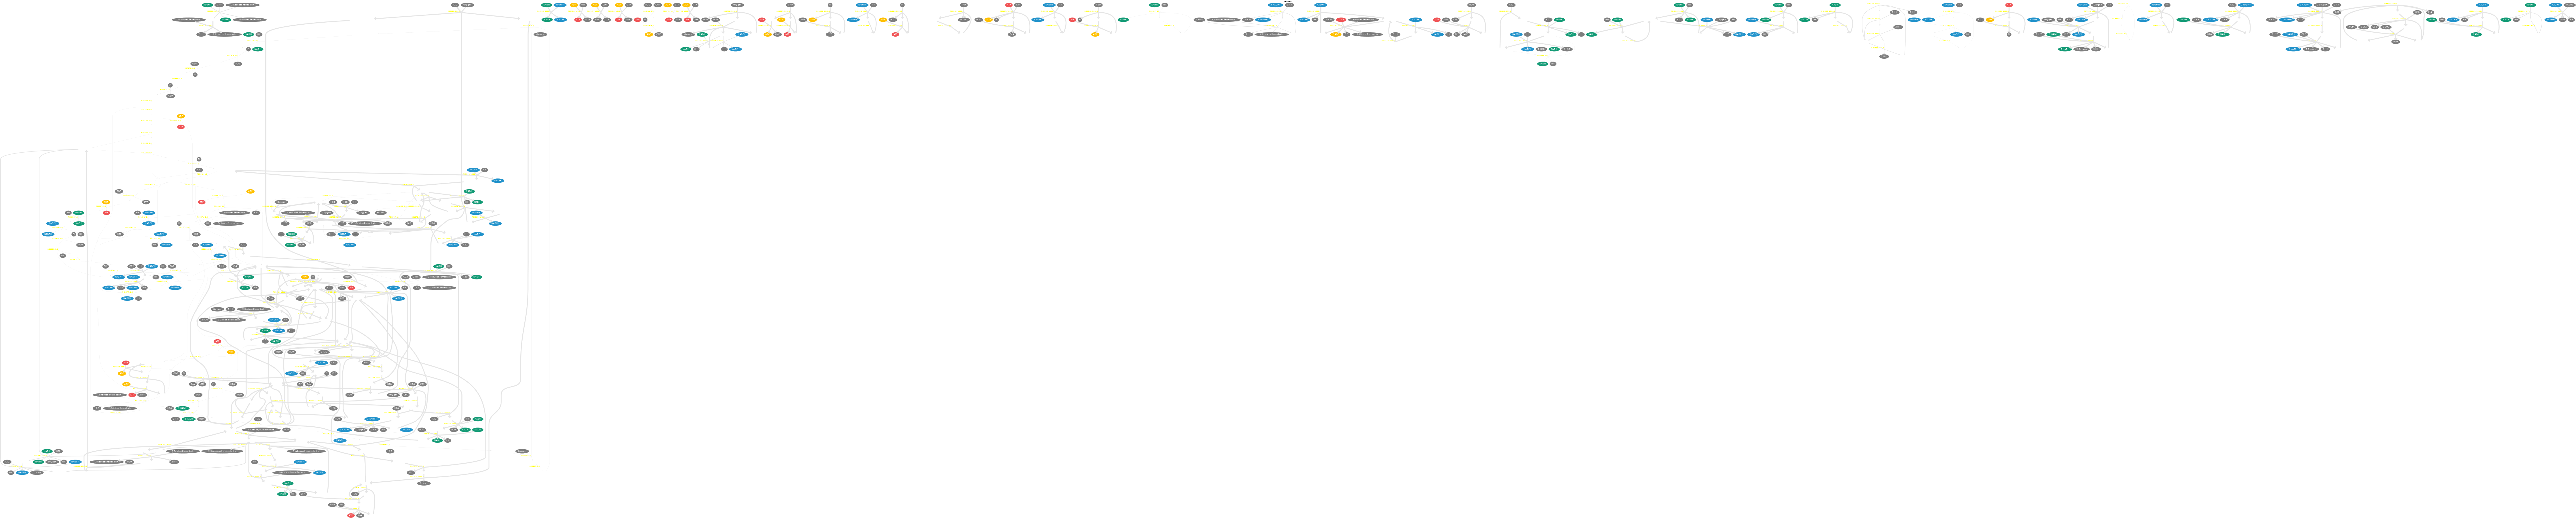

In [8]:
solution_paths = pd.read_json(r'./result/temp_pathways.json')

solution_path1 = solution_paths[1]['pathway']
solution_path2 = solution_paths[2]['pathway']
#solution_path3 = solution_paths[3]['pathway']
#solution_path4 = solution_paths[4]['pathway']

pathway1 = Pathway(name='pathway1',
                    reaction_ids=list(solution_path1.keys()),
                    fluxes=list(solution_path1.values()))

# Create a png image
figure_filename = 'pathway1'
figure_ext = "png"

g = draw_pathway(
    pathway1, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=pathway1.name,
    cleanup=True, 
    darkBackgroundMode=True,
    width=30,
    height=30)

Image(figure_filename + "." + figure_ext)

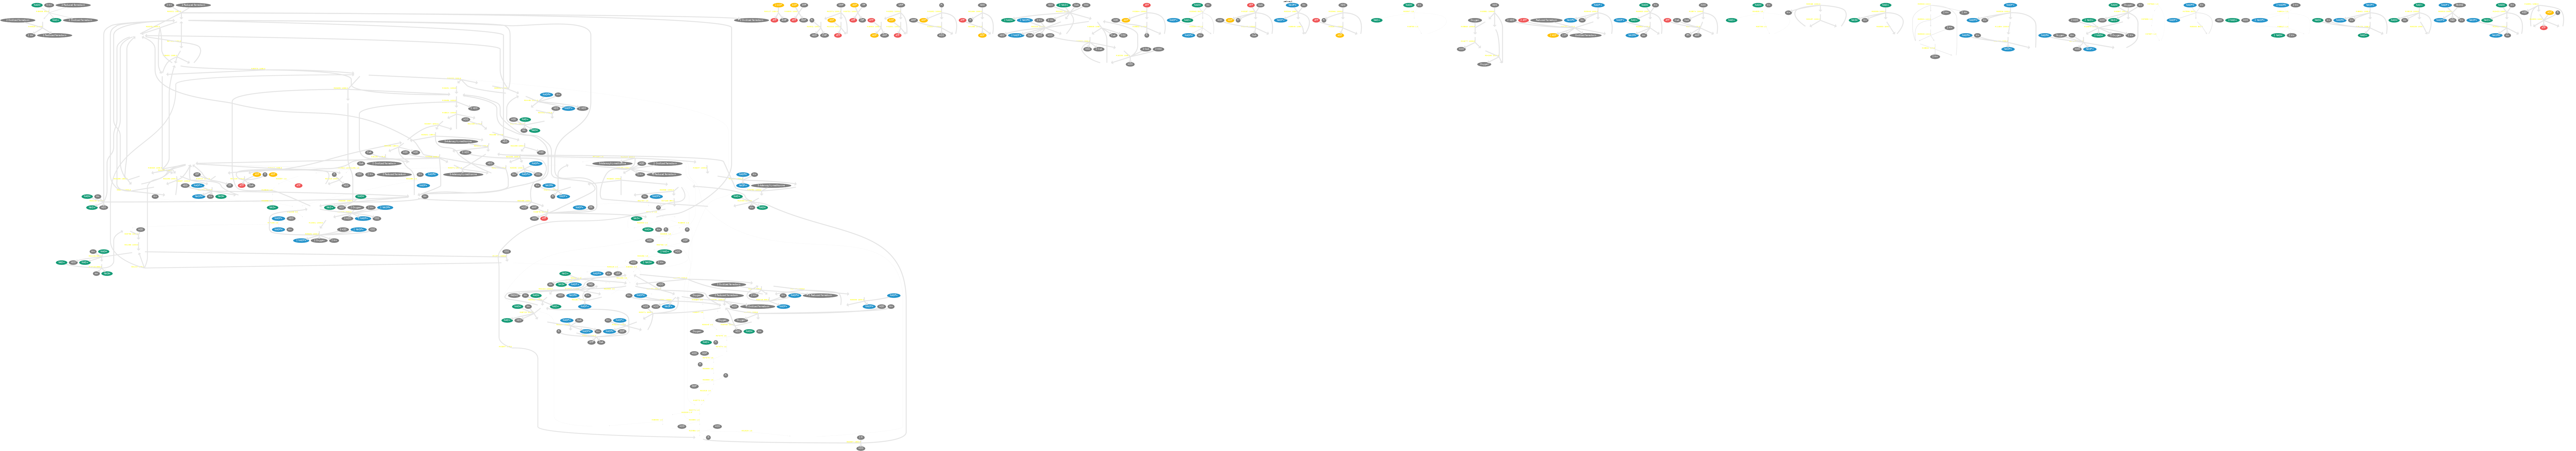

In [9]:
pathway2 = Pathway(name='pathway2',
                    reaction_ids=list(solution_path2.keys()),
                    fluxes=list(solution_path2.values()))

# Create a png image
figure_filename = 'pathway2'
figure_ext = "png"

g = draw_pathway(
    pathway2, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=pathway2.name,
    cleanup=True, 
    darkBackgroundMode=True,
    width=30,
    height=30)

Image(figure_filename + "." + figure_ext)

# Recreación de resultados paper 2016

In [49]:
user_defined_export_rxns_Sji = {
    'EX_glc': {'C00031': -1.0},
    'EX_acetate': {'C00033': -1.0},
    'EX_nad': {'C00003': -1.0},
    'EX_nadh': {'C00004': -1.0},
    'EX_nadp': {'C00006': -1.0},
    'EX_nadph': {'C00005': -1.0}
    }

specific_bounds = { 'EX_glc': {'LB': -1, 'UB': -1},
                'EX_acetate': {'LB': 3, 'UB': 3},
                'EX_nad': {'LB': -3, 'UB': 0},
                'EX_nadh': {'LB': 0, 'UB': 3},
                'EX_nadp': {'LB': -2, 'UB': 0},
                'EX_nadph': {'LB': 0, 'UB': 2},
                  }

custom_flux_constraints = [
        {'constraint_name': 'nadphcons1',
         'reactions': ['EX_nadph', 'EX_nadh'],
         'UB': 200,
         'LB': -200},
        {'constraint_name': 'nadphcons2',
        'reactions': ['EX_nadp', 'EX_nad'],
        'UB': 200,
        'LB': -200},
        {'constraint_name': 'nadphcons3',
        'reactions': ['EX_nadh', 'EX_nad'],
        'UB': 100,
        'LB': -100},
        {'constraint_name': 'nadphcons4',
        'reactions': ['EX_nadph', 'EX_nadp'],
        'UB': 100,
        'LB': -100}]

pulp_solver = load_pulp_solver(
        solver_names=[
            'SCIP_CMD',
            'GUROBI',
            'GUROBI_CMD',
            'CPLEX_CMD',
            'GLPK_CMD'])

In [50]:
db3 = load_db_v3(user_defined_export_rxns_Sji)

In [51]:
acetate_test = optstoic.OptStoic(database=db3,
                objective='MinFlux',
                zlb=None,
                specific_bounds=specific_bounds,
                custom_flux_constraints=custom_flux_constraints,
                add_loopless_constraints=True,
                max_iteration=2,
                pulp_solver=pulp_solver,
                result_filepath='./acetate_result/',
                M=1000)

In [52]:
lp_prob, acetate_paths = acetate_test.solve()

In [53]:
acetate_paths[1]

<OptStoicPathway(id='1', numRxn='14', nATP='None')>

In [54]:
acetate_pathways = pd.read_json(r'./acetate_result/temp_pathways.json')

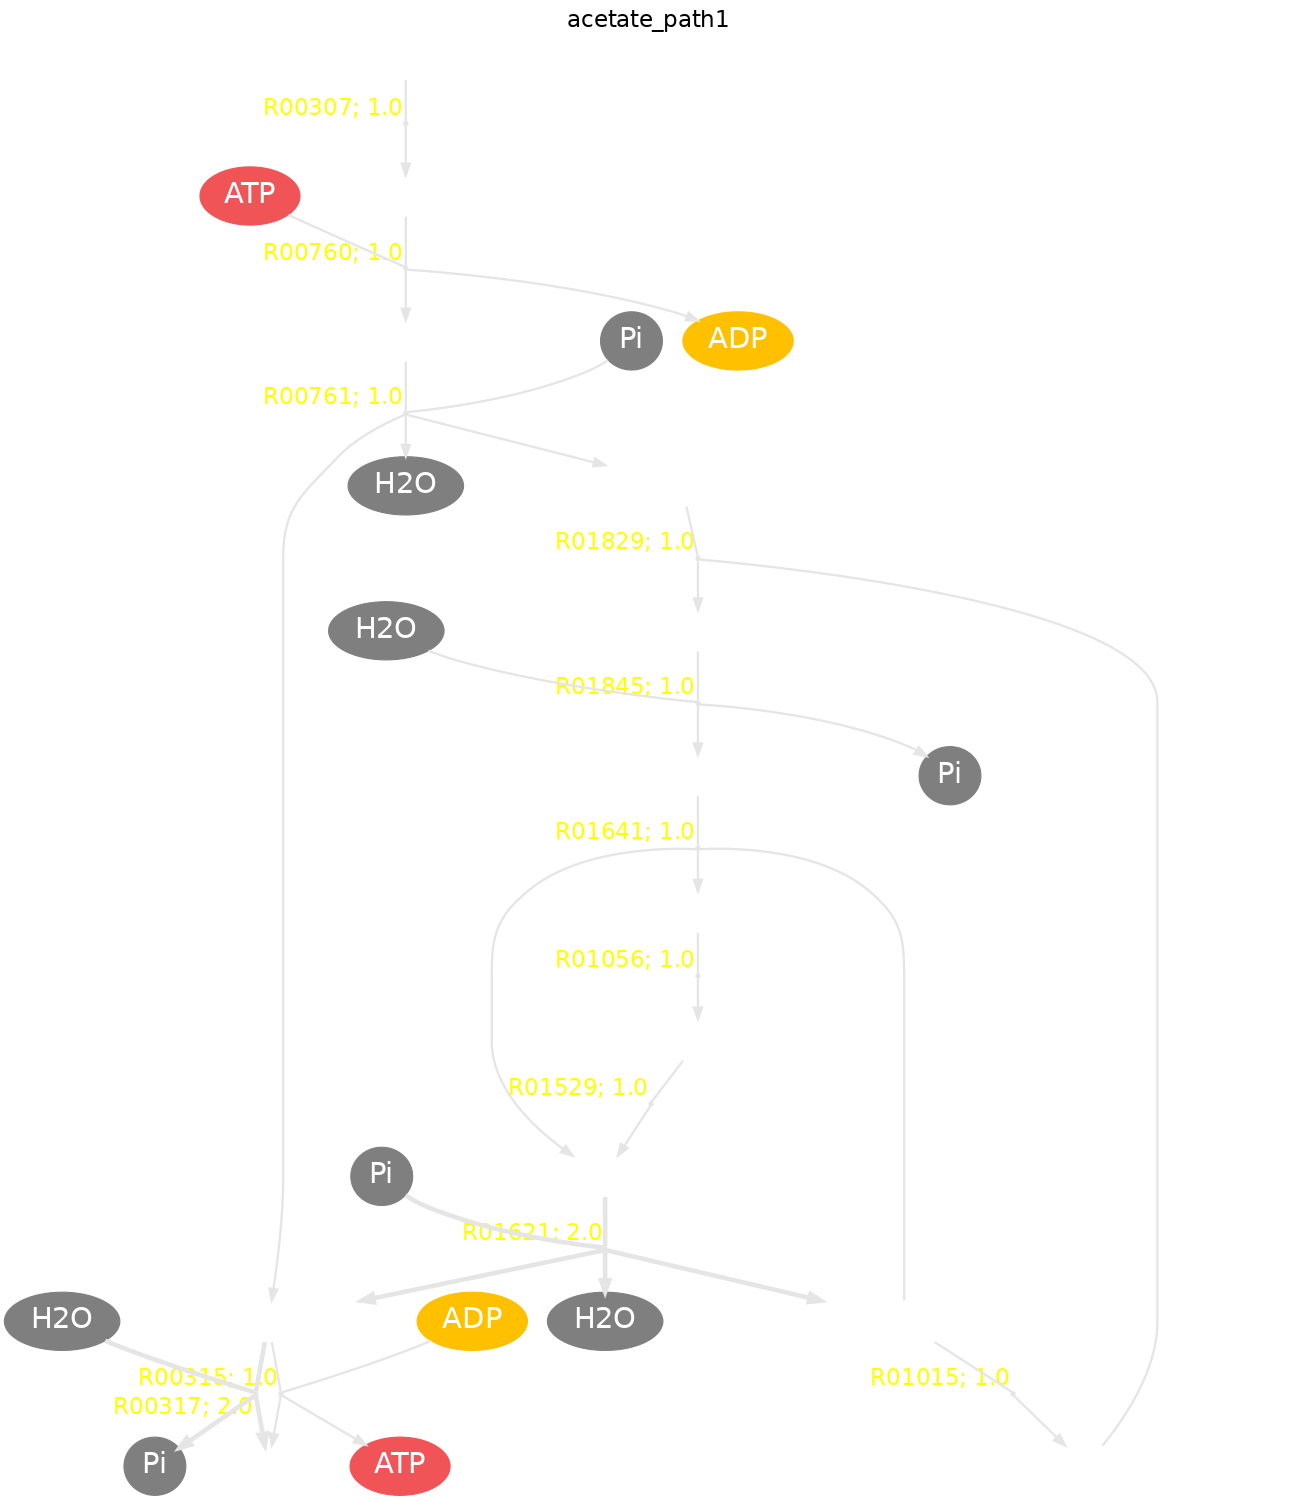

In [55]:
acetate_pathway = Pathway(name='acetate_path1',
                    reaction_ids=list(acetate_pathways[1]['pathway'].keys()),
                    fluxes=list(acetate_pathways[1]['pathway'].values()))

# Create a png image
figure_filename = 'acetate_path1'
figure_ext = "png"

g = draw_pathway(
    acetate_pathway, 
    imageFileName=figure_filename, 
    imageFormat=figure_ext, 
    graphTitle=acetate_pathway.name,
    cleanup=True, 
    darkBackgroundMode=True,
    width=5,
    height=5)

Image(figure_filename + "." + figure_ext)